In [2]:
import pandas as pd
import json
from collections import Counter
import numpy as np
import os
from pathlib import Path

In [3]:
def load_json_as_df(filepath):
    with open(filepath, 'r') as file:
        json_data = json.load(file)

    df = pd.DataFrame(data=json_data['data'], columns=json_data['columns'])
    return df

data_dir = os.path.join(os.getcwd(), 'data')

train_file_path = os.path.join(data_dir, 'train.json')
val_file_path = os.path.join(data_dir, 'val.json')
test_file_path = os.path.join(data_dir, 'test.json')

train_df = load_json_as_df(train_file_path)
val_df = load_json_as_df(val_file_path)
test_df = load_json_as_df(test_file_path)

In [4]:
train_df.head()

,sentence,aspect,polarity
0,It might be the best sit down food I've had in...,food,positive
1,It might be the best sit down food I've had in...,place,neutral
2,Hostess was extremely accommodating when we ar...,staff,positive
3,Hostess was extremely accommodating when we ar...,miscellaneous,neutral
4,We were a couple of minutes late for our reser...,miscellaneous,neutral


## I. EDA

The dataset contains 7,090 rows but only 3,149 unique sentences, indicating that many sentences have multiple aspect-sentiment annotations. Each unique sentence appears aroiund 2.25 times with different aspect tags and sentiment polarities.

In [5]:
print("Dataset dimensions:", train_df.shape)
print("Number of unique sentences:", train_df['sentence'].nunique())

Dataset dimensions: (7090, 3)
Number of unique sentences: 3149


### Aspect distribution


Aspect distribution:
aspect
food             2307
staff            1383
miscellaneous     954
place             694
service           631
menu              475
ambience          324
price             322
Name: count, dtype: int64


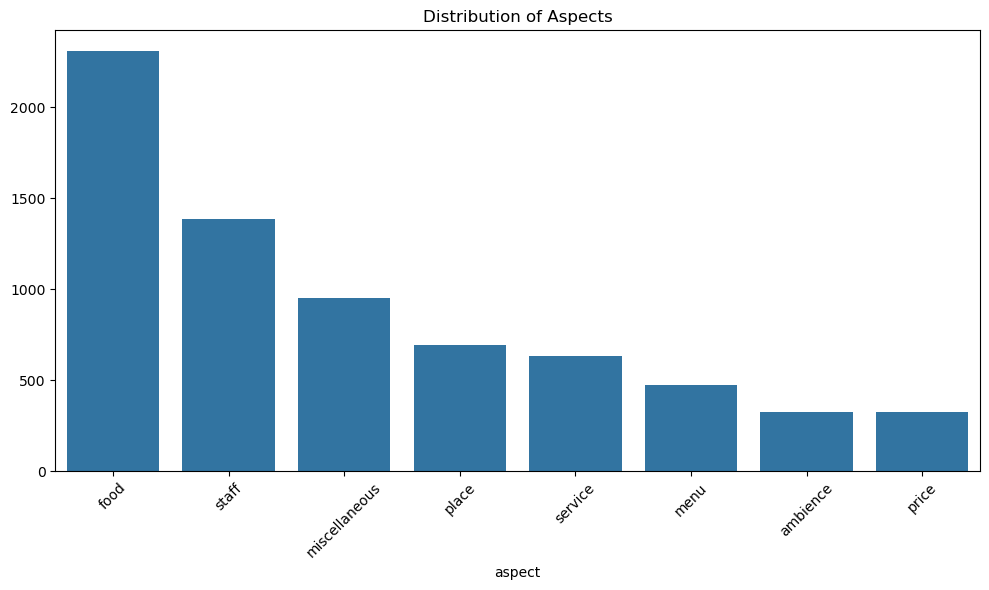

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

aspect_counts = train_df['aspect'].value_counts()
print("\nAspect distribution:")
print(aspect_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=aspect_counts.index, y=aspect_counts.values)
plt.title('Distribution of Aspects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sentiment distribution

The distribution shows a higher occurence of 'neutral' polarity and 'food' aspect. This suggest that the imbalanced data may lead to biased learning of the more frequently occuring class.


Sentiment distribution:
polarity
neutral     3077
negative    2084
positive    1929
Name: count, dtype: int64


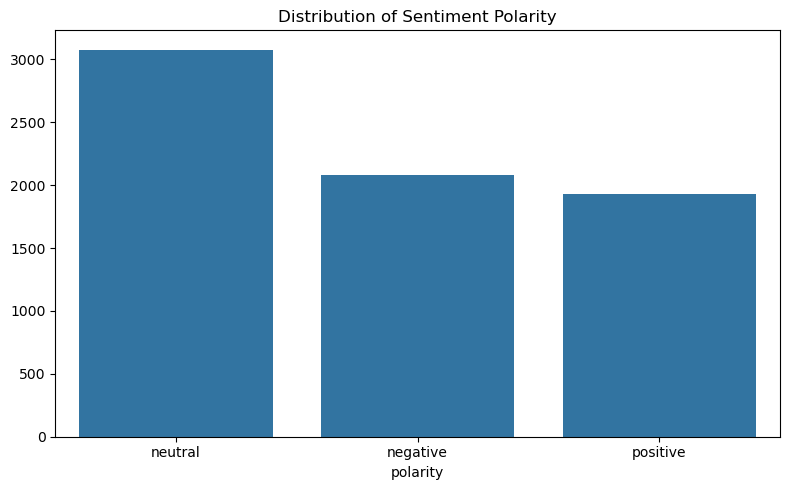

In [137]:
sentiment_counts = train_df['polarity'].value_counts()
print("\nSentiment distribution:")
print(sentiment_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment Polarity')
plt.tight_layout()
plt.show()

### Sentiment by aspect


Sentiment distribution by aspect (normalized):
polarity       negative   neutral  positive
aspect                                     
ambience       0.277778  0.163580  0.558642
food           0.110533  0.562635  0.326831
menu           0.082105  0.783158  0.134737
miscellaneous  0.205451  0.556604  0.237945
place          0.200288  0.619597  0.180115
price          0.354037  0.422360  0.223602
service        0.521395  0.202853  0.275753
staff          0.666667  0.093275  0.240058


<Figure size 1200x700 with 0 Axes>

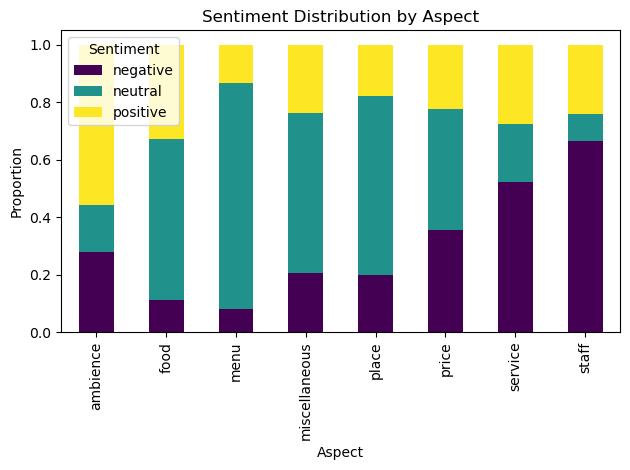

In [8]:
aspect_sentiment = pd.crosstab(train_df['aspect'], train_df['polarity'], normalize='index')
print("\nSentiment distribution by aspect (normalized):")
print(aspect_sentiment)

plt.figure(figsize=(12, 7))
aspect_sentiment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

### Sentence length analysis

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


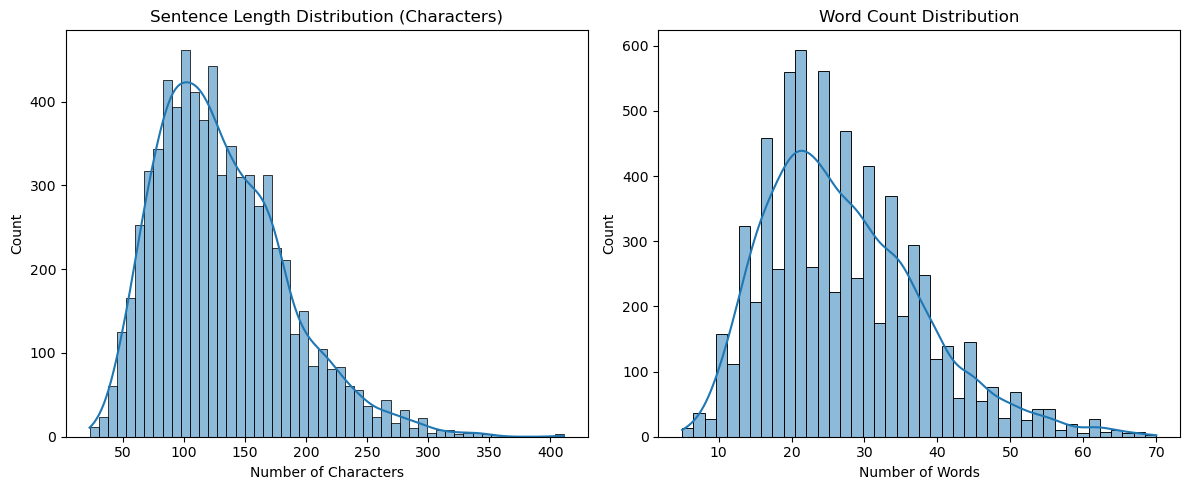

In [9]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as sw

nltk.download('punkt_tab') 
nltk.download('stopwords') 


train_df['sentence_length'] = train_df['sentence'].apply(len)
train_df['word_count'] = train_df['sentence'].apply(lambda x: len(word_tokenize(x)))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_df['sentence_length'], kde=True)
plt.title('Sentence Length Distribution (Characters)')
plt.xlabel('Number of Characters')

plt.subplot(1, 2, 2)
sns.histplot(train_df['word_count'], kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.show()

### Word frequency analysis by aspect and sentiment

In [10]:
stop_words = set(sw.words('english'))

def get_frequent_words(subset, n=20):
    all_words = ' '.join(subset['sentence']).lower()
    tokens = word_tokenize(all_words)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return Counter(tokens).most_common(n)

In [11]:
# Most frequent words for the "food" aspect with positive sentiment
food_positive = train_df[(train_df['aspect'] == 'food') & (train_df['polarity'] == 'positive')]
food_pos_words = get_frequent_words(food_positive)
print("\nMost frequent words in positive food reviews:")
print(food_pos_words)


Most frequent words in positive food reviews:
[('food', 318), ('menu', 156), ('good', 137), ('service', 111), ('great', 79), ('bar', 76), ('place', 56), ('like', 52), ('wait', 50), ('dinner', 45), ('best', 41), ('wine', 40), ('better', 39), ('prices', 38), ('table', 38), ('price', 38), ('worth', 38), ('us', 37), ('get', 35), ('one', 35)]


In [12]:
# Most frequent words for the "staff" aspect with positive sentiment
staff_positive = train_df[(train_df['aspect'] == 'staff') & (train_df['polarity'] == 'positive')]
staff_pos_words = get_frequent_words(staff_positive)
print("\nMost frequent words in positive staff reviews:")
print(staff_pos_words)


Most frequent words in positive staff reviews:
[('us', 74), ('waiter', 71), ('staff', 64), ('menu', 44), ('bar', 43), ('food', 39), ('table', 37), ('wait', 36), ('waitress', 34), ('even', 32), ('drinks', 30), ('dinner', 25), ('nice', 25), ('manager', 24), ('service', 23), ('friendly', 23), ('wine', 23), ('one', 23), ('time', 23), ('great', 22)]


## II. Data Pre-processing

### A. Dependency Parsing
Using spaCy's language processing tools, we can break down each sentence to see how the words are connected, capturing relationships between words as (token, dependency type, head word) tuples. This provides valuable grammatical information that can help identify how the customer express their feelings in relation to specific aspects.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def add_dependency_parse(df):
    # Map unique sentences to their parsed results for efficiency
    unique_sentences = df['sentence'].unique()
    parsed_dict = {sent: [(token.text, token.dep_, token.head.text) for token in nlp(sent)] 
                  for sent in unique_sentences}
    
    df['parsed'] = df['sentence'].map(parsed_dict)
    return df

train_df = add_dependency_parse(train_df)
val_df = add_dependency_parse(val_df)
test_df = add_dependency_parse(test_df)

Result example: "Hostess" is the subject (nsubj) linked to the word "accommodating."
The sentence structure shows the hostess as the one being described as accommodating, which helps us understand the sentiment being directed at her.

In [17]:
train_df.head()

,sentence,aspect,polarity,sentence_length,word_count,parsed
0,It might be the best sit down food I've had in...,food,positive,159,39,"[(It, nsubj, be), (might, aux, be), (be, ROOT,..."
1,It might be the best sit down food I've had in...,place,neutral,159,39,"[(It, nsubj, be), (might, aux, be), (be, ROOT,..."
2,Hostess was extremely accommodating when we ar...,staff,positive,86,14,"[(Hostess, nsubj, accommodating), (was, aux, a..."
3,Hostess was extremely accommodating when we ar...,miscellaneous,neutral,86,14,"[(Hostess, nsubj, accommodating), (was, aux, a..."
4,We were a couple of minutes late for our reser...,miscellaneous,neutral,143,30,"[(We, nsubj, were), (were, ROOT, were), (a, de..."


### B. Text Normalization 
- Word contractions

In [19]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have",
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did",
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have",
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have",
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us",
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have",
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not",
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have",
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will",
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [20]:
# Regex pattern to identify potential contractions, excluding words ending with "'s"
contraction_pattern = re.compile(r"\b(\w+'(?!s\b)\w+)\b")

# Function to find contractions not in the dictionary using regex
def find_missing_contractions(df, contraction_dict):
    missing_contractions = set()

    for sentence in df['sentence']:
        matches = re.findall(contraction_pattern, sentence)  # Find all potential contractions
        for match in matches:
            if match.lower() not in contraction_dict: # Cross check with contraction_dict
                missing_contractions.add(match)

    return missing_contractions

In [21]:
missing_train = find_missing_contractions(train_df, contraction_dict)
missing_val = find_missing_contractions(val_df, contraction_dict)
missing_test = find_missing_contractions(test_df, contraction_dict)

# Combine all missing contractions from all sets
all_missing_contractions = missing_train.union(missing_val).union(missing_test)

print("Missing contractions across datasets:")
print(all_missing_contractions)

Missing contractions across datasets:
{"N'awlins", "ass'd", "rec'd", "that'll", "shuoldn't", "c'mon", "RSVP'd", "maitre'd", "doens't", "yuo're", "comp'ed", "who'd"}


Correcting mispelled contraction words

In [22]:
corrections = {
    "shuoldn't": "shouldn't",
    "yuo're": "you're",
    "doens't": "doesn't"
}

# Function to replace misspelled words based on the corrections dictionary
def correct_spelling(sentence, corrections):
    words = sentence.split()
    corrected_words = [corrections.get(word, word) for word in words]
    return ' '.join(corrected_words)

# Apply the correction to each DataFrame
train_df['sentence'] = train_df['sentence'].apply(lambda x: correct_spelling(x, corrections))
val_df['sentence'] = val_df['sentence'].apply(lambda x: correct_spelling(x, corrections))
test_df['sentence'] = test_df['sentence'].apply(lambda x: correct_spelling(x, corrections))

Adding to contraction_dict

In [23]:
contraction_dict.update({
    "that'll": "that will",
    "who'd": "who would"
})

Expanding Contractions in Data

*Code by Jawwad from
https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python*


In [24]:
def expand_contractions(text, contraction_dict):
  contractions_pattern = re.compile(r'\b({})\b'.format('|'.join(re.escape(k) for k in contraction_dict.keys())), 
                                     flags=re.IGNORECASE|re.DOTALL)

  def expand_match(contraction):
    match = contraction.group(0)
    first_char = match[0]
    expanded_contraction = contraction_dict.get(match.lower(), match)
    expanded_contraction = first_char + expanded_contraction[1:]
    return expanded_contraction

  expanded_text = contractions_pattern.sub(expand_match, text)
  return expanded_text

In [25]:
train_df['sentence'] = train_df['sentence'].apply(lambda x: expand_contractions(x, contraction_dict))
val_df['sentence'] = val_df['sentence'].apply(lambda x: expand_contractions(x, contraction_dict))
test_df['sentence'] = test_df['sentence'].apply(lambda x: expand_contractions(x, contraction_dict))

- Punctuation Removal

In [26]:
def remove_punctuation_re(text):
    return re.sub(r'[^\w\s]', '', text)

train_df['sentence'] = train_df['sentence'].apply(remove_punctuation_re)
val_df['sentence'] = val_df['sentence'].apply(remove_punctuation_re)
test_df['sentence'] = test_df['sentence'].apply(remove_punctuation_re)


- Case-folding

In [27]:
train_df['sentence'] = train_df['sentence'].str.lower()
val_df['sentence'] = val_df['sentence'].str.lower()
test_df['sentence'] = test_df['sentence'].str.lower()

### C. Tokenization

In [28]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_sentences(dataframe):
    dataframe['tokenized_sentence'] = dataframe['sentence'].apply(word_tokenize)
    return dataframe

train_df = tokenize_sentences(train_df)
val_df = tokenize_sentences(val_df)
test_df = tokenize_sentences(test_df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
train_df.head()

,sentence,aspect,polarity,sentence_length,word_count,parsed,tokenized_sentence
0,it might be the best sit down food i have had ...,food,positive,159,39,"[(It, nsubj, be), (might, aux, be), (be, ROOT,...","[it, might, be, the, best, sit, down, food, i,..."
1,it might be the best sit down food i have had ...,place,neutral,159,39,"[(It, nsubj, be), (might, aux, be), (be, ROOT,...","[it, might, be, the, best, sit, down, food, i,..."
2,hostess was extremely accommodating when we ar...,staff,positive,86,14,"[(Hostess, nsubj, accommodating), (was, aux, a...","[hostess, was, extremely, accommodating, when,..."
3,hostess was extremely accommodating when we ar...,miscellaneous,neutral,86,14,"[(Hostess, nsubj, accommodating), (was, aux, a...","[hostess, was, extremely, accommodating, when,..."
4,we were a couple of minutes late for our reser...,miscellaneous,neutral,143,30,"[(We, nsubj, were), (were, ROOT, were), (a, de...","[we, were, a, couple, of, minutes, late, for, ..."


### D. Stopword removal

In [30]:
stop_words = set(sw.words('english'))
print(stop_words)

{'him', 'should', "we're", 'in', 'his', 'ourselves', 'your', 'not', 'so', "mightn't", 'their', "we'd", 'that', "mustn't", 'he', 'off', 'they', 'theirs', 'is', 'over', 'into', 'on', 'than', 'needn', 'couldn', 'about', "couldn't", "you've", 'both', 'who', "should've", 'any', 'did', "hasn't", 'does', "shan't", 'own', 'themselves', 't', 'an', 'mustn', 'down', 'and', "needn't", 'to', "shouldn't", "they're", "it's", 'me', 'd', 'aren', 'hasn', 'shan', 've', "didn't", 'mightn', 'above', 'doesn', "doesn't", 'didn', 'isn', 're', "isn't", "they've", 'wasn', 'by', 'when', 'having', 'how', 'weren', 'm', 'because', 'itself', 'will', "don't", 'if', "you'll", 'myself', 'ain', "you're", 'such', "he's", "we'll", 'being', 'why', 'the', "that'll", 'there', 'ours', "she'd", 'those', "wasn't", 'be', 'am', 'himself', 'it', 'shouldn', 'until', 'very', "i'd", "hadn't", 'you', 'more', 'now', "he'll", 'can', 'once', 'do', 'a', 'here', 'are', "she'll", 'during', 'has', 'were', 'yours', "aren't", "he'd", "they'd",

In [31]:
# Words to keep for ASBA
sentiment_critical = {
    # Negations
    'no', 'not', 'nor', 'none', 
    "don't", "doesn't", "didn't", "won't", "wouldn't", 
    "can't", "couldn't", "shouldn't", "isn't", "aren't", "wasn't", "weren't",
    "haven't", "hasn't", "hadn't", "mightn't", "mustn't", "needn't",
    
    # Intensifiers/Downtoners
    'very', 'too', 'so', 'quite', 'just',
    
    # Contrast words
    'but', 'however', 'though', 'although', 'yet',
    
    # For aspect identification
    'it', 'its', 'itself'
}

In [34]:
absa_stopwords = stop_words - sentiment_critical

def remove_absa_stopwords(tokens):
    return [word for word in tokens if word not in absa_stopwords]

train_df['tokens_no_stopwords'] = train_df['tokenized_sentence'].apply(remove_absa_stopwords)
val_df['tokens_no_stopwords'] = val_df['tokenized_sentence'].apply(remove_absa_stopwords)
test_df['tokens_no_stopwords'] = test_df['tokenized_sentence'].apply(remove_absa_stopwords)


### E. Feature Extraction
- Pos Tagging

In [50]:
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger_eng')

def pos_tag_sentences(df, column_name):
    # Assuming 'tokenized_sentence' contains lists of words
    df['pos_tags'] = df[column_name].apply(pos_tag)
    return df


# Applying POS tagging to the datasets
train_df = pos_tag_sentences(train_df, 'tokenized_sentence')
val_df = pos_tag_sentences(val_df, 'tokenized_sentence')
test_df = pos_tag_sentences(test_df, 'tokenized_sentence')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### F. Lemmatisation
Reducing words to their base or dictionary form (lemma)

In [51]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# convert NLTK POS tags to WordNet format
def get_wordnet_pos(nltk_tag):
    if nltk_tag.startswith('J'):  # Adjective
        return 'a' 
    elif nltk_tag.startswith('V'):  # Verb
        return 'v'  
    elif nltk_tag.startswith('N'):  # Noun
        return 'n' 
    elif nltk_tag.startswith('R'):  # Adverb
        return 'r' 
    else:
        return 'n'

def lemmatize_with_pos(pos_tagged_tokens):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tagged_tokens]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
train_df['lemmatized_tokens'] = train_df['pos_tags'].apply(lemmatize_with_pos)
val_df['lemmatized_tokens'] = val_df['pos_tags'].apply(lemmatize_with_pos)
test_df['lemmatized_tokens'] = test_df['pos_tags'].apply(lemmatize_with_pos)

In [53]:
def compare_tokens_to_lemmas(row):
    """Compare original tokens to their lemmatized forms and return changed pairs"""
    changes = []
    for (word, tag), lemma in zip(row['pos_tags'], row['lemmatized_tokens']):
        if word.lower() != lemma.lower():
            changes.append((word, tag, lemma))
    return changes

# Get changes for a few example rows
sample_changes = train_df.head(50).apply(compare_tokens_to_lemmas, axis=1)

# Collect all unique word-lemma pairs
all_changes = set()
for row_changes in sample_changes:
    for word, tag, lemma in row_changes:
        all_changes.add((word, tag, lemma))

# Print the changes sorted alphabetically by original word
print("Words changed by lemmatization (original → lemma):")
for word, tag, lemma in sorted(all_changes):
    print(f"'{word}' ({tag}) → '{lemma}'")

# Count how many words were changed
total_tokens = sum(len(tokens) for tokens in train_df.head(50)['tokenized_sentence'])
print(f"\nTotal tokens checked: {total_tokens}")
print(f"Tokens changed by lemmatization: {len(all_changes)}")
print(f"Percentage changed: {len(all_changes)/total_tokens:.2%}")

Words changed by lemmatization (original → lemma):
'accommodating' (VBG) → 'accommodate'
'appetizers' (NNS) → 'appetizer'
'are' (VBP) → 'be'
'arrived' (VBD) → 'arrive'
'as' (IN) → 'a'
'been' (VBN) → 'be'
'bites' (NNS) → 'bite'
'brings' (VBZ) → 'bring'
'brought' (VBD) → 'bring'
'came' (VBD) → 'come'
'chairs' (VBZ) → 'chair'
'considering' (VBG) → 'consider'
'creating' (VBG) → 'create'
'crowded' (VBN) → 'crowd'
'customers' (NNS) → 'customer'
'decided' (VBD) → 'decide'
'describing' (VBG) → 'describe'
'deserved' (VBD) → 'deserve'
'did' (VBD) → 'do'
'drinks' (NNS) → 'drink'
'entering' (VBG) → 'enter'
'enticing' (VBG) → 'entice'
'expecting' (VBG) → 'expect'
'flagged' (VBN) → 'flag'
'found' (VBD) → 'find'
'going' (VBG) → 'go'
'got' (VBD) → 'get'
'had' (VBD) → 'have'
'had' (VBN) → 'have'
'impressed' (VBN) → 'impress'
'ingredients' (NNS) → 'ingredient'
'is' (VBZ) → 'be'
'items' (NNS) → 'item'
'its' (PRP$) → 'it'
'leaves' (VBZ) → 'leave'
'left' (VBD) → 'leave'
'looks' (VBZ) → 'look'
'made' (VB) →

In [54]:
train_df.head()

,sentence,aspect,polarity,sentence_length,word_count,parsed,tokenized_sentence,tokens_no_stopwords,pos_tags,lemmatized_tokens
0,it might be the best sit down food i have had ...,food,positive,159,39,"[(It, nsubj, be), (might, aux, be), (be, ROOT,...","[it, might, be, the, best, sit, down, food, i,...","[it, might, best, sit, food, area, so, going, ...","[(it, PRP), (might, MD), (be, VB), (the, DT), ...","[it, might, be, the, best, sit, down, food, i,..."
1,it might be the best sit down food i have had ...,place,neutral,159,39,"[(It, nsubj, be), (might, aux, be), (be, ROOT,...","[it, might, be, the, best, sit, down, food, i,...","[it, might, best, sit, food, area, so, going, ...","[(it, PRP), (might, MD), (be, VB), (the, DT), ...","[it, might, be, the, best, sit, down, food, i,..."
2,hostess was extremely accommodating when we ar...,staff,positive,86,14,"[(Hostess, nsubj, accommodating), (was, aux, a...","[hostess, was, extremely, accommodating, when,...","[hostess, extremely, accommodating, arrived, h...","[(hostess, NN), (was, VBD), (extremely, RB), (...","[hostess, be, extremely, accommodate, when, we..."
3,hostess was extremely accommodating when we ar...,miscellaneous,neutral,86,14,"[(Hostess, nsubj, accommodating), (was, aux, a...","[hostess, was, extremely, accommodating, when,...","[hostess, extremely, accommodating, arrived, h...","[(hostess, NN), (was, VBD), (extremely, RB), (...","[hostess, be, extremely, accommodate, when, we..."
4,we were a couple of minutes late for our reser...,miscellaneous,neutral,143,30,"[(We, nsubj, were), (were, ROOT, were), (a, de...","[we, were, a, couple, of, minutes, late, for, ...","[couple, minutes, late, reservation, minus, on...","[(we, PRP), (were, VBD), (a, DT), (couple, NN)...","[we, be, a, couple, of, minute, late, for, our..."


### III. Embeddings
Transforms raw text tokens into numerical vectors for the ML model.

### A. Word Embedding
Training word2vec model to learn word embeddings according to dataset.

In [41]:
from gensim.models import Word2Vec

sentences = train_df['lemmatized_tokens'].tolist()

# Train a Word2Vec model using Skip-gram (sg=1)
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Save the model for later use
model.save("word2vec_skipgram.model")

Creating the Word Embedding Layer in PyTorch

In [45]:
import torch
import torch.nn as nn
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = Word2Vec.load("word2vec_skipgram.model")

word_to_index = {word: idx for idx, word in enumerate(model.wv.key_to_index.keys())} # Create index for every unique word
embedding_matrix = np.zeros((len(word_to_index), model.vector_size)) # empty matrix

for word, idx in word_to_index.items(): # Fill each row of the embedding matrix with the 100-dim vector for the corresponding word
    embedding_matrix[idx] = model.wv[word]

# Convert NumPy matrix into PyTorch embedding layer for NN
embedding_tensor = torch.FloatTensor(embedding_matrix)
pretrained_embeddings = nn.Embedding(*embedding_tensor.shape)
pretrained_embeddings.weight = nn.Parameter(embedding_tensor)
pretrained_embeddings.weight.requires_grad = False # Freeze pre-trained word vectors

# Move embedding layer to GPU
pretrained_embeddings = pretrained_embeddings.to(device)

Using device: cuda


### B. Aspect Embeddding

In [62]:
num_aspects = len(train_df['aspect'].unique())
embedding_dim = 100  # Same as word embeddings

aspect_to_index = {aspect: idx for idx, aspect in enumerate(train_df['aspect'].unique())}

aspect_embedding = nn.Embedding(num_aspects, embedding_dim)
aspect_embedding = aspect_embedding.to(device)

### C. POS Tag Embedding

Map POS tags to indices

In [63]:
def create_pos_tag_index(df_list):
    # Collect all unique POS tags from the dataframes
    pos_tags = set()
    for df in df_list:
        # Update set with all unique tags found in each row
        df['pos_tags'].apply(lambda tags: pos_tags.update(tag for _, tag in tags))
    # Create a mapping from tag to index
    pos_tag_index = {tag: idx for idx, tag in enumerate(pos_tags)}
    return pos_tag_index

pos_tag_index = create_pos_tag_index([train_df, val_df, test_df])
print("POS Tag Index:", pos_tag_index)

POS Tag Index: {'UH': 0, 'RBS': 1, 'TO': 2, 'WRB': 3, 'VBZ': 4, 'CD': 5, 'VBN': 6, 'RB': 7, 'NN': 8, 'WDT': 9, 'MD': 10, 'PRP$': 11, 'PRP': 12, 'WP$': 13, 'VBG': 14, 'RBR': 15, 'WP': 16, 'JJR': 17, 'VB': 18, 'PDT': 19, 'DT': 20, 'EX': 21, 'CC': 22, 'VBD': 23, 'NNS': 24, 'IN': 25, 'RP': 26, 'JJ': 27, 'NNP': 28, 'JJS': 29, 'FW': 30, 'VBP': 31}


Convert the POS tags into indices

In [64]:
def pos_tags_to_indices(df, pos_tag_index, input_column='pos_tags', output_column='pos_indices'):
    # Convert POS tag sequences to index sequences and store in a new column
    df[output_column] = df[input_column].apply(lambda tags: [pos_tag_index[tag] for _, tag in tags])
    return df

train_df = pos_tags_to_indices(train_df, pos_tag_index, input_column='pos_tags', output_column='pos_indices')
val_df = pos_tags_to_indices(val_df, pos_tag_index, input_column='pos_tags', output_column='pos_indices')
test_df = pos_tags_to_indices(test_df, pos_tag_index, input_column='pos_tags', output_column='pos_indices')

Creating the POS tags embedding layer

In [65]:
pos_vocab_size = len(pos_tag_index)
pos_embedding_dim = 50
pos_embedding_layer = nn.Embedding(num_embeddings=pos_vocab_size, embedding_dim=pos_embedding_dim)
pos_embedding_layer = pos_embedding_layer.to(device)

### D. Dependency parsing label Embedding

Map Dependency parsing labels to indices

In [66]:
def create_dep_label_index(df_list):
    # Collect all unique dependency labels from the dataframes
    dep_labels = set()
    for df in df_list:
        df['parsed'].apply(lambda parsed_list: dep_labels.update(dep for _, dep, _ in parsed_list))
    # Create a mapping from dependency label to index
    dep_label_index = {label: idx for idx, label in enumerate(dep_labels)}
    return dep_label_index

dep_label_index = create_dep_label_index([train_df, val_df, test_df])
print("Dependency Label Index:", dep_label_index)

Dependency Label Index: {'ROOT': 0, 'dative': 1, 'expl': 2, 'advcl': 3, 'cc': 4, 'advmod': 5, 'predet': 6, 'xcomp': 7, 'nsubj': 8, 'nsubjpass': 9, 'auxpass': 10, 'meta': 11, 'neg': 12, 'ccomp': 13, 'aux': 14, 'prep': 15, 'preconj': 16, 'poss': 17, 'mark': 18, 'dep': 19, 'case': 20, 'quantmod': 21, 'csubj': 22, 'pobj': 23, 'det': 24, 'amod': 25, 'npadvmod': 26, 'acl': 27, 'parataxis': 28, 'pcomp': 29, 'conj': 30, 'relcl': 31, 'intj': 32, 'acomp': 33, 'attr': 34, 'dobj': 35, 'compound': 36, 'prt': 37, 'oprd': 38, 'appos': 39, 'nummod': 40, 'punct': 41, 'agent': 42, 'nmod': 43}


Convert Dependency Labels to indices

In [67]:
def dep_labels_to_indices(df, dep_label_index):
    # Convert dependency label sequences to index sequences and store in a new column
    df['dep_indices'] = df['parsed'].apply(lambda parsed_list: [dep_label_index[dep] for _, dep, _ in parsed_list])
    return df

train_df = dep_labels_to_indices(train_df, dep_label_index)
val_df = dep_labels_to_indices(val_df, dep_label_index)
test_df = dep_labels_to_indices(test_df, dep_label_index)

Creating the Dependency Parsing embedding layer

In [68]:
dep_vocab_size = len(dep_label_index)
dep_embedding_dim = 50
dep_embedding_layer = nn.Embedding(num_embeddings=dep_vocab_size, embedding_dim=dep_embedding_dim)
dep_embedding_layer = dep_embedding_layer.to(device)

## Model 1: BI-LSTM integrating aspect information as additional input.



Function to concatenate all embeddings

In [84]:
import torch.nn.functional as F

def get_combined_embeddings(sentences, aspects, pos_indices, dep_indices, 
                           word_to_index, aspect_to_index, 
                           pretrained_embeddings, aspect_embedding, 
                           pos_embedding_layer, dep_embedding_layer, 
                           device=torch.device("cuda" if torch.cuda.is_available() else "cpu")):
    embedded_sentences = []

    max_length = max(max(len(sentence) for sentence in sentences), ## Determine the max length across all types of sequences for batch processing
                    max(len(dep) for dep in dep_indices),
                    max(len(pos) for pos in pos_indices))

    for sentence, aspect, pos_seq, dep_seq in zip(sentences, aspects, pos_indices, dep_indices):
        # Process word embeddings
        extended_sentence = sentence + [0] * (max_length - len(sentence)) if len(sentence) < max_length else sentence[:max_length]
        word_idxs = torch.tensor([word_to_index.get(word, 0) for word in extended_sentence], dtype=torch.long, device=device)
        word_embs = pretrained_embeddings(word_idxs)

        # Process aspect embeddings
        aspect_idx = torch.tensor([aspect_to_index[aspect]] * max_length, dtype=torch.long, device=device)
        aspect_emb = aspect_embedding(aspect_idx)

        # Process POS tag embeddings
        extended_pos = pos_seq + [0] * (max_length - len(pos_seq)) if len(pos_seq) < max_length else pos_seq[:max_length]
        pos_idxs = torch.tensor(extended_pos, dtype=torch.long, device=device)
        pos_embs = pos_embedding_layer(pos_idxs)

        # Process dependency embeddings
        extended_dep = dep_seq + [0] * (max_length - len(dep_seq)) if len(dep_seq) < max_length else dep_seq[:max_length]
        dep_idxs = torch.tensor(extended_dep, dtype=torch.long, device=device)
        dep_embs = dep_embedding_layer(dep_idxs)

        # Concatenate all embeddings along the feature dimension
        combined_embs = torch.cat((word_embs, aspect_emb, pos_embs, dep_embs), dim=1)
        embedded_sentences.append(combined_embs)

    # Stack all sequences for the batch
    batch_embeddings = torch.stack(embedded_sentences)
    return batch_embeddings

Pytorch's Dataloader to handle batching of data

In [85]:
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

class SentimentDataset(Dataset):
    def __init__(self, sentences, aspects, pos_indices, dep_indices, labels):
        self.sentences = sentences
        self.aspects = aspects
        self.pos_indices = pos_indices
        self.dep_indices = dep_indices
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'sentence': self.sentences[idx],
            'aspect': self.aspects[idx],
            'pos_indices': self.pos_indices[idx],
            'dep_indices': self.dep_indices[idx],
            'label': self.labels[idx]
        }

def collate_fn(batch, word_to_index, aspect_to_index, pretrained_embeddings, 
               aspect_embedding, pos_embedding_layer, dep_embedding_layer, device):
    # Extract items from batch
    sentences = [item['sentence'] for item in batch]
    aspects = [item['aspect'] for item in batch]
    pos_indices = [item['pos_indices'] for item in batch]
    dep_indices = [item['dep_indices'] for item in batch]
    labels = [item['label'] for item in batch]
    
    # Call get_combined_embeddings function to compute embeddings for all items in the batch
    combined_embs = get_combined_embeddings(
        sentences, aspects, pos_indices, dep_indices,
        word_to_index, aspect_to_index,
        pretrained_embeddings, aspect_embedding,
        pos_embedding_layer, dep_embedding_layer,
        device
    )
    
    labels = torch.tensor(labels, dtype=torch.long, device=device)
    
    return combined_embs, labels

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert sentiment polarity labels to numerical indices
label_to_index = {'positive': 0, 'negative': 1, 'neutral': 2}
train_labels = train_df['polarity'].map(label_to_index).tolist()
val_labels = val_df['polarity'].map(label_to_index).tolist()
test_labels = test_df['polarity'].map(label_to_index).tolist()

# Custom collate function with embedding layers and dictionaries
custom_collate = lambda batch: collate_fn(
    batch, word_to_index, aspect_to_index, 
    pretrained_embeddings, aspect_embedding, 
    pos_embedding_layer, dep_embedding_layer, device
)

# Create datasets (without embedding layers)
train_dataset = SentimentDataset(
    train_df['lemmatized_tokens'].tolist(),
    train_df['aspect'].tolist(),
    train_df['pos_indices'].tolist(),
    train_df['dep_indices'].tolist(),
    train_labels
)

val_dataset = SentimentDataset(
    val_df['lemmatized_tokens'].tolist(),
    val_df['aspect'].tolist(),
    val_df['pos_indices'].tolist(),
    val_df['dep_indices'].tolist(),
    val_labels
)


# Create dataloaders
batch_size = 64

train_loader = DataLoader(
    train_dataset, batch_size=batch_size, 
    shuffle=True, 
    collate_fn=custom_collate # Shuffle to prevent overfitting
)

val_loader = DataLoader(
    val_dataset, batch_size=batch_size,  
    shuffle=False, # Do not shuffle validation data
    collate_fn=custom_collate
)


In [ ]:
# from torch.utils.data import Dataset, DataLoader
# from torch.nn.utils.rnn import pad_sequence

# class SentimentDataset(Dataset):
#     def __init__(self, sentences, aspects, dep_indices, labels, word_to_index, aspect_to_index, pretrained_embeddings, aspect_embedding, dep_embedding_layer):
#         self.sentences = sentences
#         self.aspects = aspects
#         self.dep_indices = dep_indices
#         self.labels = labels
#         self.word_to_index = word_to_index
#         self.aspect_to_index = aspect_to_index
#         self.pretrained_embeddings = pretrained_embeddings
#         self.aspect_embedding = aspect_embedding
#         self.dep_embedding_layer = dep_embedding_layer

#     def __len__(self):
#         return len(self.labels)

#     def __getitem__(self, idx):
#         combined_embeddings = get_combined_embeddings(
#             [self.sentences[idx]], [self.aspects[idx]], [self.dep_indices[idx]],
#             self.word_to_index, self.aspect_to_index, self.pretrained_embeddings,
#             self.aspect_embedding, self.dep_embedding_layer
#         )
#         return combined_embeddings.squeeze(0), self.labels[idx]

# def collate_fn(batch): # adjusts the padding for each batch based on the longest sentence within that particular batch,
#     # Unpack the batch
#     texts, labels = zip(*batch)

#     # Determine the maximum sequence length in the batch
#     max_length = max(text.shape[0] for text in texts)

#     # Debugging: Check sequence lengths
#     # print("Max sequence length in batch:", max_length)
#     # for text in texts:
#     #     print("Before padding:", text.shape)

#     # Pad or trim all sequences to the maximum length
#     padded_texts = [F.pad(text, (0, 0, 0, max_length - text.shape[0]), value=0) for text in texts]

#     # Debugging: Check shapes after padding
#     # for text in padded_texts:
#     #     print("After padding:", text.shape)

#     # Stack the padded sequences
#     texts = torch.stack(padded_texts, dim=0)

#     # Convert labels to tensor
#     labels = torch.tensor(labels, dtype=torch.long)

#     return texts, labels

# label_to_index = {'positive': 0, 'negative': 1, 'neutral': 2}
# train_labels = train_df['polarity'].map(label_to_index).tolist()
# val_labels = val_df['polarity'].map(label_to_index).tolist()
# test_labels = test_df['polarity'].map(label_to_index).tolist()

# train_dataset = SentimentDataset(
#     train_df['lemmatized_tokens'].tolist(),
#     train_df['aspect'].tolist(),
#     train_df['dep_indices'].tolist(),
#     train_labels,
#     word_to_index,
#     aspect_to_index,
#     pretrained_embeddings,
#     aspect_embedding,
#     dep_embedding_layer
# )

# val_dataset = SentimentDataset(
#     val_df['lemmatized_tokens'].tolist(),
#     val_df['aspect'].tolist(),
#     val_df['dep_indices'].tolist(),
#     val_labels,
#     word_to_index,
#     aspect_to_index,
#     pretrained_embeddings,
#     aspect_embedding,
#     dep_embedding_layer
# )

# test_dataset = SentimentDataset(
#     test_df['lemmatized_tokens'].tolist(),
#     test_df['aspect'].tolist(),
#     test_df['dep_indices'].tolist(),
#     test_labels,
#     word_to_index,
#     aspect_to_index,
#     pretrained_embeddings,
#     aspect_embedding,
#     dep_embedding_layer
# )

# # Create dataloaders
# # batch_size = 64
# # train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
# # val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
# # test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

### Defining the BI-LSTM model

In [95]:
import wandb
import torch.optim as optim
from torch.optim import Adam
from sklearn.metrics import accuracy_score

class BiLSTMAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout):
        super(BiLSTMAttention, self).__init__()
        self.hidden_dim = hidden_dim

        # Bidirectional LSTM layer
        self.bilstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers,
                              bidirectional=True, dropout=dropout, batch_first=True)
        
        # Attention mechanism
        self.attention = nn.Linear(hidden_dim * 2, 1)

        self.dropout = nn.Dropout(dropout)  # Additional dropout layer

        # Output layer
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        # Mask to avoid learning from padding
        mask = (x.sum(dim=2) != 0).float()  # x shape: [batch_size, seq_length, input_dim] -> [batch_size, seq_length]

        # Passing the input through the Bi-LSTM
        lstm_out, _ = self.bilstm(x)  # lstm_out shape: [batch_size, seq_length, 2 * hidden_dim]

        # Calculate attention scores
        attention_scores = self.attention(lstm_out).squeeze(-1)  # [batch_size, seq_length]

        # Mask padding tokens by setting their attention scores to a large negative value, giving padding near-zero probability after softmax
        attention_scores = attention_scores.masked_fill(mask == 0, -1e10)

        # Apply softmax to get attention weights
        attention_weights = F.softmax(attention_scores, dim=1)

        # Apply attention weights to get context vector
        context = torch.bmm(attention_weights.unsqueeze(1), lstm_out).squeeze(1)  # [batch_size, 2*hidden_dim]

        context = self.dropout(context)
        
        # Final classification
        output = self.fc(context)
        
        return output

In [105]:
def evaluate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    avg_loss = total_loss / len(val_loader)
    accuracy = total_correct / total_samples
    return avg_loss, accuracy

def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs, patience=5):
    best_val_acc = 0
    best_model = None
    patience_counter = 0
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_loss = 0
        total_correct = 0
        total_samples = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Clip gradients
            optimizer.step()
            
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
        
        train_loss = total_loss / len(train_loader)
        train_acc = total_correct / total_samples
        
        # Validation phase
        if val_loader is not None:
            val_loss, val_acc = evaluate(model, val_loader, criterion, device)

            # Log metrics to wandb
            wandb.log({
                "epoch": epoch + 1,
                "train_loss": train_loss,
                "train_acc": train_acc,
                "val_loss": val_loss,
                "val_acc": val_acc
            })
        
            print(f'Epoch {epoch+1}/{num_epochs} | '
                f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | '
                f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc*100:.2f}%')
        
            # Early stopping check
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model = model.state_dict().copy()
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break
        else:
            wandb.log({
                "epoch": epoch + 1,
                "train_loss": train_loss,
                "train_acc": train_acc
            })

            print(f"Epoch {epoch+1}/{num_epochs} | "
                  f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}%")
    
    # Load best model
    if best_model is not None:
        model.load_state_dict(best_model)
    
    return model

In [101]:
def hyperparameter_tuning(train_dataset, val_dataset, collate_fn, device):
    param_grid = {
        'learning_rate': [0.01, 0.005, 0.001],
        'batch_size': [32, 64, 128],
        'hidden_dim': [50, 100],
        'num_layers': [1, 2],
        'dropout': [0.3, 0.5]
    }
    
    best_val_acc = 0
    best_params = {}
    results = []
    
    input_dim = 300
    output_dim = 3   # Number of classes
    
    # Training config
    num_epochs = 30
    patience = 5
    
    for hidden_dim in param_grid['hidden_dim']:
        for num_layers in param_grid['num_layers']:
            for dropout in param_grid['dropout']:
                for lr in param_grid['learning_rate']:
                    for batch_size in param_grid['batch_size']:

                        wandb.init(
                            project="absa-bilstm-attention",
                            name=f"HD={hidden_dim}_NL={num_layers}_DO={dropout}_LR={lr}_BS={batch_size}",
                            config={
                                "hidden_dim": hidden_dim,
                                "num_layers": num_layers,
                                "dropout": dropout,
                                "learning_rate": lr,
                                "batch_size": batch_size,
                                "input_dim": input_dim,
                                "output_dim": output_dim,
                                "epochs": num_epochs
                            }
                        )

                        print(f"\nTesting: hidden_dim={hidden_dim}, num_layers={num_layers}, "
                              f"dropout={dropout}, lr={lr}, batch_size={batch_size}")

                        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
                        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

                        model = BiLSTMAttention(input_dim, hidden_dim, output_dim, num_layers, dropout).to(device)
                        criterion = nn.CrossEntropyLoss()
                        optimizer = optim.Adam(model.parameters(), lr=lr)

                        model = train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs, patience)

                        _, val_acc = evaluate(model, val_loader, criterion, device)

                        wandb.log({"final_val_acc": val_acc})
                        wandb.finish()

                        params = {
                            'hidden_dim': hidden_dim,
                            'num_layers': num_layers,
                            'dropout': dropout,
                            'learning_rate': lr,
                            'batch_size': batch_size,
                            'val_accuracy': val_acc
                        }
                        results.append(params)

                        if val_acc > best_val_acc:
                            best_val_acc = val_acc
                            best_params = params.copy()
                            torch.save(model.state_dict(), 'best_model.pt')

    print("\nBest Hyperparameters:")
    for param, value in best_params.items():
        if param != 'val_accuracy':
            print(f"{param}: {value}")
    print(f"Validation Accuracy: {best_params['val_accuracy']*100:.2f}%")

    return best_params, results

In [102]:
best_params, results = hyperparameter_tuning(train_dataset, val_dataset, custom_collate, device)


Testing: hidden_dim=50, num_layers=1, dropout=0.3, lr=0.01, batch_size=32


c:\Users\angel\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


Epoch 1/30 | Train Loss: 0.9130 | Train Acc: 59.90% | Val Loss: 0.8532 | Val Acc: 61.60%
Epoch 2/30 | Train Loss: 0.8779 | Train Acc: 61.44% | Val Loss: 0.8254 | Val Acc: 61.94%
Epoch 3/30 | Train Loss: 0.8547 | Train Acc: 62.64% | Val Loss: 0.8478 | Val Acc: 61.49%
Epoch 4/30 | Train Loss: 0.8457 | Train Acc: 63.06% | Val Loss: 0.8297 | Val Acc: 63.29%
Epoch 5/30 | Train Loss: 0.8284 | Train Acc: 63.44% | Val Loss: 0.8079 | Val Acc: 63.63%
Epoch 6/30 | Train Loss: 0.8266 | Train Acc: 63.78% | Val Loss: 0.8201 | Val Acc: 61.49%
Epoch 7/30 | Train Loss: 0.8162 | Train Acc: 64.22% | Val Loss: 0.7876 | Val Acc: 64.19%
Epoch 8/30 | Train Loss: 0.8060 | Train Acc: 64.65% | Val Loss: 0.7945 | Val Acc: 63.29%
Epoch 9/30 | Train Loss: 0.8024 | Train Acc: 64.47% | Val Loss: 0.7901 | Val Acc: 64.08%
Epoch 10/30 | Train Loss: 0.8043 | Train Acc: 64.47% | Val Loss: 0.7741 | Val Acc: 63.85%
Epoch 11/30 | Train Loss: 0.7980 | Train Acc: 64.64% | Val Loss: 0.8035 | Val Acc: 64.75%
Epoch 12/30 | Train

epoch,▁▁▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▃▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇█▇████
train_loss,█▆▅▅▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁
val_acc,▁▂▁▄▄▁▅▄▅▅▆▆▅▆▇▇▆▆█▇▅▆▆▄
val_loss,█▆█▆▅▆▄▄▄▃▅▃▂▃▁▄▁▂▃▂▃▁▂▄
epoch,24
final_val_acc,0.63401
train_acc,0.66375
train_loss,0.75514
val_acc,0.63401



Testing: hidden_dim=50, num_layers=1, dropout=0.3, lr=0.01, batch_size=64
Epoch 1/30 | Train Loss: 0.9157 | Train Acc: 59.22% | Val Loss: 0.8534 | Val Acc: 62.39%
Epoch 2/30 | Train Loss: 0.8609 | Train Acc: 62.85% | Val Loss: 0.8315 | Val Acc: 61.71%
Epoch 3/30 | Train Loss: 0.8439 | Train Acc: 63.20% | Val Loss: 0.8088 | Val Acc: 63.96%
Epoch 4/30 | Train Loss: 0.8278 | Train Acc: 63.40% | Val Loss: 0.7922 | Val Acc: 65.65%
Epoch 5/30 | Train Loss: 0.8134 | Train Acc: 64.09% | Val Loss: 0.7805 | Val Acc: 64.75%
Epoch 6/30 | Train Loss: 0.7970 | Train Acc: 65.37% | Val Loss: 0.7692 | Val Acc: 64.64%
Epoch 7/30 | Train Loss: 0.7886 | Train Acc: 65.35% | Val Loss: 0.7996 | Val Acc: 63.51%
Epoch 8/30 | Train Loss: 0.7847 | Train Acc: 65.33% | Val Loss: 0.7715 | Val Acc: 63.96%
Epoch 9/30 | Train Loss: 0.7797 | Train Acc: 65.88% | Val Loss: 0.7797 | Val Acc: 64.64%
Early stopping at epoch 9


epoch,▁▂▃▄▅▅▆▇█
final_val_acc,▁
train_acc,▁▅▅▅▆▇▇▇█
train_loss,█▅▄▃▃▂▁▁▁
val_acc,▂▁▅█▆▆▄▅▆
val_loss,█▆▄▃▂▁▄▁▂
epoch,9
final_val_acc,0.6464
train_acc,0.65882
train_loss,0.77974
val_acc,0.6464



Testing: hidden_dim=50, num_layers=1, dropout=0.3, lr=0.01, batch_size=128
Epoch 1/30 | Train Loss: 0.9208 | Train Acc: 59.29% | Val Loss: 0.8526 | Val Acc: 60.47%
Epoch 2/30 | Train Loss: 0.8697 | Train Acc: 61.55% | Val Loss: 0.8303 | Val Acc: 61.71%
Epoch 3/30 | Train Loss: 0.8469 | Train Acc: 63.37% | Val Loss: 0.8094 | Val Acc: 62.61%
Epoch 4/30 | Train Loss: 0.8381 | Train Acc: 62.75% | Val Loss: 0.8166 | Val Acc: 62.84%
Epoch 5/30 | Train Loss: 0.8113 | Train Acc: 64.67% | Val Loss: 0.7926 | Val Acc: 64.19%
Epoch 6/30 | Train Loss: 0.8010 | Train Acc: 64.23% | Val Loss: 0.8087 | Val Acc: 63.63%
Epoch 7/30 | Train Loss: 0.7804 | Train Acc: 66.77% | Val Loss: 0.7903 | Val Acc: 64.19%
Epoch 8/30 | Train Loss: 0.7688 | Train Acc: 65.87% | Val Loss: 0.7889 | Val Acc: 63.85%
Epoch 9/30 | Train Loss: 0.7639 | Train Acc: 66.47% | Val Loss: 0.8018 | Val Acc: 63.06%
Epoch 10/30 | Train Loss: 0.7447 | Train Acc: 67.60% | Val Loss: 0.7647 | Val Acc: 65.43%
Epoch 11/30 | Train Loss: 0.7292 

epoch,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▄▃▄▄▆▅▅▆▇▇▇▇████
train_loss,█▇▆▆▅▅▄▄▃▃▂▂▂▂▁▁▁▁
val_acc,▁▂▃▄▅▄▅▅▄▆▆▇█▆▄▇▅▇
val_loss,█▆▅▅▃▅▃▃▄▁▃▄▂▃▅▃▅▅
epoch,18
final_val_acc,0.65653
train_acc,0.70042
train_loss,0.68071
val_acc,0.65653



Testing: hidden_dim=50, num_layers=1, dropout=0.3, lr=0.005, batch_size=32
Epoch 1/30 | Train Loss: 0.9123 | Train Acc: 59.58% | Val Loss: 0.8655 | Val Acc: 61.94%
Epoch 2/30 | Train Loss: 0.8647 | Train Acc: 61.82% | Val Loss: 0.8231 | Val Acc: 63.18%
Epoch 3/30 | Train Loss: 0.8425 | Train Acc: 63.09% | Val Loss: 0.8067 | Val Acc: 63.18%
Epoch 4/30 | Train Loss: 0.8232 | Train Acc: 63.64% | Val Loss: 0.8024 | Val Acc: 63.18%
Epoch 5/30 | Train Loss: 0.8065 | Train Acc: 65.02% | Val Loss: 0.8069 | Val Acc: 65.88%
Epoch 6/30 | Train Loss: 0.7911 | Train Acc: 64.80% | Val Loss: 0.7740 | Val Acc: 65.20%
Epoch 7/30 | Train Loss: 0.7738 | Train Acc: 65.37% | Val Loss: 0.7883 | Val Acc: 63.96%
Epoch 8/30 | Train Loss: 0.7705 | Train Acc: 65.85% | Val Loss: 0.7537 | Val Acc: 65.88%
Epoch 9/30 | Train Loss: 0.7538 | Train Acc: 66.73% | Val Loss: 0.7635 | Val Acc: 65.20%
Epoch 10/30 | Train Loss: 0.7390 | Train Acc: 67.70% | Val Loss: 0.7581 | Val Acc: 64.98%
Early stopping at epoch 10


epoch,▁▂▃▃▄▅▆▆▇█
final_val_acc,▁
train_acc,▁▃▄▄▆▅▆▆▇█
train_loss,█▆▅▄▄▃▂▂▂▁
val_acc,▁▃▃▃█▇▅█▇▆
val_loss,█▅▄▄▄▂▃▁▂▁
epoch,10
final_val_acc,0.64977
train_acc,0.67701
train_loss,0.73902
val_acc,0.64977



Testing: hidden_dim=50, num_layers=1, dropout=0.3, lr=0.005, batch_size=64
Epoch 1/30 | Train Loss: 0.9012 | Train Acc: 60.38% | Val Loss: 0.8741 | Val Acc: 57.66%
Epoch 2/30 | Train Loss: 0.8588 | Train Acc: 62.07% | Val Loss: 0.8135 | Val Acc: 62.27%
Epoch 3/30 | Train Loss: 0.8322 | Train Acc: 63.20% | Val Loss: 0.8065 | Val Acc: 63.74%
Epoch 4/30 | Train Loss: 0.8155 | Train Acc: 64.43% | Val Loss: 0.8337 | Val Acc: 62.16%
Epoch 5/30 | Train Loss: 0.7916 | Train Acc: 65.08% | Val Loss: 0.7730 | Val Acc: 64.64%
Epoch 6/30 | Train Loss: 0.7697 | Train Acc: 65.90% | Val Loss: 0.7860 | Val Acc: 64.08%
Epoch 7/30 | Train Loss: 0.7509 | Train Acc: 66.52% | Val Loss: 0.7682 | Val Acc: 64.30%
Epoch 8/30 | Train Loss: 0.7319 | Train Acc: 68.21% | Val Loss: 0.7751 | Val Acc: 65.20%
Epoch 9/30 | Train Loss: 0.7129 | Train Acc: 69.31% | Val Loss: 0.7735 | Val Acc: 66.33%
Epoch 10/30 | Train Loss: 0.7003 | Train Acc: 69.59% | Val Loss: 0.7729 | Val Acc: 65.54%
Epoch 11/30 | Train Loss: 0.6710 

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▂▃▃▃▄▄▅▅▆▆▆▆▇▇▇██
train_loss,█▇▇▆▆▅▅▅▄▄▃▃▃▂▂▂▂▁▁
val_acc,▁▄▆▄▆▆▆▇█▇▅▆▆█▆▇▆▇▆
val_loss,█▄▄▅▁▂▁▁▁▁▅▁▃▂▆▄▆▅█
epoch,19
final_val_acc,0.63739
train_acc,0.77151
train_loss,0.54546
val_acc,0.63739



Testing: hidden_dim=50, num_layers=1, dropout=0.3, lr=0.005, batch_size=128
Epoch 1/30 | Train Loss: 0.9228 | Train Acc: 58.11% | Val Loss: 0.8589 | Val Acc: 60.47%
Epoch 2/30 | Train Loss: 0.8639 | Train Acc: 62.71% | Val Loss: 0.8223 | Val Acc: 61.60%
Epoch 3/30 | Train Loss: 0.8368 | Train Acc: 63.19% | Val Loss: 0.8156 | Val Acc: 62.16%
Epoch 4/30 | Train Loss: 0.8194 | Train Acc: 63.96% | Val Loss: 0.8023 | Val Acc: 63.51%
Epoch 5/30 | Train Loss: 0.7914 | Train Acc: 65.50% | Val Loss: 0.7763 | Val Acc: 64.53%
Epoch 6/30 | Train Loss: 0.7687 | Train Acc: 66.49% | Val Loss: 0.7772 | Val Acc: 65.43%
Epoch 7/30 | Train Loss: 0.7491 | Train Acc: 67.24% | Val Loss: 0.7584 | Val Acc: 65.32%
Epoch 8/30 | Train Loss: 0.7247 | Train Acc: 68.32% | Val Loss: 0.7644 | Val Acc: 65.43%
Epoch 9/30 | Train Loss: 0.6984 | Train Acc: 69.63% | Val Loss: 0.7735 | Val Acc: 65.54%
Epoch 10/30 | Train Loss: 0.6762 | Train Acc: 70.62% | Val Loss: 0.7814 | Val Acc: 65.88%
Epoch 11/30 | Train Loss: 0.6588

epoch,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▂▂▃▃▃▄▄▄▅▅▆▆▆▆▆▇▇▇███
train_loss,█▇▇▆▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▁▁▁
val_acc,▁▂▃▄▅▆▆▆▆▇▆▅▇▇▆▆█▆▄▃▅▅
val_loss,▄▃▃▂▂▂▁▁▁▂▂▂▂▂▃▄▃▄▆▆▇█
epoch,22
final_val_acc,0.64527
train_acc,0.82243
train_loss,0.44555
val_acc,0.64527



Testing: hidden_dim=50, num_layers=1, dropout=0.3, lr=0.001, batch_size=32
Epoch 1/30 | Train Loss: 0.9093 | Train Acc: 59.65% | Val Loss: 0.8428 | Val Acc: 62.27%
Epoch 2/30 | Train Loss: 0.8544 | Train Acc: 62.96% | Val Loss: 0.8167 | Val Acc: 62.61%
Epoch 3/30 | Train Loss: 0.8317 | Train Acc: 63.50% | Val Loss: 0.8343 | Val Acc: 62.39%
Epoch 4/30 | Train Loss: 0.8111 | Train Acc: 65.08% | Val Loss: 0.7894 | Val Acc: 64.53%
Epoch 5/30 | Train Loss: 0.7930 | Train Acc: 65.16% | Val Loss: 0.7935 | Val Acc: 64.53%
Epoch 6/30 | Train Loss: 0.7665 | Train Acc: 67.01% | Val Loss: 0.7896 | Val Acc: 64.98%
Epoch 7/30 | Train Loss: 0.7408 | Train Acc: 67.38% | Val Loss: 0.7707 | Val Acc: 65.20%
Epoch 8/30 | Train Loss: 0.7133 | Train Acc: 69.01% | Val Loss: 0.7780 | Val Acc: 64.41%
Epoch 9/30 | Train Loss: 0.6805 | Train Acc: 70.41% | Val Loss: 0.7709 | Val Acc: 66.44%
Epoch 10/30 | Train Loss: 0.6409 | Train Acc: 72.37% | Val Loss: 0.7984 | Val Acc: 67.00%
Epoch 11/30 | Train Loss: 0.6051 

epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
final_val_acc,▁
train_acc,▁▂▂▃▃▃▃▄▄▅▆▆▇▇█
train_loss,█▇▇▇▆▆▅▅▅▄▃▃▂▂▁
val_acc,▁▂▁▄▄▅▅▄▇█▆▅▇█▇
val_loss,▄▃▃▂▂▂▁▁▁▂▂▃▅▆█
epoch,15
final_val_acc,0.66216
train_acc,0.81678
train_loss,0.44792
val_acc,0.66216



Testing: hidden_dim=50, num_layers=1, dropout=0.3, lr=0.001, batch_size=64
Epoch 1/30 | Train Loss: 0.9261 | Train Acc: 58.86% | Val Loss: 0.8592 | Val Acc: 60.14%
Epoch 2/30 | Train Loss: 0.8599 | Train Acc: 62.23% | Val Loss: 0.8311 | Val Acc: 62.05%
Epoch 3/30 | Train Loss: 0.8404 | Train Acc: 63.37% | Val Loss: 0.8207 | Val Acc: 62.39%
Epoch 4/30 | Train Loss: 0.8242 | Train Acc: 64.01% | Val Loss: 0.8162 | Val Acc: 63.06%
Epoch 5/30 | Train Loss: 0.8103 | Train Acc: 65.04% | Val Loss: 0.8061 | Val Acc: 63.85%
Epoch 6/30 | Train Loss: 0.7922 | Train Acc: 65.30% | Val Loss: 0.8010 | Val Acc: 63.96%
Epoch 7/30 | Train Loss: 0.7801 | Train Acc: 65.74% | Val Loss: 0.7906 | Val Acc: 64.30%
Epoch 8/30 | Train Loss: 0.7560 | Train Acc: 66.88% | Val Loss: 0.7843 | Val Acc: 65.65%
Epoch 9/30 | Train Loss: 0.7336 | Train Acc: 68.10% | Val Loss: 0.7820 | Val Acc: 64.19%
Epoch 10/30 | Train Loss: 0.7103 | Train Acc: 69.18% | Val Loss: 0.8003 | Val Acc: 63.18%
Epoch 11/30 | Train Loss: 0.6859 

epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▂▂▂▃▃▃▃▃▄▄▄▅▅▅▆▆▇▇██
train_loss,█▇▇▇▇▆▆▆▆▅▅▅▄▄▄▃▃▂▂▁▁
val_acc,▁▃▃▄▄▅▅▆▅▄▇▆▆▇██▅▅▅▆▅
val_loss,▃▃▂▂▂▂▂▁▁▂▁▂▂▂▂▃▅▅▆▇█
epoch,21
final_val_acc,0.64865
train_acc,0.867
train_loss,0.343
val_acc,0.64865



Testing: hidden_dim=50, num_layers=1, dropout=0.3, lr=0.001, batch_size=128
Epoch 1/30 | Train Loss: 0.9349 | Train Acc: 57.72% | Val Loss: 0.8943 | Val Acc: 59.91%
Epoch 2/30 | Train Loss: 0.8869 | Train Acc: 60.92% | Val Loss: 0.8522 | Val Acc: 61.71%
Epoch 3/30 | Train Loss: 0.8544 | Train Acc: 62.55% | Val Loss: 0.8365 | Val Acc: 62.39%
Epoch 4/30 | Train Loss: 0.8348 | Train Acc: 64.05% | Val Loss: 0.8130 | Val Acc: 62.84%
Epoch 5/30 | Train Loss: 0.8259 | Train Acc: 64.09% | Val Loss: 0.8008 | Val Acc: 63.51%
Epoch 6/30 | Train Loss: 0.8076 | Train Acc: 64.61% | Val Loss: 0.7965 | Val Acc: 63.74%
Epoch 7/30 | Train Loss: 0.7936 | Train Acc: 65.70% | Val Loss: 0.7927 | Val Acc: 64.86%
Epoch 8/30 | Train Loss: 0.7773 | Train Acc: 66.49% | Val Loss: 0.7992 | Val Acc: 64.08%
Epoch 9/30 | Train Loss: 0.7637 | Train Acc: 67.21% | Val Loss: 0.7970 | Val Acc: 63.29%
Epoch 10/30 | Train Loss: 0.7484 | Train Acc: 67.73% | Val Loss: 0.7866 | Val Acc: 63.96%
Epoch 11/30 | Train Loss: 0.7337

epoch,▁▂▂▃▄▄▅▅▆▇▇█
final_val_acc,▁
train_acc,▁▃▄▅▅▅▆▆▇▇██
train_loss,█▆▅▅▅▄▃▃▃▂▂▁
val_acc,▁▄▅▅▆▆█▇▆▇██
val_loss,█▅▄▃▂▂▁▂▂▁▁▁
epoch,12
final_val_acc,0.6464
train_acc,0.69013
train_loss,0.71579
val_acc,0.6464



Testing: hidden_dim=50, num_layers=1, dropout=0.5, lr=0.01, batch_size=32


c:\Users\angel\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Epoch 1/30 | Train Loss: 0.9279 | Train Acc: 58.11% | Val Loss: 0.8656 | Val Acc: 61.49%
Epoch 2/30 | Train Loss: 0.8922 | Train Acc: 60.55% | Val Loss: 0.8416 | Val Acc: 61.26%
Epoch 3/30 | Train Loss: 0.8699 | Train Acc: 61.30% | Val Loss: 0.8281 | Val Acc: 60.70%
Epoch 4/30 | Train Loss: 0.8700 | Train Acc: 61.26% | Val Loss: 0.8412 | Val Acc: 63.29%
Epoch 5/30 | Train Loss: 0.8526 | Train Acc: 62.20% | Val Loss: 0.8081 | Val Acc: 62.50%
Epoch 6/30 | Train Loss: 0.8465 | Train Acc: 62.31% | Val Loss: 0.7947 | Val Acc: 64.30%
Epoch 7/30 | Train Loss: 0.8417 | Train Acc: 62.44% | Val Loss: 0.7972 | Val Acc: 63.74%
Epoch 8/30 | Train Loss: 0.8301 | Train Acc: 63.34% | Val Loss: 0.7959 | Val Acc: 62.05%
Epoch 9/30 | Train Loss: 0.8240 | Train Acc: 63.86% | Val Loss: 0.7833 | Val Acc: 64.53%
Epoch 10/30 | Train Loss: 0.8183 | Train Acc: 63.29% | Val Loss: 0.7976 | Val Acc: 64.41%
Epoch 11/30 | Train Loss: 0.8117 | Train Acc: 63.50% | Val Loss: 0.7793 | Val Acc: 64.86%
Epoch 12/30 | Train

epoch,▁▁▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▃▄▄▅▅▅▆▆▅▆▆▆▆▆▆▇▇▇▇█▇▇▇
train_loss,█▆▅▅▅▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
val_acc,▂▂▁▄▃▅▅▃▆▆▆▆▄▆▆█▆▆█▄▅▅▇▆
val_loss,█▆▅▆▄▃▃▃▂▃▂▁▃▂▃▂▂▁▂▂▁▃▂▂
epoch,24
final_val_acc,0.6509
train_acc,0.65656
train_loss,0.78015
val_acc,0.6509



Testing: hidden_dim=50, num_layers=1, dropout=0.5, lr=0.01, batch_size=64
Epoch 1/30 | Train Loss: 0.9252 | Train Acc: 58.93% | Val Loss: 0.8656 | Val Acc: 60.47%
Epoch 2/30 | Train Loss: 0.8801 | Train Acc: 61.26% | Val Loss: 0.8250 | Val Acc: 62.61%
Epoch 3/30 | Train Loss: 0.8580 | Train Acc: 62.27% | Val Loss: 0.8305 | Val Acc: 60.81%
Epoch 4/30 | Train Loss: 0.8432 | Train Acc: 62.54% | Val Loss: 0.8072 | Val Acc: 62.84%
Epoch 5/30 | Train Loss: 0.8339 | Train Acc: 63.26% | Val Loss: 0.8011 | Val Acc: 63.29%
Epoch 6/30 | Train Loss: 0.8204 | Train Acc: 63.61% | Val Loss: 0.8071 | Val Acc: 62.84%
Epoch 7/30 | Train Loss: 0.8146 | Train Acc: 63.74% | Val Loss: 0.7965 | Val Acc: 63.06%
Epoch 8/30 | Train Loss: 0.8137 | Train Acc: 64.58% | Val Loss: 0.8144 | Val Acc: 62.39%
Epoch 9/30 | Train Loss: 0.8045 | Train Acc: 64.29% | Val Loss: 0.7986 | Val Acc: 64.41%
Epoch 10/30 | Train Loss: 0.7869 | Train Acc: 65.36% | Val Loss: 0.7786 | Val Acc: 64.08%
Epoch 11/30 | Train Loss: 0.7958 |

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▃▄▄▅▅▅▆▆▆▆▆▇▇▇▇▇██
train_loss,█▆▅▅▄▄▄▄▃▂▃▂▂▂▂▂▁▁▁
val_acc,▁▄▂▅▅▅▅▄▇▆▄▇▆███▆█▅
val_loss,█▅▆▄▃▄▃▄▃▂▂▁▂▂▁▃▄▁▄
epoch,19
final_val_acc,0.63288
train_acc,0.67193
train_loss,0.75033
val_acc,0.63288



Testing: hidden_dim=50, num_layers=1, dropout=0.5, lr=0.01, batch_size=128
Epoch 1/30 | Train Loss: 0.9230 | Train Acc: 58.45% | Val Loss: 0.8565 | Val Acc: 61.37%
Epoch 2/30 | Train Loss: 0.8768 | Train Acc: 61.47% | Val Loss: 0.8232 | Val Acc: 62.16%
Epoch 3/30 | Train Loss: 0.8521 | Train Acc: 61.92% | Val Loss: 0.8280 | Val Acc: 62.73%
Epoch 4/30 | Train Loss: 0.8392 | Train Acc: 62.88% | Val Loss: 0.8097 | Val Acc: 63.18%
Epoch 5/30 | Train Loss: 0.8212 | Train Acc: 63.94% | Val Loss: 0.8111 | Val Acc: 63.29%
Epoch 6/30 | Train Loss: 0.8101 | Train Acc: 64.85% | Val Loss: 0.7807 | Val Acc: 65.88%
Epoch 7/30 | Train Loss: 0.7936 | Train Acc: 65.53% | Val Loss: 0.7806 | Val Acc: 63.51%
Epoch 8/30 | Train Loss: 0.7814 | Train Acc: 65.70% | Val Loss: 0.7846 | Val Acc: 64.08%
Epoch 9/30 | Train Loss: 0.7682 | Train Acc: 66.64% | Val Loss: 0.7788 | Val Acc: 65.20%
Epoch 10/30 | Train Loss: 0.7580 | Train Acc: 66.77% | Val Loss: 0.7702 | Val Acc: 65.54%
Epoch 11/30 | Train Loss: 0.7555 

epoch,▁▂▂▃▄▅▅▆▇▇█
final_val_acc,▁
train_acc,▁▃▄▄▅▆▆▇▇▇█
train_loss,█▆▅▄▄▃▃▂▂▁▁
val_acc,▁▂▃▄▄█▄▅▇▇▆
val_loss,█▅▆▄▄▂▂▂▂▁▂
epoch,11
final_val_acc,0.64752
train_acc,0.67475
train_loss,0.75547
val_acc,0.64752



Testing: hidden_dim=50, num_layers=1, dropout=0.5, lr=0.005, batch_size=32
Epoch 1/30 | Train Loss: 0.9183 | Train Acc: 59.15% | Val Loss: 0.8501 | Val Acc: 60.70%
Epoch 2/30 | Train Loss: 0.8751 | Train Acc: 60.82% | Val Loss: 0.8244 | Val Acc: 62.84%
Epoch 3/30 | Train Loss: 0.8500 | Train Acc: 62.41% | Val Loss: 0.8301 | Val Acc: 62.27%
Epoch 4/30 | Train Loss: 0.8348 | Train Acc: 63.60% | Val Loss: 0.8139 | Val Acc: 63.18%
Epoch 5/30 | Train Loss: 0.8220 | Train Acc: 64.08% | Val Loss: 0.7899 | Val Acc: 65.09%
Epoch 6/30 | Train Loss: 0.8106 | Train Acc: 64.47% | Val Loss: 0.7961 | Val Acc: 64.08%
Epoch 7/30 | Train Loss: 0.7948 | Train Acc: 65.51% | Val Loss: 0.7809 | Val Acc: 64.41%
Epoch 8/30 | Train Loss: 0.7799 | Train Acc: 65.30% | Val Loss: 0.7540 | Val Acc: 67.45%
Epoch 9/30 | Train Loss: 0.7788 | Train Acc: 65.92% | Val Loss: 0.7739 | Val Acc: 66.22%
Epoch 10/30 | Train Loss: 0.7677 | Train Acc: 65.71% | Val Loss: 0.7728 | Val Acc: 64.75%
Epoch 11/30 | Train Loss: 0.7607 

epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
final_val_acc,▁
train_acc,▁▂▄▅▅▅▆▆▇▆▇██
train_loss,█▆▅▅▄▄▃▃▃▂▂▁▁
val_acc,▁▃▃▄▆▅▅█▇▅▆▆▆
val_loss,█▆▇▅▄▄▃▁▂▂▁▂▃
epoch,13
final_val_acc,0.6509
train_acc,0.67532
train_loss,0.73971
val_acc,0.6509



Testing: hidden_dim=50, num_layers=1, dropout=0.5, lr=0.005, batch_size=64
Epoch 1/30 | Train Loss: 0.9178 | Train Acc: 59.03% | Val Loss: 0.8423 | Val Acc: 61.26%
Epoch 2/30 | Train Loss: 0.8728 | Train Acc: 61.95% | Val Loss: 0.8425 | Val Acc: 62.05%
Epoch 3/30 | Train Loss: 0.8473 | Train Acc: 62.85% | Val Loss: 0.8180 | Val Acc: 62.84%
Epoch 4/30 | Train Loss: 0.8292 | Train Acc: 63.65% | Val Loss: 0.8181 | Val Acc: 62.95%
Epoch 5/30 | Train Loss: 0.8156 | Train Acc: 64.20% | Val Loss: 0.7857 | Val Acc: 64.53%
Epoch 6/30 | Train Loss: 0.7960 | Train Acc: 65.11% | Val Loss: 0.7849 | Val Acc: 63.51%
Epoch 7/30 | Train Loss: 0.7701 | Train Acc: 66.42% | Val Loss: 0.7664 | Val Acc: 64.98%
Epoch 8/30 | Train Loss: 0.7655 | Train Acc: 66.42% | Val Loss: 0.7727 | Val Acc: 65.20%
Epoch 9/30 | Train Loss: 0.7456 | Train Acc: 67.43% | Val Loss: 0.7859 | Val Acc: 64.08%
Epoch 10/30 | Train Loss: 0.7360 | Train Acc: 68.27% | Val Loss: 0.8114 | Val Acc: 62.84%
Epoch 11/30 | Train Loss: 0.7289 

epoch,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▃▃▄▄▅▅▅▆▆▆▆▆▇▇██
train_loss,█▇▆▆▅▅▄▄▄▃▃▃▃▃▂▂▁▁
val_acc,▁▂▄▄▇▅▇█▆▄▇▆█▆▇▆▇▅
val_loss,██▅▆▃▃▁▂▃▅▃▄▃▃█▅▅▇
epoch,18
final_val_acc,0.63851
train_acc,0.72623
train_loss,0.63894
val_acc,0.63851



Testing: hidden_dim=50, num_layers=1, dropout=0.5, lr=0.005, batch_size=128
Epoch 1/30 | Train Loss: 0.9280 | Train Acc: 58.49% | Val Loss: 0.8459 | Val Acc: 60.81%
Epoch 2/30 | Train Loss: 0.8710 | Train Acc: 61.76% | Val Loss: 0.8366 | Val Acc: 61.37%
Epoch 3/30 | Train Loss: 0.8548 | Train Acc: 62.57% | Val Loss: 0.8290 | Val Acc: 62.16%
Epoch 4/30 | Train Loss: 0.8361 | Train Acc: 63.00% | Val Loss: 0.8184 | Val Acc: 61.26%
Epoch 5/30 | Train Loss: 0.8116 | Train Acc: 64.51% | Val Loss: 0.7931 | Val Acc: 63.18%
Epoch 6/30 | Train Loss: 0.7978 | Train Acc: 64.44% | Val Loss: 0.8083 | Val Acc: 61.82%
Epoch 7/30 | Train Loss: 0.7770 | Train Acc: 65.57% | Val Loss: 0.7756 | Val Acc: 65.09%
Epoch 8/30 | Train Loss: 0.7503 | Train Acc: 67.32% | Val Loss: 0.7919 | Val Acc: 65.65%
Epoch 9/30 | Train Loss: 0.7431 | Train Acc: 67.39% | Val Loss: 0.7612 | Val Acc: 66.10%
Epoch 10/30 | Train Loss: 0.7253 | Train Acc: 68.90% | Val Loss: 0.7793 | Val Acc: 65.20%
Epoch 11/30 | Train Loss: 0.6999

epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
final_val_acc,▁
train_acc,▁▃▃▃▄▄▄▅▅▆▇▇▇█
train_loss,█▇▆▆▅▅▄▄▄▃▂▂▂▁
val_acc,▁▂▃▂▄▂▇▇█▇▇▇▆█
val_loss,█▇▇▆▄▅▂▄▁▂▂▄▅▅
epoch,14
final_val_acc,0.65991
train_acc,0.72652
train_loss,0.63854
val_acc,0.65991



Testing: hidden_dim=50, num_layers=1, dropout=0.5, lr=0.001, batch_size=32
Epoch 1/30 | Train Loss: 0.9127 | Train Acc: 59.66% | Val Loss: 0.8514 | Val Acc: 61.15%
Epoch 2/30 | Train Loss: 0.8676 | Train Acc: 62.02% | Val Loss: 0.8437 | Val Acc: 61.26%
Epoch 3/30 | Train Loss: 0.8389 | Train Acc: 63.17% | Val Loss: 0.8203 | Val Acc: 62.95%
Epoch 4/30 | Train Loss: 0.8262 | Train Acc: 63.53% | Val Loss: 0.8016 | Val Acc: 63.63%
Epoch 5/30 | Train Loss: 0.8159 | Train Acc: 64.26% | Val Loss: 0.8087 | Val Acc: 63.18%
Epoch 6/30 | Train Loss: 0.7915 | Train Acc: 65.77% | Val Loss: 0.7962 | Val Acc: 64.08%
Epoch 7/30 | Train Loss: 0.7693 | Train Acc: 66.22% | Val Loss: 0.7689 | Val Acc: 64.41%
Epoch 8/30 | Train Loss: 0.7519 | Train Acc: 67.21% | Val Loss: 0.7886 | Val Acc: 63.96%
Epoch 9/30 | Train Loss: 0.7209 | Train Acc: 68.12% | Val Loss: 0.7793 | Val Acc: 65.88%
Epoch 10/30 | Train Loss: 0.6984 | Train Acc: 69.73% | Val Loss: 0.7738 | Val Acc: 65.20%
Epoch 11/30 | Train Loss: 0.6684 

epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▂▂▃▃▃▄▄▅▅▆▆▇▇█
train_loss,█▇▇▇▆▆▆▅▅▄▄▃▃▂▂▁
val_acc,▁▁▃▄▄▅▆▅█▇█▅▅▆▅▅
val_loss,▆▆▄▃▃▃▁▂▂▁▂▃▄▄▆█
epoch,16
final_val_acc,0.64077
train_acc,0.78843
train_loss,0.50755
val_acc,0.64077



Testing: hidden_dim=50, num_layers=1, dropout=0.5, lr=0.001, batch_size=64
Epoch 1/30 | Train Loss: 0.9286 | Train Acc: 58.59% | Val Loss: 0.8585 | Val Acc: 61.60%
Epoch 2/30 | Train Loss: 0.8666 | Train Acc: 61.93% | Val Loss: 0.8441 | Val Acc: 61.37%
Epoch 3/30 | Train Loss: 0.8524 | Train Acc: 62.95% | Val Loss: 0.8237 | Val Acc: 63.74%
Epoch 4/30 | Train Loss: 0.8296 | Train Acc: 63.88% | Val Loss: 0.8151 | Val Acc: 63.06%
Epoch 5/30 | Train Loss: 0.8185 | Train Acc: 64.54% | Val Loss: 0.8120 | Val Acc: 62.84%
Epoch 6/30 | Train Loss: 0.8041 | Train Acc: 64.89% | Val Loss: 0.7935 | Val Acc: 64.30%
Epoch 7/30 | Train Loss: 0.7883 | Train Acc: 65.60% | Val Loss: 0.7817 | Val Acc: 64.53%
Epoch 8/30 | Train Loss: 0.7752 | Train Acc: 66.80% | Val Loss: 0.7797 | Val Acc: 64.98%
Epoch 9/30 | Train Loss: 0.7559 | Train Acc: 66.94% | Val Loss: 0.7701 | Val Acc: 65.43%
Epoch 10/30 | Train Loss: 0.7282 | Train Acc: 68.31% | Val Loss: 0.7809 | Val Acc: 65.20%
Epoch 11/30 | Train Loss: 0.7054 

epoch,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▂▂▂▃▃▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇█
train_loss,█▇▇▇▇▆▆▆▆▅▅▅▄▄▄▃▃▃▂▂▁▁
val_acc,▁▁▅▄▃▆▆▇▇▇▇▇▅▇███▆▇▄▅▇
val_loss,▄▃▃▂▂▂▁▁▁▁▁▁▂▂▂▂▂▄▅▇▇█
epoch,22
final_val_acc,0.65428
train_acc,0.85021
train_loss,0.3877
val_acc,0.65428



Testing: hidden_dim=50, num_layers=1, dropout=0.5, lr=0.001, batch_size=128
Epoch 1/30 | Train Loss: 0.9437 | Train Acc: 58.21% | Val Loss: 0.8883 | Val Acc: 59.91%
Epoch 2/30 | Train Loss: 0.8933 | Train Acc: 60.23% | Val Loss: 0.8425 | Val Acc: 61.49%
Epoch 3/30 | Train Loss: 0.8558 | Train Acc: 63.05% | Val Loss: 0.8329 | Val Acc: 60.81%
Epoch 4/30 | Train Loss: 0.8454 | Train Acc: 63.31% | Val Loss: 0.8230 | Val Acc: 61.82%
Epoch 5/30 | Train Loss: 0.8320 | Train Acc: 63.98% | Val Loss: 0.8217 | Val Acc: 63.51%
Epoch 6/30 | Train Loss: 0.8193 | Train Acc: 64.40% | Val Loss: 0.8098 | Val Acc: 62.84%
Epoch 7/30 | Train Loss: 0.8134 | Train Acc: 64.85% | Val Loss: 0.8052 | Val Acc: 63.18%
Epoch 8/30 | Train Loss: 0.7972 | Train Acc: 65.49% | Val Loss: 0.7914 | Val Acc: 64.98%
Epoch 9/30 | Train Loss: 0.7858 | Train Acc: 66.14% | Val Loss: 0.7843 | Val Acc: 64.53%
Epoch 10/30 | Train Loss: 0.7741 | Train Acc: 66.45% | Val Loss: 0.7864 | Val Acc: 64.86%
Epoch 11/30 | Train Loss: 0.7602

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▂▃▃▃▃▄▄▄▄▄▅▅▆▅▆▇▇▇█
train_loss,█▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▁
val_acc,▁▃▂▃▄▄▄▆▅▆▅▅▆▆█▆▇▄▆▆
val_loss,█▅▅▄▄▃▃▂▂▂▂▃▁▂▁▂▂▃▄▅
epoch,20
final_val_acc,0.65428
train_acc,0.75924
train_loss,0.58695
val_acc,0.65428



Testing: hidden_dim=50, num_layers=2, dropout=0.3, lr=0.01, batch_size=32
Epoch 1/30 | Train Loss: 0.9377 | Train Acc: 58.21% | Val Loss: 0.8815 | Val Acc: 59.23%
Epoch 2/30 | Train Loss: 0.8854 | Train Acc: 60.94% | Val Loss: 0.8425 | Val Acc: 61.37%
Epoch 3/30 | Train Loss: 0.8672 | Train Acc: 62.21% | Val Loss: 0.8576 | Val Acc: 61.94%
Epoch 4/30 | Train Loss: 0.8628 | Train Acc: 62.28% | Val Loss: 0.8514 | Val Acc: 61.26%
Epoch 5/30 | Train Loss: 0.8503 | Train Acc: 63.10% | Val Loss: 0.8555 | Val Acc: 60.70%
Epoch 6/30 | Train Loss: 0.8451 | Train Acc: 63.07% | Val Loss: 0.8074 | Val Acc: 62.73%
Epoch 7/30 | Train Loss: 0.8302 | Train Acc: 63.68% | Val Loss: 0.8151 | Val Acc: 63.63%
Epoch 8/30 | Train Loss: 0.8328 | Train Acc: 63.20% | Val Loss: 0.8180 | Val Acc: 62.05%
Epoch 9/30 | Train Loss: 0.8198 | Train Acc: 64.25% | Val Loss: 0.8138 | Val Acc: 63.74%
Epoch 10/30 | Train Loss: 0.8113 | Train Acc: 64.78% | Val Loss: 0.8150 | Val Acc: 64.19%
Epoch 11/30 | Train Loss: 0.8145 |

epoch,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▄▅▅▆▆▆▆▇▇▇█▇▇▇▇▇█
train_loss,█▆▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▁
val_acc,▁▄▅▄▃▆▇▅▇█▆▇█▅▅▃▅▆
val_loss,█▅▆▆▆▂▃▃▃▃▄▁▁▃▃▂▂▃
epoch,18
final_val_acc,0.62613
train_acc,0.65162
train_loss,0.78533
val_acc,0.62613



Testing: hidden_dim=50, num_layers=2, dropout=0.3, lr=0.01, batch_size=64
Epoch 1/30 | Train Loss: 0.9199 | Train Acc: 58.82% | Val Loss: 0.8634 | Val Acc: 60.81%
Epoch 2/30 | Train Loss: 0.8755 | Train Acc: 61.21% | Val Loss: 0.8552 | Val Acc: 60.02%
Epoch 3/30 | Train Loss: 0.8579 | Train Acc: 62.48% | Val Loss: 0.8207 | Val Acc: 63.29%
Epoch 4/30 | Train Loss: 0.8477 | Train Acc: 62.99% | Val Loss: 0.8204 | Val Acc: 63.74%
Epoch 5/30 | Train Loss: 0.8399 | Train Acc: 63.23% | Val Loss: 0.8297 | Val Acc: 62.39%
Epoch 6/30 | Train Loss: 0.8231 | Train Acc: 63.81% | Val Loss: 0.8140 | Val Acc: 62.05%
Epoch 7/30 | Train Loss: 0.8149 | Train Acc: 64.60% | Val Loss: 0.8014 | Val Acc: 62.61%
Epoch 8/30 | Train Loss: 0.8086 | Train Acc: 65.02% | Val Loss: 0.8055 | Val Acc: 63.18%
Epoch 9/30 | Train Loss: 0.7983 | Train Acc: 64.50% | Val Loss: 0.7863 | Val Acc: 64.53%
Epoch 10/30 | Train Loss: 0.7880 | Train Acc: 65.74% | Val Loss: 0.7891 | Val Acc: 63.51%
Epoch 11/30 | Train Loss: 0.7814 |

epoch,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▃▄▄▅▅▆▆▆▇▇▇▇▇█▇██
train_loss,█▆▆▅▅▄▄▄▃▃▃▃▂▂▂▂▂▁
val_acc,▂▁▆▇▅▄▅▆█▆▇▃█▇▇▆█▇
val_loss,█▇▄▄▅▄▃▃▁▂▂▄▁▂▃▄▄▆
epoch,18
final_val_acc,0.63964
train_acc,0.67024
train_loss,0.73781
val_acc,0.63964



Testing: hidden_dim=50, num_layers=2, dropout=0.3, lr=0.01, batch_size=128
Epoch 1/30 | Train Loss: 0.9267 | Train Acc: 58.72% | Val Loss: 0.8609 | Val Acc: 59.80%
Epoch 2/30 | Train Loss: 0.8715 | Train Acc: 62.03% | Val Loss: 0.8549 | Val Acc: 61.82%
Epoch 3/30 | Train Loss: 0.8623 | Train Acc: 62.14% | Val Loss: 0.8304 | Val Acc: 62.61%
Epoch 4/30 | Train Loss: 0.8395 | Train Acc: 62.89% | Val Loss: 0.8191 | Val Acc: 62.39%
Epoch 5/30 | Train Loss: 0.8296 | Train Acc: 63.37% | Val Loss: 0.7974 | Val Acc: 63.29%
Epoch 6/30 | Train Loss: 0.8128 | Train Acc: 64.30% | Val Loss: 0.8253 | Val Acc: 61.71%
Epoch 7/30 | Train Loss: 0.7997 | Train Acc: 65.19% | Val Loss: 0.8059 | Val Acc: 63.06%
Epoch 8/30 | Train Loss: 0.7963 | Train Acc: 64.89% | Val Loss: 0.7887 | Val Acc: 63.51%
Epoch 9/30 | Train Loss: 0.7798 | Train Acc: 65.33% | Val Loss: 0.8385 | Val Acc: 62.95%
Epoch 10/30 | Train Loss: 0.7772 | Train Acc: 66.01% | Val Loss: 0.8083 | Val Acc: 62.50%
Epoch 11/30 | Train Loss: 0.7699 

epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
final_val_acc,▁
train_acc,▁▄▄▄▅▆▆▆▆▇▇▇█
train_loss,█▆▅▅▄▄▃▃▂▂▂▁▁
val_acc,▁▅▆▆█▅▇█▇▆▇▆▆
val_loss,█▇▅▄▂▅▃▁▆▃▄▃▄
epoch,13
final_val_acc,0.62613
train_acc,0.67137
train_loss,0.74778
val_acc,0.62613



Testing: hidden_dim=50, num_layers=2, dropout=0.3, lr=0.005, batch_size=32
Epoch 1/30 | Train Loss: 0.9209 | Train Acc: 58.79% | Val Loss: 0.8864 | Val Acc: 59.46%
Epoch 2/30 | Train Loss: 0.8771 | Train Acc: 61.71% | Val Loss: 0.8338 | Val Acc: 62.16%
Epoch 3/30 | Train Loss: 0.8557 | Train Acc: 62.54% | Val Loss: 0.8269 | Val Acc: 62.95%
Epoch 4/30 | Train Loss: 0.8396 | Train Acc: 63.79% | Val Loss: 0.8277 | Val Acc: 62.73%
Epoch 5/30 | Train Loss: 0.8224 | Train Acc: 64.30% | Val Loss: 0.8194 | Val Acc: 62.05%
Epoch 6/30 | Train Loss: 0.8115 | Train Acc: 64.60% | Val Loss: 0.8172 | Val Acc: 62.95%
Epoch 7/30 | Train Loss: 0.7912 | Train Acc: 65.44% | Val Loss: 0.8168 | Val Acc: 63.40%
Epoch 8/30 | Train Loss: 0.7789 | Train Acc: 65.90% | Val Loss: 0.7960 | Val Acc: 64.08%
Epoch 9/30 | Train Loss: 0.7722 | Train Acc: 66.12% | Val Loss: 0.7872 | Val Acc: 64.75%
Epoch 10/30 | Train Loss: 0.7504 | Train Acc: 67.00% | Val Loss: 0.8061 | Val Acc: 63.06%
Epoch 11/30 | Train Loss: 0.7551 

epoch,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▃▃▄▄▅▅▅▆▆▆▆▇▇▇▇██
train_loss,█▇▆▆▅▅▄▄▄▃▃▃▂▂▂▁▁▁
val_acc,▁▄▅▄▄▅▅▆▆▅█▇█▇▆▆█▆
val_loss,█▅▄▄▄▄▄▂▂▃▁▄▂▂▄▄▄▆
epoch,18
final_val_acc,0.64752
train_acc,0.69817
train_loss,0.68175
val_acc,0.64752



Testing: hidden_dim=50, num_layers=2, dropout=0.3, lr=0.005, batch_size=64
Epoch 1/30 | Train Loss: 0.9234 | Train Acc: 58.94% | Val Loss: 0.8604 | Val Acc: 60.70%
Epoch 2/30 | Train Loss: 0.8705 | Train Acc: 61.72% | Val Loss: 0.8390 | Val Acc: 61.71%
Epoch 3/30 | Train Loss: 0.8522 | Train Acc: 62.57% | Val Loss: 0.8176 | Val Acc: 63.29%
Epoch 4/30 | Train Loss: 0.8288 | Train Acc: 64.12% | Val Loss: 0.8155 | Val Acc: 62.61%
Epoch 5/30 | Train Loss: 0.8147 | Train Acc: 64.60% | Val Loss: 0.8141 | Val Acc: 63.51%
Epoch 6/30 | Train Loss: 0.7951 | Train Acc: 65.70% | Val Loss: 0.7847 | Val Acc: 63.29%
Epoch 7/30 | Train Loss: 0.7771 | Train Acc: 65.67% | Val Loss: 0.7946 | Val Acc: 65.32%
Epoch 8/30 | Train Loss: 0.7647 | Train Acc: 66.01% | Val Loss: 0.7911 | Val Acc: 65.32%
Epoch 9/30 | Train Loss: 0.7464 | Train Acc: 66.61% | Val Loss: 0.7709 | Val Acc: 66.44%
Epoch 10/30 | Train Loss: 0.7295 | Train Acc: 68.05% | Val Loss: 0.7879 | Val Acc: 64.98%
Epoch 11/30 | Train Loss: 0.7180 

epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
final_val_acc,▁
train_acc,▁▃▃▄▅▅▅▅▆▇▇▇██
train_loss,█▇▆▅▅▄▄▄▃▃▂▂▁▁
val_acc,▁▂▄▃▄▄▇▇█▆▆▅▆▅
val_loss,█▆▅▄▄▂▃▃▁▂▄▅▄█
epoch,14
final_val_acc,0.63964
train_acc,0.70226
train_loss,0.67028
val_acc,0.63964



Testing: hidden_dim=50, num_layers=2, dropout=0.3, lr=0.005, batch_size=128
Epoch 1/30 | Train Loss: 0.9261 | Train Acc: 59.13% | Val Loss: 0.8641 | Val Acc: 60.47%
Epoch 2/30 | Train Loss: 0.8679 | Train Acc: 61.72% | Val Loss: 0.8479 | Val Acc: 62.05%
Epoch 3/30 | Train Loss: 0.8496 | Train Acc: 63.17% | Val Loss: 0.8563 | Val Acc: 61.82%
Epoch 4/30 | Train Loss: 0.8313 | Train Acc: 63.55% | Val Loss: 0.8369 | Val Acc: 61.26%
Epoch 5/30 | Train Loss: 0.8051 | Train Acc: 64.68% | Val Loss: 0.8109 | Val Acc: 64.41%
Epoch 6/30 | Train Loss: 0.7843 | Train Acc: 66.04% | Val Loss: 0.8051 | Val Acc: 63.63%
Epoch 7/30 | Train Loss: 0.7634 | Train Acc: 67.04% | Val Loss: 0.8099 | Val Acc: 63.18%
Epoch 8/30 | Train Loss: 0.7504 | Train Acc: 67.43% | Val Loss: 0.8193 | Val Acc: 64.19%
Epoch 9/30 | Train Loss: 0.7316 | Train Acc: 67.90% | Val Loss: 0.8146 | Val Acc: 65.20%
Epoch 10/30 | Train Loss: 0.7041 | Train Acc: 69.10% | Val Loss: 0.8322 | Val Acc: 64.53%
Epoch 11/30 | Train Loss: 0.6845

epoch,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▃▃▃▄▄▄▄▅▅▆▆▇▇▇██
train_loss,█▇▇▆▆▅▅▅▄▄▄▃▃▂▂▂▁▁
val_acc,▁▃▃▂▇▅▅▆█▇▆▆█▇▇▇▄▄
val_loss,▄▃▃▃▁▁▁▂▁▂▃▂▄▃▆▅▆█
epoch,18
final_val_acc,0.62387
train_acc,0.77193
train_loss,0.54358
val_acc,0.62387



Testing: hidden_dim=50, num_layers=2, dropout=0.3, lr=0.001, batch_size=32
Epoch 1/30 | Train Loss: 0.9096 | Train Acc: 59.79% | Val Loss: 0.8560 | Val Acc: 60.36%
Epoch 2/30 | Train Loss: 0.8588 | Train Acc: 62.54% | Val Loss: 0.8255 | Val Acc: 62.39%
Epoch 3/30 | Train Loss: 0.8328 | Train Acc: 63.88% | Val Loss: 0.8264 | Val Acc: 60.70%
Epoch 4/30 | Train Loss: 0.8165 | Train Acc: 64.95% | Val Loss: 0.8364 | Val Acc: 63.18%
Epoch 5/30 | Train Loss: 0.7980 | Train Acc: 65.51% | Val Loss: 0.8362 | Val Acc: 60.47%
Epoch 6/30 | Train Loss: 0.7812 | Train Acc: 66.16% | Val Loss: 0.7953 | Val Acc: 66.10%
Epoch 7/30 | Train Loss: 0.7570 | Train Acc: 66.91% | Val Loss: 0.7812 | Val Acc: 66.44%
Epoch 8/30 | Train Loss: 0.7322 | Train Acc: 68.10% | Val Loss: 0.7899 | Val Acc: 64.86%
Epoch 9/30 | Train Loss: 0.6977 | Train Acc: 69.52% | Val Loss: 0.7931 | Val Acc: 64.98%
Epoch 10/30 | Train Loss: 0.6679 | Train Acc: 70.82% | Val Loss: 0.7946 | Val Acc: 65.65%
Epoch 11/30 | Train Loss: 0.6236 

epoch,▁▂▂▃▄▄▅▅▆▇▇█
final_val_acc,▁
train_acc,▁▂▃▃▄▄▄▅▅▆▇█
train_loss,█▇▆▆▆▅▅▄▄▃▂▁
val_acc,▁▃▁▄▁██▆▆▇▄▆
val_loss,▆▄▄▄▄▂▁▂▂▂█▇
epoch,12
final_val_acc,0.6464
train_acc,0.74993
train_loss,0.58002
val_acc,0.6464



Testing: hidden_dim=50, num_layers=2, dropout=0.3, lr=0.001, batch_size=64
Epoch 1/30 | Train Loss: 0.9248 | Train Acc: 59.03% | Val Loss: 0.8560 | Val Acc: 60.92%
Epoch 2/30 | Train Loss: 0.8634 | Train Acc: 62.03% | Val Loss: 0.8259 | Val Acc: 61.37%
Epoch 3/30 | Train Loss: 0.8448 | Train Acc: 62.78% | Val Loss: 0.8205 | Val Acc: 62.16%
Epoch 4/30 | Train Loss: 0.8243 | Train Acc: 63.96% | Val Loss: 0.8051 | Val Acc: 61.82%
Epoch 5/30 | Train Loss: 0.8102 | Train Acc: 64.49% | Val Loss: 0.8083 | Val Acc: 63.29%
Epoch 6/30 | Train Loss: 0.7932 | Train Acc: 65.47% | Val Loss: 0.7925 | Val Acc: 63.51%
Epoch 7/30 | Train Loss: 0.7684 | Train Acc: 66.46% | Val Loss: 0.8263 | Val Acc: 62.84%
Epoch 8/30 | Train Loss: 0.7572 | Train Acc: 67.29% | Val Loss: 0.7872 | Val Acc: 62.95%
Epoch 9/30 | Train Loss: 0.7228 | Train Acc: 68.55% | Val Loss: 0.8055 | Val Acc: 63.85%
Epoch 10/30 | Train Loss: 0.7002 | Train Acc: 69.79% | Val Loss: 0.8205 | Val Acc: 64.53%
Epoch 11/30 | Train Loss: 0.6654 

epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
final_val_acc,▁
train_acc,▁▂▂▃▃▃▄▄▄▅▅▆▇▇█
train_loss,█▇▇▆▆▆▅▅▅▄▄▃▂▂▁
val_acc,▁▂▃▃▆▆▅▅▇█▄▆▄▅▃
val_loss,▃▂▂▂▂▁▂▁▂▂▂▃▄▆█
epoch,15
final_val_acc,0.62162
train_acc,0.78674
train_loss,0.50732
val_acc,0.62162



Testing: hidden_dim=50, num_layers=2, dropout=0.3, lr=0.001, batch_size=128
Epoch 1/30 | Train Loss: 0.9445 | Train Acc: 57.81% | Val Loss: 0.8920 | Val Acc: 59.91%
Epoch 2/30 | Train Loss: 0.8823 | Train Acc: 61.13% | Val Loss: 0.8425 | Val Acc: 61.04%
Epoch 3/30 | Train Loss: 0.8494 | Train Acc: 63.05% | Val Loss: 0.8400 | Val Acc: 61.94%
Epoch 4/30 | Train Loss: 0.8342 | Train Acc: 63.67% | Val Loss: 0.8184 | Val Acc: 61.60%
Epoch 5/30 | Train Loss: 0.8183 | Train Acc: 64.96% | Val Loss: 0.8146 | Val Acc: 62.73%
Epoch 6/30 | Train Loss: 0.8048 | Train Acc: 65.16% | Val Loss: 0.8015 | Val Acc: 63.74%
Epoch 7/30 | Train Loss: 0.7900 | Train Acc: 65.57% | Val Loss: 0.8029 | Val Acc: 64.08%
Epoch 8/30 | Train Loss: 0.7676 | Train Acc: 66.47% | Val Loss: 0.8188 | Val Acc: 62.84%
Epoch 9/30 | Train Loss: 0.7497 | Train Acc: 67.76% | Val Loss: 0.8182 | Val Acc: 63.63%
Epoch 10/30 | Train Loss: 0.7369 | Train Acc: 68.15% | Val Loss: 0.8053 | Val Acc: 63.85%
Epoch 11/30 | Train Loss: 0.7050

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▃▃▃▃▃▄▄▄▄▅▅▆▆▆▇██
train_loss,█▇▇▆▆▆▆▆▅▅▅▄▄▃▃▃▂▂▁
val_acc,▁▂▄▃▅▆▆▅▆▆▇▅▄█▆▄▅▃▆
val_loss,▃▂▂▁▁▁▁▁▁▁▁▂▃▃▃▅▅██
epoch,19
final_val_acc,0.64077
train_acc,0.82003
train_loss,0.4416
val_acc,0.64077



Testing: hidden_dim=50, num_layers=2, dropout=0.5, lr=0.01, batch_size=32
Epoch 1/30 | Train Loss: 0.9349 | Train Acc: 58.42% | Val Loss: 0.8762 | Val Acc: 61.49%
Epoch 2/30 | Train Loss: 0.8894 | Train Acc: 60.56% | Val Loss: 0.8709 | Val Acc: 61.15%
Epoch 3/30 | Train Loss: 0.8745 | Train Acc: 62.17% | Val Loss: 0.8461 | Val Acc: 62.05%
Epoch 4/30 | Train Loss: 0.8714 | Train Acc: 62.02% | Val Loss: 0.8392 | Val Acc: 63.40%
Epoch 5/30 | Train Loss: 0.8630 | Train Acc: 62.52% | Val Loss: 0.8609 | Val Acc: 62.73%
Epoch 6/30 | Train Loss: 0.8543 | Train Acc: 62.60% | Val Loss: 0.8285 | Val Acc: 63.51%
Epoch 7/30 | Train Loss: 0.8489 | Train Acc: 63.09% | Val Loss: 0.8206 | Val Acc: 63.85%
Epoch 8/30 | Train Loss: 0.8441 | Train Acc: 63.00% | Val Loss: 0.8380 | Val Acc: 64.86%
Epoch 9/30 | Train Loss: 0.8476 | Train Acc: 63.07% | Val Loss: 0.8218 | Val Acc: 62.27%
Epoch 10/30 | Train Loss: 0.8378 | Train Acc: 63.53% | Val Loss: 0.8061 | Val Acc: 62.73%
Epoch 11/30 | Train Loss: 0.8256 |

epoch,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▃▅▅▅▅▆▆▆▆▇▆▇█▇█▇█
train_loss,█▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁
val_acc,▂▁▃▅▄▅▆▇▃▄▇▅█▆▂▂▅▆
val_loss,██▅▅▇▄▃▅▃▂▃▃▁▃▄▃▃▃
epoch,18
final_val_acc,0.64077
train_acc,0.6481
train_loss,0.80944
val_acc,0.64077



Testing: hidden_dim=50, num_layers=2, dropout=0.5, lr=0.01, batch_size=64
Epoch 1/30 | Train Loss: 0.9275 | Train Acc: 58.53% | Val Loss: 0.8558 | Val Acc: 61.15%
Epoch 2/30 | Train Loss: 0.8870 | Train Acc: 61.30% | Val Loss: 0.8422 | Val Acc: 62.39%
Epoch 3/30 | Train Loss: 0.8710 | Train Acc: 62.52% | Val Loss: 0.8370 | Val Acc: 62.73%
Epoch 4/30 | Train Loss: 0.8552 | Train Acc: 63.15% | Val Loss: 0.8151 | Val Acc: 62.73%
Epoch 5/30 | Train Loss: 0.8455 | Train Acc: 63.31% | Val Loss: 0.8224 | Val Acc: 62.27%
Epoch 6/30 | Train Loss: 0.8399 | Train Acc: 63.07% | Val Loss: 0.8176 | Val Acc: 61.60%
Epoch 7/30 | Train Loss: 0.8352 | Train Acc: 64.13% | Val Loss: 0.7981 | Val Acc: 63.29%
Epoch 8/30 | Train Loss: 0.8261 | Train Acc: 64.03% | Val Loss: 0.8126 | Val Acc: 62.50%
Epoch 9/30 | Train Loss: 0.8198 | Train Acc: 64.72% | Val Loss: 0.8040 | Val Acc: 63.96%
Epoch 10/30 | Train Loss: 0.8116 | Train Acc: 64.82% | Val Loss: 0.8065 | Val Acc: 63.63%
Epoch 11/30 | Train Loss: 0.8118 |

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▃▅▅▅▅▆▆▆▇▆▇▇▇▇▇█▇█
train_loss,█▆▅▅▄▄▄▃▃▂▂▃▂▂▂▂▁▁▁
val_acc,▁▃▄▄▃▂▅▃▆▆▇▄▇█▇▆██▇
val_loss,█▇▆▄▅▅▃▄▃▄▄▅▄▂▁▂▂▂▂
epoch,19
final_val_acc,0.64527
train_acc,0.66432
train_loss,0.78077
val_acc,0.64527



Testing: hidden_dim=50, num_layers=2, dropout=0.5, lr=0.01, batch_size=128
Epoch 1/30 | Train Loss: 0.9233 | Train Acc: 58.84% | Val Loss: 0.8655 | Val Acc: 60.70%
Epoch 2/30 | Train Loss: 0.8825 | Train Acc: 61.71% | Val Loss: 0.8450 | Val Acc: 61.94%
Epoch 3/30 | Train Loss: 0.8561 | Train Acc: 63.34% | Val Loss: 0.8283 | Val Acc: 61.37%
Epoch 4/30 | Train Loss: 0.8394 | Train Acc: 63.60% | Val Loss: 0.8152 | Val Acc: 63.96%
Epoch 5/30 | Train Loss: 0.8255 | Train Acc: 64.10% | Val Loss: 0.8152 | Val Acc: 64.64%
Epoch 6/30 | Train Loss: 0.8200 | Train Acc: 63.94% | Val Loss: 0.8113 | Val Acc: 62.95%
Epoch 7/30 | Train Loss: 0.8055 | Train Acc: 65.53% | Val Loss: 0.8158 | Val Acc: 64.64%
Epoch 8/30 | Train Loss: 0.7948 | Train Acc: 65.66% | Val Loss: 0.8236 | Val Acc: 64.19%
Epoch 9/30 | Train Loss: 0.7890 | Train Acc: 65.85% | Val Loss: 0.7953 | Val Acc: 64.30%
Epoch 10/30 | Train Loss: 0.7850 | Train Acc: 65.99% | Val Loss: 0.8103 | Val Acc: 64.53%
Early stopping at epoch 10


epoch,▁▂▃▃▄▅▆▆▇█
final_val_acc,▁
train_acc,▁▄▅▆▆▆████
train_loss,█▆▅▄▃▃▂▁▁▁
val_acc,▁▃▂▇█▅█▇▇█
val_loss,█▆▄▃▃▃▃▄▁▂
epoch,10
final_val_acc,0.64527
train_acc,0.65994
train_loss,0.78497
val_acc,0.64527



Testing: hidden_dim=50, num_layers=2, dropout=0.5, lr=0.005, batch_size=32
Epoch 1/30 | Train Loss: 0.9258 | Train Acc: 59.17% | Val Loss: 0.8729 | Val Acc: 59.46%
Epoch 2/30 | Train Loss: 0.8778 | Train Acc: 61.37% | Val Loss: 0.8431 | Val Acc: 61.82%
Epoch 3/30 | Train Loss: 0.8633 | Train Acc: 62.78% | Val Loss: 0.8333 | Val Acc: 62.50%
Epoch 4/30 | Train Loss: 0.8440 | Train Acc: 63.22% | Val Loss: 0.8277 | Val Acc: 62.16%
Epoch 5/30 | Train Loss: 0.8367 | Train Acc: 63.67% | Val Loss: 0.8500 | Val Acc: 61.04%
Epoch 6/30 | Train Loss: 0.8256 | Train Acc: 63.65% | Val Loss: 0.8182 | Val Acc: 62.50%
Epoch 7/30 | Train Loss: 0.8111 | Train Acc: 64.81% | Val Loss: 0.8295 | Val Acc: 62.50%
Epoch 8/30 | Train Loss: 0.8085 | Train Acc: 65.04% | Val Loss: 0.8010 | Val Acc: 63.18%
Epoch 9/30 | Train Loss: 0.7991 | Train Acc: 65.83% | Val Loss: 0.7968 | Val Acc: 64.08%
Epoch 10/30 | Train Loss: 0.7923 | Train Acc: 66.04% | Val Loss: 0.8164 | Val Acc: 62.95%
Epoch 11/30 | Train Loss: 0.7797 

epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
final_val_acc,▁
train_acc,▁▃▄▅▅▅▆▆▇▇▇▇▇███
train_loss,█▆▆▅▅▄▄▃▃▃▂▂▂▁▁▁
val_acc,▁▄▅▅▃▅▅▆▇▆█▆▇▅██
val_loss,█▅▄▄▆▃▄▁▁▃▁▃▂▃▁▄
epoch,16
final_val_acc,0.64414
train_acc,0.66982
train_loss,0.74641
val_acc,0.64414



Testing: hidden_dim=50, num_layers=2, dropout=0.5, lr=0.005, batch_size=64
Epoch 1/30 | Train Loss: 0.9200 | Train Acc: 59.80% | Val Loss: 0.8583 | Val Acc: 62.27%
Epoch 2/30 | Train Loss: 0.8763 | Train Acc: 61.58% | Val Loss: 0.8393 | Val Acc: 62.73%
Epoch 3/30 | Train Loss: 0.8548 | Train Acc: 63.03% | Val Loss: 0.8343 | Val Acc: 62.73%
Epoch 4/30 | Train Loss: 0.8383 | Train Acc: 63.51% | Val Loss: 0.8113 | Val Acc: 63.06%
Epoch 5/30 | Train Loss: 0.8268 | Train Acc: 64.12% | Val Loss: 0.8138 | Val Acc: 63.18%
Epoch 6/30 | Train Loss: 0.8094 | Train Acc: 64.36% | Val Loss: 0.8076 | Val Acc: 62.50%
Epoch 7/30 | Train Loss: 0.7940 | Train Acc: 65.50% | Val Loss: 0.8120 | Val Acc: 63.40%
Epoch 8/30 | Train Loss: 0.7832 | Train Acc: 66.43% | Val Loss: 0.8031 | Val Acc: 61.82%
Epoch 9/30 | Train Loss: 0.7769 | Train Acc: 65.71% | Val Loss: 0.7918 | Val Acc: 64.19%
Epoch 10/30 | Train Loss: 0.7576 | Train Acc: 67.19% | Val Loss: 0.7858 | Val Acc: 64.98%
Epoch 11/30 | Train Loss: 0.7470 

epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▂▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇██
train_loss,█▇▆▆▆▅▅▄▄▄▄▃▃▃▂▂▂▂▁▁▁
val_acc,▂▃▃▃▄▃▄▂▅▆▁▇▆▅▆█▇▇▅▅▅
val_loss,▇▆▅▃▃▃▃▃▂▁▄▁▅▂▅▄▂▄▃▆█
epoch,21
final_val_acc,0.64077
train_acc,0.71142
train_loss,0.65451
val_acc,0.64077



Testing: hidden_dim=50, num_layers=2, dropout=0.5, lr=0.005, batch_size=128
Epoch 1/30 | Train Loss: 0.9258 | Train Acc: 58.82% | Val Loss: 0.8680 | Val Acc: 59.23%
Epoch 2/30 | Train Loss: 0.8715 | Train Acc: 61.75% | Val Loss: 0.8504 | Val Acc: 61.82%
Epoch 3/30 | Train Loss: 0.8520 | Train Acc: 62.69% | Val Loss: 0.8429 | Val Acc: 60.14%
Epoch 4/30 | Train Loss: 0.8365 | Train Acc: 64.15% | Val Loss: 0.8002 | Val Acc: 63.96%
Epoch 5/30 | Train Loss: 0.8184 | Train Acc: 63.64% | Val Loss: 0.8077 | Val Acc: 63.51%
Epoch 6/30 | Train Loss: 0.8077 | Train Acc: 64.88% | Val Loss: 0.8161 | Val Acc: 63.74%
Epoch 7/30 | Train Loss: 0.7951 | Train Acc: 65.51% | Val Loss: 0.8121 | Val Acc: 63.74%
Epoch 8/30 | Train Loss: 0.7806 | Train Acc: 66.26% | Val Loss: 0.8093 | Val Acc: 62.27%
Epoch 9/30 | Train Loss: 0.7587 | Train Acc: 67.09% | Val Loss: 0.7948 | Val Acc: 64.53%
Epoch 10/30 | Train Loss: 0.7494 | Train Acc: 67.17% | Val Loss: 0.8118 | Val Acc: 64.86%
Epoch 11/30 | Train Loss: 0.7327

epoch,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▂▂▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇██
train_loss,█▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▁▁
val_acc,▁▃▂▆▅▅▅▄▆▆▆▄▆▅▇▇█▄▇▇██
val_loss,▄▄▃▁▂▂▂▂▁▂▁▂▂▄▃▃▂▅▆▅▆█
epoch,22
final_val_acc,0.66554
train_acc,0.77165
train_loss,0.53949
val_acc,0.66554



Testing: hidden_dim=50, num_layers=2, dropout=0.5, lr=0.001, batch_size=32
Epoch 1/30 | Train Loss: 0.9225 | Train Acc: 59.49% | Val Loss: 0.8538 | Val Acc: 61.15%
Epoch 2/30 | Train Loss: 0.8653 | Train Acc: 62.17% | Val Loss: 0.8268 | Val Acc: 62.73%
Epoch 3/30 | Train Loss: 0.8426 | Train Acc: 63.07% | Val Loss: 0.8138 | Val Acc: 63.18%
Epoch 4/30 | Train Loss: 0.8312 | Train Acc: 63.58% | Val Loss: 0.8092 | Val Acc: 63.06%
Epoch 5/30 | Train Loss: 0.8143 | Train Acc: 65.04% | Val Loss: 0.8024 | Val Acc: 63.74%
Epoch 6/30 | Train Loss: 0.7973 | Train Acc: 65.74% | Val Loss: 0.7983 | Val Acc: 64.30%
Epoch 7/30 | Train Loss: 0.7720 | Train Acc: 66.46% | Val Loss: 0.8142 | Val Acc: 64.41%
Epoch 8/30 | Train Loss: 0.7561 | Train Acc: 67.31% | Val Loss: 0.8009 | Val Acc: 64.08%
Epoch 9/30 | Train Loss: 0.7318 | Train Acc: 67.53% | Val Loss: 0.7983 | Val Acc: 65.20%
Epoch 10/30 | Train Loss: 0.7056 | Train Acc: 69.58% | Val Loss: 0.8196 | Val Acc: 64.64%
Epoch 11/30 | Train Loss: 0.6732 

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▂▂▃▃▃▃▃▄▅▅▅▆▆▇▇██
train_loss,█▇▇▇▆▆▆▆▅▅▄▄▄▃▃▂▂▁▁
val_acc,▁▃▄▄▅▆▆▆▇▆▅▇▆█▇▅▇▅▃
val_loss,▂▂▁▁▁▁▁▁▁▁▂▂▃▃▅▅▇▇█
epoch,19
final_val_acc,0.62725
train_acc,0.82172
train_loss,0.43223
val_acc,0.62725



Testing: hidden_dim=50, num_layers=2, dropout=0.5, lr=0.001, batch_size=64
Epoch 1/30 | Train Loss: 0.9272 | Train Acc: 58.93% | Val Loss: 0.8887 | Val Acc: 59.46%
Epoch 2/30 | Train Loss: 0.8731 | Train Acc: 61.99% | Val Loss: 0.8665 | Val Acc: 60.81%
Epoch 3/30 | Train Loss: 0.8496 | Train Acc: 62.76% | Val Loss: 0.8157 | Val Acc: 62.61%
Epoch 4/30 | Train Loss: 0.8332 | Train Acc: 63.64% | Val Loss: 0.8103 | Val Acc: 62.39%
Epoch 5/30 | Train Loss: 0.8207 | Train Acc: 64.61% | Val Loss: 0.8253 | Val Acc: 61.49%
Epoch 6/30 | Train Loss: 0.8054 | Train Acc: 65.26% | Val Loss: 0.8135 | Val Acc: 64.19%
Epoch 7/30 | Train Loss: 0.7891 | Train Acc: 66.22% | Val Loss: 0.8062 | Val Acc: 64.19%
Epoch 8/30 | Train Loss: 0.7783 | Train Acc: 66.54% | Val Loss: 0.8193 | Val Acc: 63.96%
Epoch 9/30 | Train Loss: 0.7629 | Train Acc: 67.08% | Val Loss: 0.7917 | Val Acc: 64.19%
Epoch 10/30 | Train Loss: 0.7427 | Train Acc: 68.04% | Val Loss: 0.8100 | Val Acc: 65.32%
Epoch 11/30 | Train Loss: 0.7235 

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▇██
train_loss,█▇▇▇▆▆▆▆▆▅▅▄▄▄▃▃▂▁▁
val_acc,▁▂▄▄▃▆▆▆▆▇▇▆▇█▅▇▇▅▅
val_loss,▃▃▂▁▂▂▁▂▁▁▂▃▂▃▄▆▆██
epoch,19
final_val_acc,0.63851
train_acc,0.81566
train_loss,0.4628
val_acc,0.63851



Testing: hidden_dim=50, num_layers=2, dropout=0.5, lr=0.001, batch_size=128
Epoch 1/30 | Train Loss: 0.9492 | Train Acc: 57.59% | Val Loss: 0.9028 | Val Acc: 59.91%
Epoch 2/30 | Train Loss: 0.8975 | Train Acc: 60.80% | Val Loss: 0.8550 | Val Acc: 62.50%
Epoch 3/30 | Train Loss: 0.8637 | Train Acc: 62.19% | Val Loss: 0.8441 | Val Acc: 61.82%
Epoch 4/30 | Train Loss: 0.8458 | Train Acc: 63.03% | Val Loss: 0.8246 | Val Acc: 62.05%
Epoch 5/30 | Train Loss: 0.8369 | Train Acc: 63.53% | Val Loss: 0.8207 | Val Acc: 61.82%
Epoch 6/30 | Train Loss: 0.8183 | Train Acc: 64.36% | Val Loss: 0.8086 | Val Acc: 61.49%
Epoch 7/30 | Train Loss: 0.8068 | Train Acc: 65.57% | Val Loss: 0.8220 | Val Acc: 63.51%
Epoch 8/30 | Train Loss: 0.7950 | Train Acc: 65.68% | Val Loss: 0.7922 | Val Acc: 64.08%
Epoch 9/30 | Train Loss: 0.7839 | Train Acc: 66.18% | Val Loss: 0.8138 | Val Acc: 64.64%
Epoch 10/30 | Train Loss: 0.7621 | Train Acc: 66.88% | Val Loss: 0.8000 | Val Acc: 63.85%
Epoch 11/30 | Train Loss: 0.7474

epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
final_val_acc,▁
train_acc,▁▃▃▄▄▅▅▅▆▆▆▇▇█
train_loss,█▇▆▅▅▄▄▄▄▃▃▂▂▁
val_acc,▁▅▄▄▄▃▆▇█▇▇██▆
val_loss,█▅▄▃▃▂▃▁▂▁▁▁▂▅
epoch,14
final_val_acc,0.63514
train_acc,0.70564
train_loss,0.69109
val_acc,0.63514



Testing: hidden_dim=100, num_layers=1, dropout=0.3, lr=0.01, batch_size=32
Epoch 1/30 | Train Loss: 0.9221 | Train Acc: 59.27% | Val Loss: 0.8411 | Val Acc: 60.81%
Epoch 2/30 | Train Loss: 0.8733 | Train Acc: 61.73% | Val Loss: 0.8421 | Val Acc: 61.15%
Epoch 3/30 | Train Loss: 0.8556 | Train Acc: 61.68% | Val Loss: 0.8414 | Val Acc: 62.05%
Epoch 4/30 | Train Loss: 0.8467 | Train Acc: 62.62% | Val Loss: 0.8192 | Val Acc: 63.18%
Epoch 5/30 | Train Loss: 0.8377 | Train Acc: 63.26% | Val Loss: 0.8774 | Val Acc: 62.50%
Epoch 6/30 | Train Loss: 0.8339 | Train Acc: 63.43% | Val Loss: 0.8279 | Val Acc: 63.63%
Epoch 7/30 | Train Loss: 0.8241 | Train Acc: 63.44% | Val Loss: 0.8062 | Val Acc: 63.96%
Epoch 8/30 | Train Loss: 0.8190 | Train Acc: 63.82% | Val Loss: 0.7998 | Val Acc: 63.63%
Epoch 9/30 | Train Loss: 0.8055 | Train Acc: 64.68% | Val Loss: 0.8144 | Val Acc: 64.41%
Epoch 10/30 | Train Loss: 0.8110 | Train Acc: 64.47% | Val Loss: 0.8142 | Val Acc: 63.51%
Epoch 11/30 | Train Loss: 0.7981 

epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
final_val_acc,▁
train_acc,▁▄▄▅▅▆▆▆▇▇▇▇█▇██
train_loss,█▆▅▄▄▄▃▃▂▂▂▂▁▂▂▁
val_acc,▁▂▃▅▄▅▆▅▇▅█▆▅▅▆▅
val_loss,▅▆▆▄█▅▃▃▄▄▁▂▃▃▄▄
epoch,16
final_val_acc,0.63176
train_acc,0.6567
train_loss,0.7832
val_acc,0.63176



Testing: hidden_dim=100, num_layers=1, dropout=0.3, lr=0.01, batch_size=64
Epoch 1/30 | Train Loss: 0.9201 | Train Acc: 58.80% | Val Loss: 0.8428 | Val Acc: 61.26%
Epoch 2/30 | Train Loss: 0.8626 | Train Acc: 61.95% | Val Loss: 0.8321 | Val Acc: 62.84%
Epoch 3/30 | Train Loss: 0.8416 | Train Acc: 63.29% | Val Loss: 0.8282 | Val Acc: 61.71%
Epoch 4/30 | Train Loss: 0.8290 | Train Acc: 63.92% | Val Loss: 0.8183 | Val Acc: 62.95%
Epoch 5/30 | Train Loss: 0.8101 | Train Acc: 64.60% | Val Loss: 0.8078 | Val Acc: 62.50%
Epoch 6/30 | Train Loss: 0.8023 | Train Acc: 65.28% | Val Loss: 0.7822 | Val Acc: 64.41%
Epoch 7/30 | Train Loss: 0.7807 | Train Acc: 65.64% | Val Loss: 0.7787 | Val Acc: 65.54%
Epoch 8/30 | Train Loss: 0.7871 | Train Acc: 65.70% | Val Loss: 0.7855 | Val Acc: 64.64%
Epoch 9/30 | Train Loss: 0.7794 | Train Acc: 65.36% | Val Loss: 0.7796 | Val Acc: 65.77%
Epoch 10/30 | Train Loss: 0.7725 | Train Acc: 65.92% | Val Loss: 0.7746 | Val Acc: 64.75%
Epoch 11/30 | Train Loss: 0.7496 

epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
final_val_acc,▁
train_acc,▁▃▄▅▅▆▆▆▆▆▇▇▇█
train_loss,█▆▅▄▄▃▂▃▂▂▁▁▁▁
val_acc,▁▃▂▄▃▆█▆█▆▇▆▃▆
val_loss,█▇▇▅▄▂▁▂▂▁▆▄▄▃
epoch,14
final_val_acc,0.64189
train_acc,0.67941
train_loss,0.74415
val_acc,0.64189



Testing: hidden_dim=100, num_layers=1, dropout=0.3, lr=0.01, batch_size=128
Epoch 1/30 | Train Loss: 0.9280 | Train Acc: 58.43% | Val Loss: 0.8675 | Val Acc: 61.82%
Epoch 2/30 | Train Loss: 0.8694 | Train Acc: 61.58% | Val Loss: 0.8563 | Val Acc: 62.84%
Epoch 3/30 | Train Loss: 0.8444 | Train Acc: 63.27% | Val Loss: 0.8216 | Val Acc: 62.50%
Epoch 4/30 | Train Loss: 0.8205 | Train Acc: 64.09% | Val Loss: 0.7970 | Val Acc: 63.29%
Epoch 5/30 | Train Loss: 0.8036 | Train Acc: 64.50% | Val Loss: 0.7952 | Val Acc: 63.74%
Epoch 6/30 | Train Loss: 0.7767 | Train Acc: 65.56% | Val Loss: 0.7858 | Val Acc: 63.63%
Epoch 7/30 | Train Loss: 0.7597 | Train Acc: 66.60% | Val Loss: 0.7723 | Val Acc: 64.64%
Epoch 8/30 | Train Loss: 0.7449 | Train Acc: 67.38% | Val Loss: 0.7901 | Val Acc: 64.19%
Epoch 9/30 | Train Loss: 0.7372 | Train Acc: 67.74% | Val Loss: 0.7761 | Val Acc: 64.75%
Epoch 10/30 | Train Loss: 0.7236 | Train Acc: 68.39% | Val Loss: 0.7620 | Val Acc: 65.43%
Epoch 11/30 | Train Loss: 0.7050

epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
final_val_acc,▁
train_acc,▁▃▃▄▄▄▅▅▅▆▆▆▇▇▇▇█
train_loss,█▇▆▆▅▅▄▄▄▃▃▃▃▂▂▂▁
val_acc,▁▂▂▃▄▃▅▄▅▆▆█▅▄▄▄▅
val_loss,█▇▅▄▃▃▂▃▂▁▁▃▃▄▄▅▅
epoch,17
final_val_acc,0.6464
train_acc,0.72976
train_loss,0.62476
val_acc,0.6464



Testing: hidden_dim=100, num_layers=1, dropout=0.3, lr=0.005, batch_size=32
Epoch 1/30 | Train Loss: 0.9162 | Train Acc: 58.86% | Val Loss: 0.8553 | Val Acc: 61.04%
Epoch 2/30 | Train Loss: 0.8590 | Train Acc: 62.14% | Val Loss: 0.8284 | Val Acc: 62.16%
Epoch 3/30 | Train Loss: 0.8428 | Train Acc: 62.65% | Val Loss: 0.8147 | Val Acc: 63.06%
Epoch 4/30 | Train Loss: 0.8203 | Train Acc: 63.98% | Val Loss: 0.7951 | Val Acc: 63.85%
Epoch 5/30 | Train Loss: 0.8073 | Train Acc: 64.85% | Val Loss: 0.7738 | Val Acc: 66.10%
Epoch 6/30 | Train Loss: 0.7854 | Train Acc: 65.12% | Val Loss: 0.8059 | Val Acc: 63.40%
Epoch 7/30 | Train Loss: 0.7738 | Train Acc: 65.67% | Val Loss: 0.7917 | Val Acc: 63.40%
Epoch 8/30 | Train Loss: 0.7568 | Train Acc: 67.01% | Val Loss: 0.7703 | Val Acc: 66.10%
Epoch 9/30 | Train Loss: 0.7426 | Train Acc: 67.19% | Val Loss: 0.7754 | Val Acc: 64.75%
Epoch 10/30 | Train Loss: 0.7355 | Train Acc: 67.53% | Val Loss: 0.8261 | Val Acc: 64.64%
Early stopping at epoch 10


epoch,▁▂▃▃▄▅▆▆▇█
final_val_acc,▁
train_acc,▁▄▄▅▆▆▆███
train_loss,█▆▅▄▄▃▂▂▁▁
val_acc,▁▃▄▅█▄▄█▆▆
val_loss,█▆▅▃▁▄▃▁▁▆
epoch,10
final_val_acc,0.6464
train_acc,0.67532
train_loss,0.73555
val_acc,0.6464



Testing: hidden_dim=100, num_layers=1, dropout=0.3, lr=0.005, batch_size=64
Epoch 1/30 | Train Loss: 0.9023 | Train Acc: 59.93% | Val Loss: 0.8482 | Val Acc: 61.82%
Epoch 2/30 | Train Loss: 0.8542 | Train Acc: 62.31% | Val Loss: 0.8095 | Val Acc: 63.18%
Epoch 3/30 | Train Loss: 0.8287 | Train Acc: 64.20% | Val Loss: 0.7938 | Val Acc: 64.08%
Epoch 4/30 | Train Loss: 0.7993 | Train Acc: 65.36% | Val Loss: 0.7761 | Val Acc: 64.41%
Epoch 5/30 | Train Loss: 0.7800 | Train Acc: 65.84% | Val Loss: 0.7657 | Val Acc: 64.64%
Epoch 6/30 | Train Loss: 0.7623 | Train Acc: 66.85% | Val Loss: 0.7824 | Val Acc: 65.32%
Epoch 7/30 | Train Loss: 0.7300 | Train Acc: 68.01% | Val Loss: 0.7606 | Val Acc: 65.77%
Epoch 8/30 | Train Loss: 0.7160 | Train Acc: 68.31% | Val Loss: 0.7546 | Val Acc: 66.78%
Epoch 9/30 | Train Loss: 0.7002 | Train Acc: 69.31% | Val Loss: 0.7690 | Val Acc: 64.64%
Epoch 10/30 | Train Loss: 0.6753 | Train Acc: 70.34% | Val Loss: 0.7729 | Val Acc: 66.22%
Epoch 11/30 | Train Loss: 0.6488

epoch,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▃▃▃▄▄▄▅▅▆▆▆▇▇▇██
train_loss,█▇▇▆▆▅▅▅▄▄▃▃▃▂▂▂▁▁
val_acc,▁▃▄▄▄▅▆▇▄▆▆▆█▆▇▅▆▄
val_loss,▆▄▃▂▂▂▁▁▂▂▃▃▃▆▄▇▇█
epoch,18
final_val_acc,0.63964
train_acc,0.78434
train_loss,0.51393
val_acc,0.63964



Testing: hidden_dim=100, num_layers=1, dropout=0.3, lr=0.005, batch_size=128
Epoch 1/30 | Train Loss: 0.9078 | Train Acc: 59.73% | Val Loss: 0.8499 | Val Acc: 61.04%
Epoch 2/30 | Train Loss: 0.8557 | Train Acc: 62.00% | Val Loss: 0.8266 | Val Acc: 60.70%
Epoch 3/30 | Train Loss: 0.8288 | Train Acc: 63.72% | Val Loss: 0.8039 | Val Acc: 63.29%
Epoch 4/30 | Train Loss: 0.8048 | Train Acc: 64.63% | Val Loss: 0.7947 | Val Acc: 64.64%
Epoch 5/30 | Train Loss: 0.7807 | Train Acc: 65.64% | Val Loss: 0.7785 | Val Acc: 64.75%
Epoch 6/30 | Train Loss: 0.7548 | Train Acc: 67.04% | Val Loss: 0.7874 | Val Acc: 64.30%
Epoch 7/30 | Train Loss: 0.7193 | Train Acc: 68.29% | Val Loss: 0.7606 | Val Acc: 66.55%
Epoch 8/30 | Train Loss: 0.6911 | Train Acc: 69.89% | Val Loss: 0.7915 | Val Acc: 65.99%
Epoch 9/30 | Train Loss: 0.6685 | Train Acc: 70.51% | Val Loss: 0.7901 | Val Acc: 64.41%
Epoch 10/30 | Train Loss: 0.6368 | Train Acc: 72.89% | Val Loss: 0.7924 | Val Acc: 66.10%
Epoch 11/30 | Train Loss: 0.608

epoch,▁▂▂▃▄▄▅▅▆▇▇█
final_val_acc,▁
train_acc,▁▂▃▃▄▄▅▆▆▇██
train_loss,█▇▆▆▅▅▄▃▃▂▁▁
val_acc,▁▁▄▆▆▅█▇▅▇▆▇
val_loss,█▆▄▄▂▃▁▃▃▃▆▆
epoch,12
final_val_acc,0.65878
train_acc,0.74683
train_loss,0.59364
val_acc,0.65878



Testing: hidden_dim=100, num_layers=1, dropout=0.3, lr=0.001, batch_size=32
Epoch 1/30 | Train Loss: 0.8998 | Train Acc: 59.97% | Val Loss: 0.8470 | Val Acc: 61.49%
Epoch 2/30 | Train Loss: 0.8502 | Train Acc: 62.67% | Val Loss: 0.8216 | Val Acc: 62.73%
Epoch 3/30 | Train Loss: 0.8329 | Train Acc: 63.72% | Val Loss: 0.8091 | Val Acc: 63.06%
Epoch 4/30 | Train Loss: 0.8117 | Train Acc: 64.53% | Val Loss: 0.8089 | Val Acc: 64.08%
Epoch 5/30 | Train Loss: 0.7864 | Train Acc: 65.80% | Val Loss: 0.7775 | Val Acc: 65.54%
Epoch 6/30 | Train Loss: 0.7563 | Train Acc: 66.43% | Val Loss: 0.7783 | Val Acc: 64.98%
Epoch 7/30 | Train Loss: 0.7262 | Train Acc: 67.90% | Val Loss: 0.7672 | Val Acc: 65.09%
Epoch 8/30 | Train Loss: 0.6789 | Train Acc: 70.32% | Val Loss: 0.7707 | Val Acc: 66.10%
Epoch 9/30 | Train Loss: 0.6480 | Train Acc: 72.05% | Val Loss: 0.7811 | Val Acc: 65.43%
Epoch 10/30 | Train Loss: 0.5890 | Train Acc: 74.85% | Val Loss: 0.7975 | Val Acc: 66.44%
Epoch 11/30 | Train Loss: 0.5360

epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▂▂▂▃▃▃▄▄▅▆▆▇██
train_loss,█▇▇▇▇▆▆▆▅▅▄▃▃▂▁▁
val_acc,▁▂▃▄▆▅▅▆▆▇█▆▇▆▅▅
val_loss,▃▂▂▂▁▁▁▁▁▂▂▃▃▅▆█
epoch,16
final_val_acc,0.6509
train_acc,0.89845
train_loss,0.27455
val_acc,0.6509



Testing: hidden_dim=100, num_layers=1, dropout=0.3, lr=0.001, batch_size=64
Epoch 1/30 | Train Loss: 0.9102 | Train Acc: 59.10% | Val Loss: 0.8444 | Val Acc: 62.05%
Epoch 2/30 | Train Loss: 0.8602 | Train Acc: 62.31% | Val Loss: 0.8217 | Val Acc: 62.16%
Epoch 3/30 | Train Loss: 0.8359 | Train Acc: 64.03% | Val Loss: 0.8175 | Val Acc: 63.74%
Epoch 4/30 | Train Loss: 0.8185 | Train Acc: 64.10% | Val Loss: 0.8045 | Val Acc: 62.84%
Epoch 5/30 | Train Loss: 0.7983 | Train Acc: 65.06% | Val Loss: 0.8139 | Val Acc: 62.39%
Epoch 6/30 | Train Loss: 0.7764 | Train Acc: 66.02% | Val Loss: 0.7777 | Val Acc: 65.20%
Epoch 7/30 | Train Loss: 0.7408 | Train Acc: 67.33% | Val Loss: 0.7810 | Val Acc: 65.65%
Epoch 8/30 | Train Loss: 0.7178 | Train Acc: 68.67% | Val Loss: 0.7811 | Val Acc: 65.20%
Epoch 9/30 | Train Loss: 0.6702 | Train Acc: 70.72% | Val Loss: 0.7660 | Val Acc: 65.09%
Epoch 10/30 | Train Loss: 0.6345 | Train Acc: 72.98% | Val Loss: 0.7798 | Val Acc: 66.78%
Epoch 11/30 | Train Loss: 0.5892

epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▂▂▂▃▃▃▄▄▅▆▆▇██
train_loss,█▇▇▇▇▆▆▆▅▅▄▄▃▂▁▁
val_acc,▁▁▃▂▁▅▆▅▅▇█▇▆▅▆▆
val_loss,▃▃▂▂▂▁▁▁▁▁▂▂▃▅▆█
epoch,16
final_val_acc,0.66216
train_acc,0.87532
train_loss,0.32031
val_acc,0.66216



Testing: hidden_dim=100, num_layers=1, dropout=0.3, lr=0.001, batch_size=128
Epoch 1/30 | Train Loss: 0.9258 | Train Acc: 58.46% | Val Loss: 0.8724 | Val Acc: 60.59%
Epoch 2/30 | Train Loss: 0.8627 | Train Acc: 62.09% | Val Loss: 0.8378 | Val Acc: 61.60%
Epoch 3/30 | Train Loss: 0.8393 | Train Acc: 63.46% | Val Loss: 0.8146 | Val Acc: 62.61%
Epoch 4/30 | Train Loss: 0.8271 | Train Acc: 64.30% | Val Loss: 0.8304 | Val Acc: 60.47%
Epoch 5/30 | Train Loss: 0.8134 | Train Acc: 64.64% | Val Loss: 0.8069 | Val Acc: 63.18%
Epoch 6/30 | Train Loss: 0.7955 | Train Acc: 65.11% | Val Loss: 0.7974 | Val Acc: 64.53%
Epoch 7/30 | Train Loss: 0.7786 | Train Acc: 65.95% | Val Loss: 0.8107 | Val Acc: 63.74%
Epoch 8/30 | Train Loss: 0.7616 | Train Acc: 66.77% | Val Loss: 0.7739 | Val Acc: 65.99%
Epoch 9/30 | Train Loss: 0.7391 | Train Acc: 67.56% | Val Loss: 0.7807 | Val Acc: 66.10%
Epoch 10/30 | Train Loss: 0.7109 | Train Acc: 69.28% | Val Loss: 0.8073 | Val Acc: 65.54%
Epoch 11/30 | Train Loss: 0.673

epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▂▃▃▃▃▃▃▄▄▅▅▆▇▇█
train_loss,█▇▇▇▇▆▆▆▆▅▅▄▄▃▂▂▁
val_acc,▁▂▃▁▄▆▅▇▇▇▇█▇▆▇▆▆
val_loss,▄▃▂▃▂▂▂▁▁▂▃▂▃▄▄▇█
epoch,17
final_val_acc,0.64414
train_acc,0.84217
train_loss,0.393
val_acc,0.64414



Testing: hidden_dim=100, num_layers=1, dropout=0.5, lr=0.01, batch_size=32
Epoch 1/30 | Train Loss: 0.9270 | Train Acc: 58.72% | Val Loss: 0.8478 | Val Acc: 61.71%
Epoch 2/30 | Train Loss: 0.8861 | Train Acc: 61.10% | Val Loss: 0.8821 | Val Acc: 58.11%
Epoch 3/30 | Train Loss: 0.8729 | Train Acc: 61.99% | Val Loss: 0.8139 | Val Acc: 61.82%
Epoch 4/30 | Train Loss: 0.8690 | Train Acc: 61.57% | Val Loss: 0.8296 | Val Acc: 63.40%
Epoch 5/30 | Train Loss: 0.8573 | Train Acc: 61.78% | Val Loss: 0.8133 | Val Acc: 63.18%
Epoch 6/30 | Train Loss: 0.8488 | Train Acc: 62.37% | Val Loss: 0.8125 | Val Acc: 62.05%
Epoch 7/30 | Train Loss: 0.8502 | Train Acc: 62.50% | Val Loss: 0.8260 | Val Acc: 58.90%
Epoch 8/30 | Train Loss: 0.8429 | Train Acc: 62.88% | Val Loss: 0.8003 | Val Acc: 61.26%
Epoch 9/30 | Train Loss: 0.8317 | Train Acc: 63.10% | Val Loss: 0.7970 | Val Acc: 63.06%
Early stopping at epoch 9


epoch,▁▂▃▄▅▅▆▇█
final_val_acc,▁
train_acc,▁▅▆▆▆▇▇██
train_loss,█▅▄▄▃▂▂▂▁
val_acc,▆▁▆██▆▂▅█
val_loss,▅█▂▄▂▂▃▁▁
epoch,9
final_val_acc,0.63063
train_acc,0.63103
train_loss,0.83168
val_acc,0.63063



Testing: hidden_dim=100, num_layers=1, dropout=0.5, lr=0.01, batch_size=64
Epoch 1/30 | Train Loss: 0.9371 | Train Acc: 57.95% | Val Loss: 0.8687 | Val Acc: 59.23%
Epoch 2/30 | Train Loss: 0.8875 | Train Acc: 61.11% | Val Loss: 0.8298 | Val Acc: 61.82%
Epoch 3/30 | Train Loss: 0.8626 | Train Acc: 62.45% | Val Loss: 0.8412 | Val Acc: 59.46%
Epoch 4/30 | Train Loss: 0.8483 | Train Acc: 62.75% | Val Loss: 0.8239 | Val Acc: 62.16%
Epoch 5/30 | Train Loss: 0.8350 | Train Acc: 63.27% | Val Loss: 0.7926 | Val Acc: 62.50%
Epoch 6/30 | Train Loss: 0.8293 | Train Acc: 63.09% | Val Loss: 0.7974 | Val Acc: 63.74%
Epoch 7/30 | Train Loss: 0.8186 | Train Acc: 64.17% | Val Loss: 0.7972 | Val Acc: 63.85%
Epoch 8/30 | Train Loss: 0.8096 | Train Acc: 64.77% | Val Loss: 0.7998 | Val Acc: 64.86%
Epoch 9/30 | Train Loss: 0.8022 | Train Acc: 64.64% | Val Loss: 0.7900 | Val Acc: 64.53%
Epoch 10/30 | Train Loss: 0.7953 | Train Acc: 65.02% | Val Loss: 0.8050 | Val Acc: 63.29%
Epoch 11/30 | Train Loss: 0.7881 

epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
final_val_acc,▁
train_acc,▁▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇█▇██
train_loss,█▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▃▂▂▂▂▂▁▂▁▁▁▁▁
val_acc,▁▃▁▄▄▅▅▆▆▅▆▅▇▆▆▇▆▇▅▅▇█▆█▇▇██▇█
val_loss,█▅▆▅▃▃▃▃▂▃▂▂▂▃▁▂▁▁▂▄▁▁▃▁▃▂▃▃▃▃
epoch,30
final_val_acc,0.66441
train_acc,0.69718
train_loss,0.70592
val_acc,0.66441



Testing: hidden_dim=100, num_layers=1, dropout=0.5, lr=0.01, batch_size=128
Epoch 1/30 | Train Loss: 0.9257 | Train Acc: 58.43% | Val Loss: 0.8535 | Val Acc: 61.49%
Epoch 2/30 | Train Loss: 0.8785 | Train Acc: 61.55% | Val Loss: 0.8377 | Val Acc: 62.27%
Epoch 3/30 | Train Loss: 0.8569 | Train Acc: 62.60% | Val Loss: 0.8383 | Val Acc: 62.05%
Epoch 4/30 | Train Loss: 0.8419 | Train Acc: 63.13% | Val Loss: 0.8095 | Val Acc: 62.73%
Epoch 5/30 | Train Loss: 0.8262 | Train Acc: 63.95% | Val Loss: 0.7985 | Val Acc: 63.96%
Epoch 6/30 | Train Loss: 0.8107 | Train Acc: 64.22% | Val Loss: 0.7877 | Val Acc: 63.18%
Epoch 7/30 | Train Loss: 0.7908 | Train Acc: 65.42% | Val Loss: 0.7892 | Val Acc: 64.64%
Epoch 8/30 | Train Loss: 0.7852 | Train Acc: 65.68% | Val Loss: 0.7918 | Val Acc: 65.54%
Epoch 9/30 | Train Loss: 0.7801 | Train Acc: 66.02% | Val Loss: 0.7768 | Val Acc: 63.85%
Epoch 10/30 | Train Loss: 0.7682 | Train Acc: 65.81% | Val Loss: 0.7719 | Val Acc: 65.88%
Epoch 11/30 | Train Loss: 0.7621

epoch,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▃▃▄▄▄▅▅▅▅▆▆▆▇▇▆▇▇▇▇▇██
train_loss,█▇▆▆▅▅▄▄▄▃▃▃▃▂▂▃▂▂▂▁▂▁▁
val_acc,▁▂▂▂▄▃▅▆▄▆▁▆▇▅▃▇▆█▄▅▆▆▇
val_loss,█▇▇▄▃▂▂▃▁▁▆▁▁▃▅▃▄▃▄▄▂▄▅
epoch,23
final_val_acc,0.66441
train_acc,0.70353
train_loss,0.68208
val_acc,0.66441



Testing: hidden_dim=100, num_layers=1, dropout=0.5, lr=0.005, batch_size=32
Epoch 1/30 | Train Loss: 0.9178 | Train Acc: 59.72% | Val Loss: 0.8447 | Val Acc: 61.49%
Epoch 2/30 | Train Loss: 0.8747 | Train Acc: 61.61% | Val Loss: 0.8446 | Val Acc: 61.37%
Epoch 3/30 | Train Loss: 0.8534 | Train Acc: 62.71% | Val Loss: 0.8432 | Val Acc: 61.60%
Epoch 4/30 | Train Loss: 0.8411 | Train Acc: 62.96% | Val Loss: 0.8077 | Val Acc: 62.73%
Epoch 5/30 | Train Loss: 0.8179 | Train Acc: 63.77% | Val Loss: 0.7818 | Val Acc: 63.74%
Epoch 6/30 | Train Loss: 0.8026 | Train Acc: 64.91% | Val Loss: 0.7780 | Val Acc: 63.74%
Epoch 7/30 | Train Loss: 0.7907 | Train Acc: 65.25% | Val Loss: 0.7864 | Val Acc: 64.19%
Epoch 8/30 | Train Loss: 0.7762 | Train Acc: 66.16% | Val Loss: 0.7877 | Val Acc: 64.53%
Epoch 9/30 | Train Loss: 0.7697 | Train Acc: 66.18% | Val Loss: 0.7891 | Val Acc: 65.43%
Epoch 10/30 | Train Loss: 0.7648 | Train Acc: 66.09% | Val Loss: 0.7956 | Val Acc: 64.08%
Epoch 11/30 | Train Loss: 0.7471

epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
final_val_acc,▁
train_acc,▁▂▃▄▄▅▅▆▆▆▇▇██
train_loss,█▆▆▅▄▄▃▃▃▂▂▂▁▁
val_acc,▁▁▁▃▅▅▆▆█▆█▇▆▇
val_loss,███▄▁▁▂▂▂▃▁▃▅▃
epoch,14
final_val_acc,0.6464
train_acc,0.68646
train_loss,0.72634
val_acc,0.6464



Testing: hidden_dim=100, num_layers=1, dropout=0.5, lr=0.005, batch_size=64
Epoch 1/30 | Train Loss: 0.9175 | Train Acc: 58.90% | Val Loss: 0.8495 | Val Acc: 61.49%
Epoch 2/30 | Train Loss: 0.8725 | Train Acc: 61.34% | Val Loss: 0.8389 | Val Acc: 60.47%
Epoch 3/30 | Train Loss: 0.8473 | Train Acc: 63.15% | Val Loss: 0.8143 | Val Acc: 63.85%
Epoch 4/30 | Train Loss: 0.8313 | Train Acc: 63.19% | Val Loss: 0.8238 | Val Acc: 60.92%
Epoch 5/30 | Train Loss: 0.8124 | Train Acc: 64.34% | Val Loss: 0.8034 | Val Acc: 61.26%
Epoch 6/30 | Train Loss: 0.7959 | Train Acc: 64.98% | Val Loss: 0.7714 | Val Acc: 65.09%
Epoch 7/30 | Train Loss: 0.7679 | Train Acc: 66.18% | Val Loss: 0.7785 | Val Acc: 65.77%
Epoch 8/30 | Train Loss: 0.7509 | Train Acc: 67.67% | Val Loss: 0.7913 | Val Acc: 62.61%
Epoch 9/30 | Train Loss: 0.7359 | Train Acc: 68.00% | Val Loss: 0.7754 | Val Acc: 64.98%
Epoch 10/30 | Train Loss: 0.7243 | Train Acc: 68.62% | Val Loss: 0.7879 | Val Acc: 65.20%
Epoch 11/30 | Train Loss: 0.7054

epoch,▁▂▂▃▄▄▅▅▆▇▇█
final_val_acc,▁
train_acc,▁▃▄▄▅▅▆▇▇███
train_loss,█▇▆▅▅▄▃▃▂▂▁▁
val_acc,▂▁▅▂▂▇█▄▇▇██
val_loss,█▇▅▆▄▁▂▃▁▂▃▃
epoch,12
final_val_acc,0.65653
train_acc,0.6914
train_loss,0.70248
val_acc,0.65653



Testing: hidden_dim=100, num_layers=1, dropout=0.5, lr=0.005, batch_size=128
Epoch 1/30 | Train Loss: 0.9165 | Train Acc: 58.56% | Val Loss: 0.8571 | Val Acc: 60.59%
Epoch 2/30 | Train Loss: 0.8716 | Train Acc: 61.48% | Val Loss: 0.8451 | Val Acc: 61.94%
Epoch 3/30 | Train Loss: 0.8512 | Train Acc: 62.34% | Val Loss: 0.8329 | Val Acc: 61.94%
Epoch 4/30 | Train Loss: 0.8332 | Train Acc: 63.30% | Val Loss: 0.8019 | Val Acc: 63.63%
Epoch 5/30 | Train Loss: 0.8018 | Train Acc: 64.88% | Val Loss: 0.7851 | Val Acc: 63.40%
Epoch 6/30 | Train Loss: 0.7772 | Train Acc: 66.06% | Val Loss: 0.8101 | Val Acc: 64.30%
Epoch 7/30 | Train Loss: 0.7544 | Train Acc: 66.78% | Val Loss: 0.7965 | Val Acc: 62.95%
Epoch 8/30 | Train Loss: 0.7350 | Train Acc: 67.60% | Val Loss: 0.7787 | Val Acc: 65.77%
Epoch 9/30 | Train Loss: 0.7236 | Train Acc: 68.27% | Val Loss: 0.7914 | Val Acc: 63.29%
Epoch 10/30 | Train Loss: 0.6852 | Train Acc: 70.80% | Val Loss: 0.7956 | Val Acc: 65.32%
Epoch 11/30 | Train Loss: 0.664

epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▂▃▃▄▄▄▅▆▆▆▇▇██
train_loss,█▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
val_acc,▁▂▂▄▄▄▃▆▄▅█▆▅▅▇▇
val_loss,▆▅▄▂▁▃▂▁▂▂▁▃▆▄▅█
epoch,16
final_val_acc,0.6723
train_acc,0.77391
train_loss,0.53845
val_acc,0.6723



Testing: hidden_dim=100, num_layers=1, dropout=0.5, lr=0.001, batch_size=32
Epoch 1/30 | Train Loss: 0.9070 | Train Acc: 59.75% | Val Loss: 0.8438 | Val Acc: 61.71%
Epoch 2/30 | Train Loss: 0.8545 | Train Acc: 62.91% | Val Loss: 0.8255 | Val Acc: 62.61%
Epoch 3/30 | Train Loss: 0.8389 | Train Acc: 63.60% | Val Loss: 0.8081 | Val Acc: 63.29%
Epoch 4/30 | Train Loss: 0.8167 | Train Acc: 64.27% | Val Loss: 0.8053 | Val Acc: 65.09%
Epoch 5/30 | Train Loss: 0.7949 | Train Acc: 65.44% | Val Loss: 0.7860 | Val Acc: 64.41%
Epoch 6/30 | Train Loss: 0.7701 | Train Acc: 66.50% | Val Loss: 0.7696 | Val Acc: 64.19%
Epoch 7/30 | Train Loss: 0.7458 | Train Acc: 67.31% | Val Loss: 0.7564 | Val Acc: 66.10%
Epoch 8/30 | Train Loss: 0.7081 | Train Acc: 69.41% | Val Loss: 0.7588 | Val Acc: 66.67%
Epoch 9/30 | Train Loss: 0.6727 | Train Acc: 71.00% | Val Loss: 0.7808 | Val Acc: 65.20%
Epoch 10/30 | Train Loss: 0.6318 | Train Acc: 73.26% | Val Loss: 0.8246 | Val Acc: 64.98%
Epoch 11/30 | Train Loss: 0.5869

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▂▂▂▃▃▃▄▄▄▅▅▆▇▇███
train_loss,█▇▇▇▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
val_acc,▁▂▃▅▄▄▆▇▅▅▅▇▇█▆▆▇▁▄
val_loss,▂▂▂▂▁▁▁▁▁▂▂▂▃▃▃▅▅██
epoch,19
final_val_acc,0.64302
train_acc,0.90578
train_loss,0.25119
val_acc,0.64302



Testing: hidden_dim=100, num_layers=1, dropout=0.5, lr=0.001, batch_size=64
Epoch 1/30 | Train Loss: 0.9177 | Train Acc: 59.34% | Val Loss: 0.8618 | Val Acc: 59.91%
Epoch 2/30 | Train Loss: 0.8614 | Train Acc: 62.38% | Val Loss: 0.8300 | Val Acc: 61.60%
Epoch 3/30 | Train Loss: 0.8406 | Train Acc: 63.55% | Val Loss: 0.8116 | Val Acc: 62.84%
Epoch 4/30 | Train Loss: 0.8308 | Train Acc: 63.55% | Val Loss: 0.8178 | Val Acc: 63.06%
Epoch 5/30 | Train Loss: 0.8138 | Train Acc: 64.51% | Val Loss: 0.7919 | Val Acc: 63.96%
Epoch 6/30 | Train Loss: 0.7971 | Train Acc: 65.08% | Val Loss: 0.7792 | Val Acc: 64.64%
Epoch 7/30 | Train Loss: 0.7736 | Train Acc: 66.71% | Val Loss: 0.8025 | Val Acc: 63.29%
Epoch 8/30 | Train Loss: 0.7493 | Train Acc: 67.49% | Val Loss: 0.7750 | Val Acc: 64.41%
Epoch 9/30 | Train Loss: 0.7231 | Train Acc: 67.98% | Val Loss: 0.7550 | Val Acc: 66.89%
Epoch 10/30 | Train Loss: 0.6924 | Train Acc: 69.80% | Val Loss: 0.7743 | Val Acc: 64.19%
Epoch 11/30 | Train Loss: 0.6579

epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▂▂▂▃▃▃▃▄▄▅▆▆▇▇█
train_loss,█▇▇▇▇▆▆▆▅▅▅▄▃▃▂▂▁
val_acc,▁▃▄▄▅▅▄▅▇▅▅█▅▆▅▅▅
val_loss,▄▃▃▃▂▂▂▂▁▂▂▂▃▄▆██
epoch,17
final_val_acc,0.64752
train_acc,0.8426
train_loss,0.39564
val_acc,0.64752



Testing: hidden_dim=100, num_layers=1, dropout=0.5, lr=0.001, batch_size=128
Epoch 1/30 | Train Loss: 0.9254 | Train Acc: 58.60% | Val Loss: 0.8669 | Val Acc: 60.59%
Epoch 2/30 | Train Loss: 0.8745 | Train Acc: 61.10% | Val Loss: 0.8359 | Val Acc: 61.26%
Epoch 3/30 | Train Loss: 0.8523 | Train Acc: 63.20% | Val Loss: 0.8216 | Val Acc: 61.82%
Epoch 4/30 | Train Loss: 0.8315 | Train Acc: 63.71% | Val Loss: 0.8053 | Val Acc: 62.84%
Epoch 5/30 | Train Loss: 0.8237 | Train Acc: 64.22% | Val Loss: 0.8020 | Val Acc: 63.29%
Epoch 6/30 | Train Loss: 0.8097 | Train Acc: 64.63% | Val Loss: 0.8017 | Val Acc: 62.95%
Epoch 7/30 | Train Loss: 0.7976 | Train Acc: 65.42% | Val Loss: 0.7996 | Val Acc: 63.74%
Epoch 8/30 | Train Loss: 0.7837 | Train Acc: 65.84% | Val Loss: 0.7886 | Val Acc: 63.96%
Epoch 9/30 | Train Loss: 0.7615 | Train Acc: 66.56% | Val Loss: 0.7987 | Val Acc: 64.19%
Epoch 10/30 | Train Loss: 0.7420 | Train Acc: 67.67% | Val Loss: 0.7892 | Val Acc: 65.20%
Epoch 11/30 | Train Loss: 0.716

epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▃▃▃▃▄▄▄▄▅▅▆▆▇█
train_loss,█▇▇▆▆▆▆▅▅▅▄▄▃▃▂▁
val_acc,▁▂▂▃▄▃▄▄▅▆█▇▆▆▇▄
val_loss,█▆▅▄▃▃▃▂▃▂▁▂▃▄▅▅
epoch,16
final_val_acc,0.63739
train_acc,0.7708
train_loss,0.54367
val_acc,0.63739



Testing: hidden_dim=100, num_layers=2, dropout=0.3, lr=0.01, batch_size=32
Epoch 1/30 | Train Loss: 0.9381 | Train Acc: 58.45% | Val Loss: 0.8763 | Val Acc: 61.60%
Epoch 2/30 | Train Loss: 0.8917 | Train Acc: 61.09% | Val Loss: 0.8521 | Val Acc: 62.05%
Epoch 3/30 | Train Loss: 0.8809 | Train Acc: 60.96% | Val Loss: 0.8628 | Val Acc: 61.82%
Epoch 4/30 | Train Loss: 0.8564 | Train Acc: 62.52% | Val Loss: 0.8404 | Val Acc: 62.73%
Epoch 5/30 | Train Loss: 0.8514 | Train Acc: 62.78% | Val Loss: 0.8184 | Val Acc: 62.05%
Epoch 6/30 | Train Loss: 0.8374 | Train Acc: 63.16% | Val Loss: 0.8403 | Val Acc: 63.18%
Epoch 7/30 | Train Loss: 0.8298 | Train Acc: 63.31% | Val Loss: 0.8020 | Val Acc: 62.61%
Epoch 8/30 | Train Loss: 0.8288 | Train Acc: 63.72% | Val Loss: 0.8163 | Val Acc: 62.73%
Epoch 9/30 | Train Loss: 0.8206 | Train Acc: 64.06% | Val Loss: 0.8043 | Val Acc: 63.40%
Epoch 10/30 | Train Loss: 0.8141 | Train Acc: 64.67% | Val Loss: 0.8030 | Val Acc: 63.40%
Epoch 11/30 | Train Loss: 0.8125 

epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▄▃▅▅▆▆▆▆▇▇▇▇█▇██████
train_loss,█▆▅▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
val_acc,▁▂▁▃▂▄▃▃▄▄▄▆▄▁▅█▁▆▆▂▂
val_loss,█▆▇▆▄▆▃▄▃▃▂▄▂▄▁▂▃▃▂▄▄
epoch,21
final_val_acc,0.6205
train_acc,0.65684
train_loss,0.77864
val_acc,0.6205



Testing: hidden_dim=100, num_layers=2, dropout=0.3, lr=0.01, batch_size=64
Epoch 1/30 | Train Loss: 0.9409 | Train Acc: 58.07% | Val Loss: 0.8724 | Val Acc: 60.92%
Epoch 2/30 | Train Loss: 0.8842 | Train Acc: 61.30% | Val Loss: 0.8725 | Val Acc: 59.35%
Epoch 3/30 | Train Loss: 0.8700 | Train Acc: 61.06% | Val Loss: 0.8334 | Val Acc: 62.73%
Epoch 4/30 | Train Loss: 0.8478 | Train Acc: 62.89% | Val Loss: 0.8300 | Val Acc: 61.60%
Epoch 5/30 | Train Loss: 0.8433 | Train Acc: 62.44% | Val Loss: 0.8287 | Val Acc: 63.18%
Epoch 6/30 | Train Loss: 0.8270 | Train Acc: 64.12% | Val Loss: 0.8050 | Val Acc: 63.85%
Epoch 7/30 | Train Loss: 0.8244 | Train Acc: 64.20% | Val Loss: 0.7910 | Val Acc: 65.20%
Epoch 8/30 | Train Loss: 0.8110 | Train Acc: 64.61% | Val Loss: 0.7907 | Val Acc: 64.86%
Epoch 9/30 | Train Loss: 0.8055 | Train Acc: 64.41% | Val Loss: 0.7873 | Val Acc: 63.06%
Epoch 10/30 | Train Loss: 0.7979 | Train Acc: 64.61% | Val Loss: 0.7911 | Val Acc: 64.19%
Epoch 11/30 | Train Loss: 0.7896 

epoch,▁▂▂▃▄▄▅▅▆▇▇█
final_val_acc,▁
train_acc,▁▄▄▆▅▇▇▇▇▇██
train_loss,█▅▅▄▄▃▃▂▂▂▁▁
val_acc,▃▁▅▄▆▆██▅▇▇█
val_loss,██▅▅▄▃▁▁▁▁▂▁
epoch,12
final_val_acc,0.6509
train_acc,0.6543
train_loss,0.78311
val_acc,0.6509



Testing: hidden_dim=100, num_layers=2, dropout=0.3, lr=0.01, batch_size=128
Epoch 1/30 | Train Loss: 0.9459 | Train Acc: 57.64% | Val Loss: 0.8908 | Val Acc: 59.91%
Epoch 2/30 | Train Loss: 0.8896 | Train Acc: 60.54% | Val Loss: 0.8354 | Val Acc: 61.60%
Epoch 3/30 | Train Loss: 0.8685 | Train Acc: 61.75% | Val Loss: 0.8345 | Val Acc: 61.49%
Epoch 4/30 | Train Loss: 0.8490 | Train Acc: 62.69% | Val Loss: 0.8364 | Val Acc: 61.71%
Epoch 5/30 | Train Loss: 0.8448 | Train Acc: 63.00% | Val Loss: 0.8139 | Val Acc: 64.30%
Epoch 6/30 | Train Loss: 0.8195 | Train Acc: 63.99% | Val Loss: 0.8206 | Val Acc: 63.40%
Epoch 7/30 | Train Loss: 0.8056 | Train Acc: 64.71% | Val Loss: 0.7980 | Val Acc: 63.29%
Epoch 8/30 | Train Loss: 0.7949 | Train Acc: 65.09% | Val Loss: 0.7948 | Val Acc: 63.63%
Epoch 9/30 | Train Loss: 0.7883 | Train Acc: 65.22% | Val Loss: 0.8094 | Val Acc: 63.51%
Epoch 10/30 | Train Loss: 0.7769 | Train Acc: 65.56% | Val Loss: 0.7848 | Val Acc: 64.86%
Epoch 11/30 | Train Loss: 0.7670

epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
final_val_acc,▁
train_acc,▁▃▄▅▅▅▆▆▆▇▇████
train_loss,█▆▅▅▅▄▃▃▃▂▂▂▁▁▁
val_acc,▁▃▃▄▇▆▆▆▆█▇▅▇▅▇
val_loss,█▄▄▄▃▃▂▂▃▁▁▁▂▃▂
epoch,15
final_val_acc,0.63964
train_acc,0.67038
train_loss,0.73867
val_acc,0.63964



Testing: hidden_dim=100, num_layers=2, dropout=0.3, lr=0.005, batch_size=32
Epoch 1/30 | Train Loss: 0.9236 | Train Acc: 59.14% | Val Loss: 0.8821 | Val Acc: 60.14%
Epoch 2/30 | Train Loss: 0.8728 | Train Acc: 61.99% | Val Loss: 0.8540 | Val Acc: 58.67%
Epoch 3/30 | Train Loss: 0.8513 | Train Acc: 62.75% | Val Loss: 0.8338 | Val Acc: 62.50%
Epoch 4/30 | Train Loss: 0.8343 | Train Acc: 63.41% | Val Loss: 0.8200 | Val Acc: 62.39%
Epoch 5/30 | Train Loss: 0.8171 | Train Acc: 64.26% | Val Loss: 0.8076 | Val Acc: 62.50%
Epoch 6/30 | Train Loss: 0.8058 | Train Acc: 65.28% | Val Loss: 0.7909 | Val Acc: 63.51%
Epoch 7/30 | Train Loss: 0.7952 | Train Acc: 65.06% | Val Loss: 0.8085 | Val Acc: 63.06%
Epoch 8/30 | Train Loss: 0.7841 | Train Acc: 65.51% | Val Loss: 0.7617 | Val Acc: 65.43%
Epoch 9/30 | Train Loss: 0.7685 | Train Acc: 66.64% | Val Loss: 0.8007 | Val Acc: 65.43%
Epoch 10/30 | Train Loss: 0.7578 | Train Acc: 66.71% | Val Loss: 0.7762 | Val Acc: 65.99%
Epoch 11/30 | Train Loss: 0.7468

epoch,▁▁▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▂▃▃▃▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇█▇█
train_loss,█▇▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▁▂▁
val_acc,▂▁▄▄▄▅▄▆▆▇▆▅▆▇▅▄▆▆█▅▆▅▅▇
val_loss,█▆▅▄▄▃▄▁▃▂▃▂▃▂▃▃▄▅▂▄▃▅▄▆
epoch,24
final_val_acc,0.65766
train_acc,0.73893
train_loss,0.61727
val_acc,0.65766



Testing: hidden_dim=100, num_layers=2, dropout=0.3, lr=0.005, batch_size=64
Epoch 1/30 | Train Loss: 0.9188 | Train Acc: 59.22% | Val Loss: 0.8759 | Val Acc: 61.37%
Epoch 2/30 | Train Loss: 0.8688 | Train Acc: 62.06% | Val Loss: 0.8668 | Val Acc: 60.70%
Epoch 3/30 | Train Loss: 0.8429 | Train Acc: 62.89% | Val Loss: 0.8202 | Val Acc: 62.95%
Epoch 4/30 | Train Loss: 0.8246 | Train Acc: 63.88% | Val Loss: 0.8032 | Val Acc: 62.84%
Epoch 5/30 | Train Loss: 0.8090 | Train Acc: 64.60% | Val Loss: 0.7909 | Val Acc: 63.18%
Epoch 6/30 | Train Loss: 0.7838 | Train Acc: 65.75% | Val Loss: 0.7951 | Val Acc: 62.39%
Epoch 7/30 | Train Loss: 0.7728 | Train Acc: 65.85% | Val Loss: 0.7892 | Val Acc: 63.51%
Epoch 8/30 | Train Loss: 0.7608 | Train Acc: 66.80% | Val Loss: 0.8103 | Val Acc: 63.51%
Epoch 9/30 | Train Loss: 0.7396 | Train Acc: 67.50% | Val Loss: 0.7991 | Val Acc: 62.73%
Epoch 10/30 | Train Loss: 0.7228 | Train Acc: 68.60% | Val Loss: 0.7989 | Val Acc: 65.32%
Epoch 11/30 | Train Loss: 0.7015

epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
final_val_acc,▁
train_acc,▁▂▃▃▄▄▄▅▅▆▆▆▇▇█
train_loss,█▇▆▆▅▅▄▄▄▃▃▃▂▂▁
val_acc,▂▁▄▄▅▄▅▅▄█▃▆▇▄█
val_loss,█▇▄▂▁▁▁▃▂▂▃▃▁▃▄
epoch,15
final_val_acc,0.65315
train_acc,0.72821
train_loss,0.62827
val_acc,0.65315



Testing: hidden_dim=100, num_layers=2, dropout=0.3, lr=0.005, batch_size=128
Epoch 1/30 | Train Loss: 0.9131 | Train Acc: 59.42% | Val Loss: 0.8569 | Val Acc: 60.70%
Epoch 2/30 | Train Loss: 0.8624 | Train Acc: 62.38% | Val Loss: 0.8208 | Val Acc: 62.73%
Epoch 3/30 | Train Loss: 0.8447 | Train Acc: 63.16% | Val Loss: 0.8223 | Val Acc: 63.06%
Epoch 4/30 | Train Loss: 0.8166 | Train Acc: 64.08% | Val Loss: 0.8220 | Val Acc: 65.65%
Epoch 5/30 | Train Loss: 0.7949 | Train Acc: 65.29% | Val Loss: 0.7845 | Val Acc: 64.86%
Epoch 6/30 | Train Loss: 0.7699 | Train Acc: 66.38% | Val Loss: 0.7818 | Val Acc: 66.44%
Epoch 7/30 | Train Loss: 0.7401 | Train Acc: 67.83% | Val Loss: 0.7702 | Val Acc: 65.43%
Epoch 8/30 | Train Loss: 0.7148 | Train Acc: 69.45% | Val Loss: 0.7873 | Val Acc: 65.54%
Epoch 9/30 | Train Loss: 0.6955 | Train Acc: 69.90% | Val Loss: 0.8194 | Val Acc: 62.16%
Epoch 10/30 | Train Loss: 0.6733 | Train Acc: 70.94% | Val Loss: 0.7913 | Val Acc: 66.78%
Epoch 11/30 | Train Loss: 0.649

epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
final_val_acc,▁
train_acc,▁▂▃▃▃▄▄▅▅▆▆▇▇██
train_loss,█▇▇▆▆▅▅▄▄▃▃▂▂▂▁
val_acc,▁▃▄▇▆█▆▇▃█▄▂█▅▄
val_loss,▅▄▄▄▂▂▁▂▃▂▄▇▇▄█
epoch,15
final_val_acc,0.63401
train_acc,0.76403
train_loss,0.54778
val_acc,0.63401



Testing: hidden_dim=100, num_layers=2, dropout=0.3, lr=0.001, batch_size=32
Epoch 1/30 | Train Loss: 0.9059 | Train Acc: 60.44% | Val Loss: 0.8555 | Val Acc: 61.37%
Epoch 2/30 | Train Loss: 0.8490 | Train Acc: 62.74% | Val Loss: 0.8224 | Val Acc: 62.50%
Epoch 3/30 | Train Loss: 0.8325 | Train Acc: 63.34% | Val Loss: 0.8203 | Val Acc: 62.61%
Epoch 4/30 | Train Loss: 0.8135 | Train Acc: 64.99% | Val Loss: 0.8006 | Val Acc: 63.18%
Epoch 5/30 | Train Loss: 0.7888 | Train Acc: 65.59% | Val Loss: 0.8022 | Val Acc: 63.96%
Epoch 6/30 | Train Loss: 0.7649 | Train Acc: 67.05% | Val Loss: 0.8139 | Val Acc: 63.29%
Epoch 7/30 | Train Loss: 0.7370 | Train Acc: 68.00% | Val Loss: 0.7939 | Val Acc: 65.43%
Epoch 8/30 | Train Loss: 0.6967 | Train Acc: 70.37% | Val Loss: 0.8545 | Val Acc: 63.29%
Epoch 9/30 | Train Loss: 0.6528 | Train Acc: 71.72% | Val Loss: 0.8515 | Val Acc: 63.74%
Epoch 10/30 | Train Loss: 0.5905 | Train Acc: 74.57% | Val Loss: 0.8529 | Val Acc: 64.41%
Epoch 11/30 | Train Loss: 0.5282

epoch,▁▂▂▃▄▄▅▅▆▇▇█
final_val_acc,▁
train_acc,▁▂▂▃▃▃▄▄▅▆▇█
train_loss,█▇▇▇▆▆▅▅▄▃▂▁
val_acc,▁▃▃▄▅▄█▄▅▆▅▅
val_loss,▃▂▂▁▁▂▁▃▃▃██
epoch,12
final_val_acc,0.63964
train_acc,0.80508
train_loss,0.45679
val_acc,0.63964



Testing: hidden_dim=100, num_layers=2, dropout=0.3, lr=0.001, batch_size=64
Epoch 1/30 | Train Loss: 0.9145 | Train Acc: 58.98% | Val Loss: 0.8581 | Val Acc: 61.26%
Epoch 2/30 | Train Loss: 0.8610 | Train Acc: 61.83% | Val Loss: 0.8295 | Val Acc: 63.63%
Epoch 3/30 | Train Loss: 0.8364 | Train Acc: 63.53% | Val Loss: 0.8159 | Val Acc: 63.06%
Epoch 4/30 | Train Loss: 0.8201 | Train Acc: 64.68% | Val Loss: 0.7973 | Val Acc: 64.19%
Epoch 5/30 | Train Loss: 0.7993 | Train Acc: 65.02% | Val Loss: 0.8020 | Val Acc: 63.63%
Epoch 6/30 | Train Loss: 0.7765 | Train Acc: 66.08% | Val Loss: 0.7883 | Val Acc: 65.65%
Epoch 7/30 | Train Loss: 0.7545 | Train Acc: 66.81% | Val Loss: 0.7887 | Val Acc: 63.74%
Epoch 8/30 | Train Loss: 0.7211 | Train Acc: 68.31% | Val Loss: 0.8396 | Val Acc: 62.73%
Epoch 9/30 | Train Loss: 0.6868 | Train Acc: 69.86% | Val Loss: 0.8054 | Val Acc: 65.32%
Epoch 10/30 | Train Loss: 0.6416 | Train Acc: 72.26% | Val Loss: 0.8179 | Val Acc: 65.65%
Epoch 11/30 | Train Loss: 0.5877

epoch,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▂▂▂▃▃▃▄▄▅▅▆▇▇█
train_loss,█▇▇▇▇▆▆▆▅▅▄▄▃▂▂▁
val_acc,▁▄▃▅▄▆▄▃▆▆█▅▅▅▆▅
val_loss,▂▂▁▁▁▁▁▂▁▁▁▃▃▅▇█
epoch,16
final_val_acc,0.64414
train_acc,0.87969
train_loss,0.29874
val_acc,0.64414



Testing: hidden_dim=100, num_layers=2, dropout=0.3, lr=0.001, batch_size=128
Epoch 1/30 | Train Loss: 0.9298 | Train Acc: 58.80% | Val Loss: 0.8694 | Val Acc: 60.92%
Epoch 2/30 | Train Loss: 0.8690 | Train Acc: 61.99% | Val Loss: 0.8352 | Val Acc: 60.92%
Epoch 3/30 | Train Loss: 0.8503 | Train Acc: 62.67% | Val Loss: 0.8257 | Val Acc: 63.06%
Epoch 4/30 | Train Loss: 0.8286 | Train Acc: 63.44% | Val Loss: 0.8073 | Val Acc: 63.96%
Epoch 5/30 | Train Loss: 0.8140 | Train Acc: 64.15% | Val Loss: 0.8038 | Val Acc: 63.85%
Epoch 6/30 | Train Loss: 0.7971 | Train Acc: 65.18% | Val Loss: 0.8293 | Val Acc: 63.96%
Epoch 7/30 | Train Loss: 0.7849 | Train Acc: 65.97% | Val Loss: 0.7986 | Val Acc: 63.40%
Epoch 8/30 | Train Loss: 0.7612 | Train Acc: 67.32% | Val Loss: 0.8066 | Val Acc: 63.40%
Epoch 9/30 | Train Loss: 0.7425 | Train Acc: 68.04% | Val Loss: 0.7905 | Val Acc: 66.10%
Epoch 10/30 | Train Loss: 0.7203 | Train Acc: 68.72% | Val Loss: 0.8016 | Val Acc: 64.86%
Epoch 11/30 | Train Loss: 0.683

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▂▂▂▂▃▃▃▃▄▄▅▅▆▆▇██
train_loss,█▇▇▇▇▇▆▆▆▆▅▅▄▄▃▃▂▁▁
val_acc,▃▃▅▆▆▆▅▅█▇▅▆▆█▅▅▆▅▁
val_loss,▂▂▁▁▁▁▁▁▁▁▂▂▂▃▃▄▅▆█
epoch,19
final_val_acc,0.58333
train_acc,0.88858
train_loss,0.29002
val_acc,0.58333



Testing: hidden_dim=100, num_layers=2, dropout=0.5, lr=0.01, batch_size=32
Epoch 1/30 | Train Loss: 0.9453 | Train Acc: 57.57% | Val Loss: 0.9167 | Val Acc: 61.26%
Epoch 2/30 | Train Loss: 0.8977 | Train Acc: 60.20% | Val Loss: 0.8510 | Val Acc: 59.80%
Epoch 3/30 | Train Loss: 0.8701 | Train Acc: 61.69% | Val Loss: 0.8455 | Val Acc: 61.94%
Epoch 4/30 | Train Loss: 0.8703 | Train Acc: 61.72% | Val Loss: 0.8411 | Val Acc: 60.47%
Epoch 5/30 | Train Loss: 0.8627 | Train Acc: 61.73% | Val Loss: 0.9664 | Val Acc: 61.82%
Epoch 6/30 | Train Loss: 0.8625 | Train Acc: 62.79% | Val Loss: 0.8170 | Val Acc: 61.82%
Epoch 7/30 | Train Loss: 0.8583 | Train Acc: 62.76% | Val Loss: 0.8290 | Val Acc: 62.16%
Epoch 8/30 | Train Loss: 0.8515 | Train Acc: 62.54% | Val Loss: 0.8433 | Val Acc: 62.50%
Epoch 9/30 | Train Loss: 0.8474 | Train Acc: 62.69% | Val Loss: 0.8336 | Val Acc: 62.95%
Epoch 10/30 | Train Loss: 0.8457 | Train Acc: 62.86% | Val Loss: 0.7991 | Val Acc: 63.51%
Epoch 11/30 | Train Loss: 0.8417 

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▄▅▅▅▆▆▆▆▆▇▇██▇█▇▇██
train_loss,█▅▄▄▄▄▃▃▃▃▃▂▂▂▂▁▂▂▁▁
val_acc,▃▁▄▂▄▄▄▅▆▆▅▄▆▇█▄▄▇▄▄
val_loss,▆▃▃▃█▂▂▃▂▁▂▃▁▂▂▂▂▁▂▁
epoch,20
final_val_acc,0.61824
train_acc,0.64471
train_loss,0.81287
val_acc,0.61824



Testing: hidden_dim=100, num_layers=2, dropout=0.5, lr=0.01, batch_size=64
Epoch 1/30 | Train Loss: 0.9408 | Train Acc: 58.27% | Val Loss: 0.8857 | Val Acc: 60.02%
Epoch 2/30 | Train Loss: 0.8955 | Train Acc: 60.41% | Val Loss: 0.8510 | Val Acc: 61.49%
Epoch 3/30 | Train Loss: 0.8814 | Train Acc: 61.83% | Val Loss: 0.8393 | Val Acc: 63.06%
Epoch 4/30 | Train Loss: 0.8692 | Train Acc: 61.92% | Val Loss: 0.8404 | Val Acc: 63.29%
Epoch 5/30 | Train Loss: 0.8613 | Train Acc: 62.41% | Val Loss: 0.8245 | Val Acc: 62.50%
Epoch 6/30 | Train Loss: 0.8481 | Train Acc: 62.95% | Val Loss: 0.8372 | Val Acc: 60.47%
Epoch 7/30 | Train Loss: 0.8372 | Train Acc: 63.17% | Val Loss: 0.8612 | Val Acc: 59.57%
Epoch 8/30 | Train Loss: 0.8347 | Train Acc: 63.67% | Val Loss: 0.8342 | Val Acc: 61.94%
Epoch 9/30 | Train Loss: 0.8275 | Train Acc: 64.17% | Val Loss: 0.8141 | Val Acc: 62.84%
Early stopping at epoch 9


epoch,▁▂▃▄▅▅▆▇█
final_val_acc,▁
train_acc,▁▄▅▅▆▇▇▇█
train_loss,█▅▄▄▃▂▂▁▁
val_acc,▂▅██▇▃▁▅▇
val_loss,█▅▃▄▂▃▆▃▁
epoch,9
final_val_acc,0.62838
train_acc,0.64175
train_loss,0.82753
val_acc,0.62838



Testing: hidden_dim=100, num_layers=2, dropout=0.5, lr=0.01, batch_size=128
Epoch 1/30 | Train Loss: 0.9476 | Train Acc: 57.72% | Val Loss: 0.8819 | Val Acc: 60.59%
Epoch 2/30 | Train Loss: 0.8907 | Train Acc: 61.13% | Val Loss: 0.8450 | Val Acc: 61.04%
Epoch 3/30 | Train Loss: 0.8779 | Train Acc: 61.50% | Val Loss: 0.8429 | Val Acc: 62.05%
Epoch 4/30 | Train Loss: 0.8586 | Train Acc: 62.31% | Val Loss: 0.8283 | Val Acc: 62.61%
Epoch 5/30 | Train Loss: 0.8482 | Train Acc: 63.17% | Val Loss: 0.8182 | Val Acc: 63.74%
Epoch 6/30 | Train Loss: 0.8333 | Train Acc: 63.84% | Val Loss: 0.8076 | Val Acc: 62.95%
Epoch 7/30 | Train Loss: 0.8222 | Train Acc: 64.06% | Val Loss: 0.8215 | Val Acc: 63.40%
Epoch 8/30 | Train Loss: 0.8243 | Train Acc: 64.09% | Val Loss: 0.8137 | Val Acc: 62.05%
Epoch 9/30 | Train Loss: 0.8015 | Train Acc: 64.96% | Val Loss: 0.7915 | Val Acc: 64.19%
Epoch 10/30 | Train Loss: 0.7948 | Train Acc: 64.88% | Val Loss: 0.8188 | Val Acc: 63.29%
Epoch 11/30 | Train Loss: 0.7917

epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▃▄▄▅▅▅▅▆▆▆▇▆▇▇▇▇▇█▇█
train_loss,█▆▆▅▅▄▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁
val_acc,▁▂▃▃▅▄▄▃▅▄▆▇▆▆▅█▆▆▆▆▆
val_loss,█▆▆▅▄▃▄▄▂▄▁▂▂▂▂▁▂▃▂▂▂
epoch,21
final_val_acc,0.64977
train_acc,0.67955
train_loss,0.73197
val_acc,0.64977



Testing: hidden_dim=100, num_layers=2, dropout=0.5, lr=0.005, batch_size=32
Epoch 1/30 | Train Loss: 0.9202 | Train Acc: 59.66% | Val Loss: 0.8394 | Val Acc: 62.16%
Epoch 2/30 | Train Loss: 0.8772 | Train Acc: 61.99% | Val Loss: 0.8290 | Val Acc: 62.05%
Epoch 3/30 | Train Loss: 0.8578 | Train Acc: 62.71% | Val Loss: 0.8568 | Val Acc: 60.14%
Epoch 4/30 | Train Loss: 0.8476 | Train Acc: 63.09% | Val Loss: 0.8224 | Val Acc: 63.18%
Epoch 5/30 | Train Loss: 0.8274 | Train Acc: 63.60% | Val Loss: 0.8116 | Val Acc: 62.39%
Epoch 6/30 | Train Loss: 0.8184 | Train Acc: 64.43% | Val Loss: 0.8086 | Val Acc: 63.40%
Epoch 7/30 | Train Loss: 0.8037 | Train Acc: 64.87% | Val Loss: 0.8027 | Val Acc: 63.51%
Epoch 8/30 | Train Loss: 0.8029 | Train Acc: 65.56% | Val Loss: 0.7841 | Val Acc: 62.73%
Epoch 9/30 | Train Loss: 0.7896 | Train Acc: 65.54% | Val Loss: 0.7896 | Val Acc: 63.63%
Epoch 10/30 | Train Loss: 0.7816 | Train Acc: 65.57% | Val Loss: 0.7717 | Val Acc: 64.64%
Epoch 11/30 | Train Loss: 0.7738

epoch,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇██
final_val_acc,▁
train_acc,▁▃▃▃▄▄▅▅▅▅▅▆▆▆▇▇▇▇████
train_loss,█▇▆▆▅▅▄▄▄▄▄▃▃▃▂▂▂▂▁▁▁▁
val_acc,▃▃▁▄▃▅▅▄▅▆▆▅▅▅▇▇█▇▄▆▅▇
val_loss,▇▆█▅▄▄▄▂▂▁▂▂▂▄▁▂▁▂▆▂▆▇
epoch,22
final_val_acc,0.6509
train_acc,0.69506
train_loss,0.69176
val_acc,0.6509



Testing: hidden_dim=100, num_layers=2, dropout=0.5, lr=0.005, batch_size=64
Epoch 1/30 | Train Loss: 0.9242 | Train Acc: 58.79% | Val Loss: 0.8609 | Val Acc: 62.61%
Epoch 2/30 | Train Loss: 0.8666 | Train Acc: 62.45% | Val Loss: 0.8518 | Val Acc: 62.16%
Epoch 3/30 | Train Loss: 0.8547 | Train Acc: 62.99% | Val Loss: 0.8503 | Val Acc: 60.59%
Epoch 4/30 | Train Loss: 0.8351 | Train Acc: 63.34% | Val Loss: 0.8301 | Val Acc: 62.16%
Epoch 5/30 | Train Loss: 0.8211 | Train Acc: 64.33% | Val Loss: 0.8054 | Val Acc: 62.95%
Epoch 6/30 | Train Loss: 0.8062 | Train Acc: 65.39% | Val Loss: 0.8434 | Val Acc: 62.50%
Epoch 7/30 | Train Loss: 0.7954 | Train Acc: 65.25% | Val Loss: 0.8086 | Val Acc: 64.30%
Epoch 8/30 | Train Loss: 0.7811 | Train Acc: 65.59% | Val Loss: 0.8205 | Val Acc: 60.36%
Epoch 9/30 | Train Loss: 0.7712 | Train Acc: 66.74% | Val Loss: 0.8232 | Val Acc: 63.51%
Epoch 10/30 | Train Loss: 0.7533 | Train Acc: 67.74% | Val Loss: 0.8093 | Val Acc: 65.54%
Epoch 11/30 | Train Loss: 0.7406

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▃▃▃▄▄▄▄▅▆▆▆▆▆▇▇▇██
train_loss,█▇▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁
val_acc,▄▃▁▃▄▄▆▁▅▇█▇▆█▇▇▇▇▅
val_loss,█▇▇▅▃▇▄▅▅▄▂▄▄▁▂▄▅█▇
epoch,19
final_val_acc,0.63739
train_acc,0.7268
train_loss,0.64504
val_acc,0.63739



Testing: hidden_dim=100, num_layers=2, dropout=0.5, lr=0.005, batch_size=128
Epoch 1/30 | Train Loss: 0.9218 | Train Acc: 58.98% | Val Loss: 0.8580 | Val Acc: 61.82%
Epoch 2/30 | Train Loss: 0.8772 | Train Acc: 61.72% | Val Loss: 0.8424 | Val Acc: 60.70%
Epoch 3/30 | Train Loss: 0.8629 | Train Acc: 62.27% | Val Loss: 0.8291 | Val Acc: 61.71%
Epoch 4/30 | Train Loss: 0.8306 | Train Acc: 63.91% | Val Loss: 0.8274 | Val Acc: 62.73%
Epoch 5/30 | Train Loss: 0.8186 | Train Acc: 64.15% | Val Loss: 0.8113 | Val Acc: 62.61%
Epoch 6/30 | Train Loss: 0.8039 | Train Acc: 64.64% | Val Loss: 0.8133 | Val Acc: 63.18%
Epoch 7/30 | Train Loss: 0.7813 | Train Acc: 65.81% | Val Loss: 0.8090 | Val Acc: 62.73%
Epoch 8/30 | Train Loss: 0.7711 | Train Acc: 66.23% | Val Loss: 0.8267 | Val Acc: 63.29%
Epoch 9/30 | Train Loss: 0.7456 | Train Acc: 67.49% | Val Loss: 0.8065 | Val Acc: 63.96%
Epoch 10/30 | Train Loss: 0.7360 | Train Acc: 68.21% | Val Loss: 0.8023 | Val Acc: 63.29%
Epoch 11/30 | Train Loss: 0.722

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇███
train_loss,█▇▇▆▆▆▅▅▄▄▄▃▃▃▂▂▁▁▁
val_acc,▃▁▃▄▄▅▄▅▆▅▇▂▂█▇▅▆▄▅
val_loss,▃▃▂▂▁▁▁▂▁▁▂▃▃▂▄▄▆█▆
epoch,19
final_val_acc,0.63288
train_acc,0.75275
train_loss,0.5748
val_acc,0.63288



Testing: hidden_dim=100, num_layers=2, dropout=0.5, lr=0.001, batch_size=32
Epoch 1/30 | Train Loss: 0.9114 | Train Acc: 59.84% | Val Loss: 0.8473 | Val Acc: 61.37%
Epoch 2/30 | Train Loss: 0.8560 | Train Acc: 62.61% | Val Loss: 0.8281 | Val Acc: 61.94%
Epoch 3/30 | Train Loss: 0.8424 | Train Acc: 62.98% | Val Loss: 0.7988 | Val Acc: 62.84%
Epoch 4/30 | Train Loss: 0.8194 | Train Acc: 64.58% | Val Loss: 0.7948 | Val Acc: 64.30%
Epoch 5/30 | Train Loss: 0.8018 | Train Acc: 64.92% | Val Loss: 0.7954 | Val Acc: 64.86%
Epoch 6/30 | Train Loss: 0.7822 | Train Acc: 66.45% | Val Loss: 0.7893 | Val Acc: 65.54%
Epoch 7/30 | Train Loss: 0.7575 | Train Acc: 67.12% | Val Loss: 0.8250 | Val Acc: 65.65%
Epoch 8/30 | Train Loss: 0.7274 | Train Acc: 68.74% | Val Loss: 0.7987 | Val Acc: 63.51%
Epoch 9/30 | Train Loss: 0.6931 | Train Acc: 69.82% | Val Loss: 0.8585 | Val Acc: 63.06%
Epoch 10/30 | Train Loss: 0.6419 | Train Acc: 72.55% | Val Loss: 0.8812 | Val Acc: 63.18%
Epoch 11/30 | Train Loss: 0.6060

epoch,▁▂▂▃▄▄▅▅▆▇▇█
final_val_acc,▁
train_acc,▁▂▂▃▃▄▄▅▅▆▇█
train_loss,█▇▇▆▆▅▅▄▄▃▂▁
val_acc,▁▂▃▆▇██▅▄▄▄▅
val_loss,▄▃▁▁▁▁▃▁▄▅▅█
epoch,12
final_val_acc,0.63739
train_acc,0.76685
train_loss,0.55605
val_acc,0.63739



Testing: hidden_dim=100, num_layers=2, dropout=0.5, lr=0.001, batch_size=64
Epoch 1/30 | Train Loss: 0.9185 | Train Acc: 59.13% | Val Loss: 0.9015 | Val Acc: 60.70%
Epoch 2/30 | Train Loss: 0.8587 | Train Acc: 62.07% | Val Loss: 0.8321 | Val Acc: 62.16%
Epoch 3/30 | Train Loss: 0.8353 | Train Acc: 63.78% | Val Loss: 0.8110 | Val Acc: 63.29%
Epoch 4/30 | Train Loss: 0.8249 | Train Acc: 64.27% | Val Loss: 0.8109 | Val Acc: 63.29%
Epoch 5/30 | Train Loss: 0.8110 | Train Acc: 64.56% | Val Loss: 0.8073 | Val Acc: 62.84%
Epoch 6/30 | Train Loss: 0.7949 | Train Acc: 65.08% | Val Loss: 0.8013 | Val Acc: 63.18%
Epoch 7/30 | Train Loss: 0.7768 | Train Acc: 66.23% | Val Loss: 0.8105 | Val Acc: 64.19%
Epoch 8/30 | Train Loss: 0.7496 | Train Acc: 67.74% | Val Loss: 0.7923 | Val Acc: 66.22%
Epoch 9/30 | Train Loss: 0.7272 | Train Acc: 68.22% | Val Loss: 0.8537 | Val Acc: 61.82%
Epoch 10/30 | Train Loss: 0.6989 | Train Acc: 70.13% | Val Loss: 0.8177 | Val Acc: 65.65%
Epoch 11/30 | Train Loss: 0.6644

epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
final_val_acc,▁
train_acc,▁▂▃▃▃▄▄▅▅▆▆▇█
train_loss,█▇▆▆▆▅▅▅▄▄▃▂▁
val_acc,▁▃▄▄▄▄▅█▂▇▇▆▇
val_loss,█▄▂▂▂▂▂▁▅▃▄▆▆
epoch,13
final_val_acc,0.65428
train_acc,0.75458
train_loss,0.57651
val_acc,0.65428



Testing: hidden_dim=100, num_layers=2, dropout=0.5, lr=0.001, batch_size=128
Epoch 1/30 | Train Loss: 0.9356 | Train Acc: 58.27% | Val Loss: 0.8733 | Val Acc: 59.68%
Epoch 2/30 | Train Loss: 0.8737 | Train Acc: 61.35% | Val Loss: 0.8660 | Val Acc: 62.05%
Epoch 3/30 | Train Loss: 0.8490 | Train Acc: 63.20% | Val Loss: 0.8223 | Val Acc: 62.16%
Epoch 4/30 | Train Loss: 0.8328 | Train Acc: 64.10% | Val Loss: 0.8065 | Val Acc: 62.73%
Epoch 5/30 | Train Loss: 0.8197 | Train Acc: 64.37% | Val Loss: 0.8096 | Val Acc: 63.29%
Epoch 6/30 | Train Loss: 0.7982 | Train Acc: 65.15% | Val Loss: 0.7992 | Val Acc: 64.30%
Epoch 7/30 | Train Loss: 0.7886 | Train Acc: 65.97% | Val Loss: 0.7988 | Val Acc: 63.29%
Epoch 8/30 | Train Loss: 0.7698 | Train Acc: 66.70% | Val Loss: 0.7979 | Val Acc: 65.54%
Epoch 9/30 | Train Loss: 0.7607 | Train Acc: 66.76% | Val Loss: 0.8097 | Val Acc: 64.08%
Epoch 10/30 | Train Loss: 0.7320 | Train Acc: 68.58% | Val Loss: 0.8126 | Val Acc: 64.41%
Epoch 11/30 | Train Loss: 0.703

epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
final_val_acc,▁
train_acc,▁▂▃▃▃▃▃▄▄▄▄▅▅▆▇▇█
train_loss,█▇▇▆▆▆▆▅▅▅▄▄▄▃▃▂▁
val_acc,▁▄▄▅▅▆▅█▆▇▇█▇▅▆▇▄
val_loss,▄▃▂▁▁▁▁▁▁▂▁▁▄▄▅▅█
epoch,17
final_val_acc,0.6205
train_acc,0.80339
train_loss,0.47504
val_acc,0.6205



Best Hyperparameters:
hidden_dim: 100
num_layers: 1
dropout: 0.5
learning_rate: 0.005
batch_size: 128
Validation Accuracy: 67.23%


In [ ]:
print(best_params)

{'hidden_dim': 100, 'num_layers': 1, 'dropout': 0.5, 'learning_rate': 0.005, 'batch_size': 128, 'val_accuracy': 0.6722972972972973}


In [115]:
sorted_results = sorted(results, key=lambda x: x['val_accuracy'], reverse=True)

# Print top 3 configurations
print("Top 3 Hyperparameter Configurations:")
for i, config in enumerate(sorted_results[:3]):
    print(f"\nRank {i+1}: Validation Accuracy: {config['val_accuracy']*100:.2f}%")
    for param, value in config.items():
        if param != 'val_accuracy':
            print(f"  {param}: {value}")

Top 3 Hyperparameter Configurations:

Rank 1: Validation Accuracy: 67.23%
  hidden_dim: 100
  num_layers: 1
  dropout: 0.5
  learning_rate: 0.005
  batch_size: 128

Rank 2: Validation Accuracy: 66.55%
  hidden_dim: 50
  num_layers: 2
  dropout: 0.5
  learning_rate: 0.005
  batch_size: 128

Rank 3: Validation Accuracy: 66.44%
  hidden_dim: 100
  num_layers: 1
  dropout: 0.5
  learning_rate: 0.01
  batch_size: 64


In [127]:
from sklearn.model_selection import KFold

def k_fold_cross_validation_multi_config(dataset, configs, input_dim, output_dim, k=5, device=device):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    indices = list(range(len(dataset)))
    
    config_results = {}
    
    for config_idx, config in enumerate(configs):
        print(f"\n\nEvaluating Configuration {config_idx+1}/{len(configs)}")
        print(f"Parameters: {config}")
        
        # Extract parameters from the configuration
        hidden_dim = config['hidden_dim']
        num_layers = config['num_layers']
        dropout = config['dropout']
        learning_rate = config['learning_rate']
        batch_size = config['batch_size']

        run_name = f"KFold_Config_{config_idx+1}_CV"
        wandb.init(
            project="absa-bilstm-attention",
            name=run_name,
            config={
                "hidden_dim": hidden_dim,
                "num_layers": num_layers,
                "dropout": dropout,
                "learning_rate": learning_rate,
                "batch_size": batch_size,
                "cross_validation": True,
                "folds": k
            },
            reinit=True
        )
        
        # Tracking variables for best fold performance
        best_fold_acc = 0
        best_fold_idx = -1

        fold_results = []
        
        # Perform k-fold cross validation
        for fold, (train_idx, val_idx) in enumerate(kf.split(indices)):
            print(f"\nTraining fold {fold+1}/{k}")
            
            # Create samplers for fold
            train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx)
            val_subsampler = torch.utils.data.SubsetRandomSampler(val_idx)
            
            # Create data loaders for fold
            train_loader = DataLoader(
                dataset, batch_size=batch_size, 
                sampler=train_subsampler, collate_fn=custom_collate
            )
            val_loader = DataLoader(
                dataset, batch_size=batch_size,
                sampler=val_subsampler, collate_fn=custom_collate
            )
            
            # Initialize model with this configuration
            model = BiLSTMAttention(input_dim, hidden_dim, output_dim, num_layers, dropout).to(device)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)
            
            train_model(model, train_loader, val_loader, criterion, optimizer, device=device, num_epochs=15)
            
            val_loss, val_acc = evaluate(model, val_loader, criterion, device)
            print(f"Fold {fold+1} validation accuracy: {val_acc*100:.2f}%")

            if val_acc > best_fold_acc:
                best_fold_acc = val_acc
                torch.save(model.state_dict(), f"config_{config_idx+1}_fold_{fold+1}_model.pt")

            # Log fold results
            wandb.log({
                "fold": fold + 1,
                "fold_val_accuracy": val_acc,
                "fold_val_loss": val_loss
            })
            
            fold_results.append(val_acc)
        
        # Calculate average performance across folds
        avg_acc = sum(fold_results) / len(fold_results)
        std_acc = (sum((x - avg_acc) ** 2 for x in fold_results) / len(fold_results)) ** 0.5

        # Log final results to wandb
        wandb.log({
            "avg_val_accuracy": avg_acc,
            "std_val_accuracy": std_acc
        })
        
        print(f"\nConfiguration {config_idx+1} Results:")
        print(f"Average validation accuracy: {avg_acc*100:.2f}%")
        print(f"Standard deviation: {std_acc*100:.2f}%")
        
        # Store results for this configuration
        config_results[config_idx] = {
            'config': config,
            'fold_results': fold_results,
            'avg_accuracy': avg_acc,
            'std_accuracy': std_acc
        }

        wandb.finish()

    # Find the best configuration
    best_config_idx = max(config_results, key=lambda x: config_results[x]['avg_accuracy'])
    best_config = config_results[best_config_idx]
    
    print("\n\nFINAL RESULTS")
    print(f"Best configuration: #{best_config_idx+1}")
    for param, value in best_config['config'].items():
        print(f"  {param}: {value}")
    print(f"Average accuracy: {best_config['avg_accuracy']*100:.2f}%")
    print(f"Standard deviation: {best_config['std_accuracy']*100:.2f}%")
    
    return config_results, best_config_idx

In [128]:
configs = [
    {  # Rank 1
        'hidden_dim': 100,
        'num_layers': 1,
        'dropout': 0.5,
        'learning_rate': 0.005,
        'batch_size': 128
    },
    {  # Rank 2
        'hidden_dim': 50,
        'num_layers': 2,
        'dropout': 0.5,
        'learning_rate': 0.005,
        'batch_size': 128
    },
    {  # Modified version with lower dropout
        'hidden_dim': 100,
        'num_layers': 1,
        'dropout': 0.3,
        'learning_rate': 0.005,
        'batch_size': 128
    }
]

input_dim = 300
output_dim = 3
results, best_idx = k_fold_cross_validation_multi_config(train_dataset, configs, input_dim, output_dim, k=5)



Evaluating Configuration 1/3
Parameters: {'hidden_dim': 100, 'num_layers': 1, 'dropout': 0.5, 'learning_rate': 0.005, 'batch_size': 128}


epoch,▁▂▃▃▄▅▆▆▇█
train_acc,▁▃▃▄▅▅▆▇▇█
train_loss,█▇▆▅▄▄▃▂▂▁
val_acc,▄▁▄▇█▅▇▇█▇
val_loss,█▅▅▅▃▃▂▁▃▅
epoch,10
train_acc,0.6994
train_loss,0.70086
val_acc,0.63963
val_loss,0.84989



Training fold 1/5


c:\Users\angel\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Epoch 1/15 | Train Loss: 0.9331 | Train Acc: 58.37% | Val Loss: 0.8911 | Val Acc: 61.14%
Epoch 2/15 | Train Loss: 0.8806 | Train Acc: 61.37% | Val Loss: 0.8609 | Val Acc: 61.71%
Epoch 3/15 | Train Loss: 0.8620 | Train Acc: 62.39% | Val Loss: 0.8245 | Val Acc: 63.61%
Epoch 4/15 | Train Loss: 0.8419 | Train Acc: 64.10% | Val Loss: 0.8054 | Val Acc: 63.96%
Epoch 5/15 | Train Loss: 0.8259 | Train Acc: 63.70% | Val Loss: 0.8180 | Val Acc: 64.17%
Epoch 6/15 | Train Loss: 0.8044 | Train Acc: 64.39% | Val Loss: 0.8043 | Val Acc: 64.60%
Epoch 7/15 | Train Loss: 0.7793 | Train Acc: 65.89% | Val Loss: 0.8071 | Val Acc: 63.96%
Epoch 8/15 | Train Loss: 0.7583 | Train Acc: 67.07% | Val Loss: 0.8121 | Val Acc: 64.39%
Epoch 9/15 | Train Loss: 0.7264 | Train Acc: 68.41% | Val Loss: 0.8412 | Val Acc: 64.60%
Epoch 10/15 | Train Loss: 0.7083 | Train Acc: 69.18% | Val Loss: 0.7931 | Val Acc: 65.51%
Epoch 11/15 | Train Loss: 0.6717 | Train Acc: 70.94% | Val Loss: 0.8249 | Val Acc: 65.37%
Epoch 12/15 | Train

avg_val_accuracy,▁
epoch,▁▁▃▃▄▅▅▆▇▇█▁▁▂▃▄▅▅▅▁▃▄▅▅▆▃▃▄▅▅▆▇▇▁▁▃▅▅▅▇
fold,▁▃▅▆█
fold_val_accuracy,█▅▃▇▁
fold_val_loss,▅▁▆▅█
std_val_accuracy,▁
train_acc,▂▃▃▃▄▅▆▇▇█▁▂▃▃▄▅▆▁▃▃▄▄▅▆▆▂▃▄▅▅▇▇██▁▃▄▄▅▆
train_loss,▇▇▆▅▄▂▁▁█▇▆▆▅▄▄▃█▇▆▆▅▄▃▃▂▇▆▆▅▅▄▃▃▂▁▇▆▆▅▂
val_acc,▄▄▆▇▇█▇▅▅▂▄▅▆▅▅▄▁▂▃▅▄▆▆▅▅▇▇▇▃▄▆▆▅▅▆▇▇▅▇▃
val_loss,▆▄▂▂▂▁▂▂▇▆▄▃▂▃▂▃▃▅▆▃▃▄▃▄▆▄▄▃▂▂▂▃▃█▄▃▃▄▂▆
avg_val_accuracy,0.62017




Evaluating Configuration 2/3
Parameters: {'hidden_dim': 50, 'num_layers': 2, 'dropout': 0.5, 'learning_rate': 0.005, 'batch_size': 128}



Training fold 1/5
Epoch 1/15 | Train Loss: 0.9425 | Train Acc: 57.86% | Val Loss: 0.8902 | Val Acc: 61.07%
Epoch 2/15 | Train Loss: 0.8963 | Train Acc: 60.19% | Val Loss: 0.8360 | Val Acc: 60.86%
Epoch 3/15 | Train Loss: 0.8782 | Train Acc: 61.39% | Val Loss: 0.8440 | Val Acc: 63.47%
Epoch 4/15 | Train Loss: 0.8464 | Train Acc: 62.85% | Val Loss: 0.8323 | Val Acc: 62.55%
Epoch 5/15 | Train Loss: 0.8436 | Train Acc: 63.45% | Val Loss: 0.8282 | Val Acc: 64.03%
Epoch 6/15 | Train Loss: 0.8235 | Train Acc: 64.00% | Val Loss: 0.8499 | Val Acc: 64.03%
Epoch 7/15 | Train Loss: 0.8075 | Train Acc: 64.56% | Val Loss: 0.8078 | Val Acc: 63.96%
Epoch 8/15 | Train Loss: 0.7855 | Train Acc: 65.55% | Val Loss: 0.8170 | Val Acc: 65.30%
Epoch 9/15 | Train Loss: 0.7748 | Train Acc: 65.92% | Val Loss: 0.8079 | Val Acc: 64.60%
Epoch 10/15 | Train Loss: 0.7585 | Train Acc: 66.93% | Val Loss: 0.8371 | Val Acc: 62.34%
Epoch 11/15 | Train Loss: 0.7412 | Train Acc: 67.95% | Val Loss: 0.8250 | Val Acc: 63.40%


avg_val_accuracy,▁
epoch,▁▂▂▃▃▅▅▆▆▇▁▂▂▃▃▅▆▇▇█▁▂▂▃▃▅▅▆▁▃▄▅▆▆▇▂▃▃▄▆
fold,▁▃▅▆█
fold_val_accuracy,█▆▁█▇
fold_val_loss,▁▅▄█▁
std_val_accuracy,▁
train_acc,▁▂▃▄▄▅▆▇▇█▃▄▄▅▅▆▆█▇█▄▄▄▅▆▁▃▃▅▅▆▆▇▁▃▄▅▅▆▇
train_loss,▇▆▆▅▅▄▃▃▇▆▅▅▄▃▃▂▁█▆▅▅▄▄▃█▆▅▅▄▄▃▃▂█▇▅▅▅▄▃
val_acc,▃▆▆▆█▆▆▆▄▄▄▅▅▇▅▅▄▄▁▃▄▁▃▃▄▂▅▆▆▅▅▅▃▃▆▅▇▆▆▇
val_loss,▇▃▄▃▂▂▃▂▁▃▆▅▅▅▃▇▇▆▅▄▇█▆█▆▂▄▃▁▅▆▇█▅▅▄▅▂▆▃
avg_val_accuracy,0.62003




Evaluating Configuration 3/3
Parameters: {'hidden_dim': 100, 'num_layers': 1, 'dropout': 0.3, 'learning_rate': 0.005, 'batch_size': 128}



Training fold 1/5


c:\Users\angel\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


Epoch 1/15 | Train Loss: 0.9288 | Train Acc: 58.00% | Val Loss: 0.8670 | Val Acc: 60.79%
Epoch 2/15 | Train Loss: 0.8744 | Train Acc: 61.74% | Val Loss: 0.8841 | Val Acc: 63.96%
Epoch 3/15 | Train Loss: 0.8461 | Train Acc: 62.78% | Val Loss: 0.8484 | Val Acc: 63.33%
Epoch 4/15 | Train Loss: 0.8287 | Train Acc: 63.75% | Val Loss: 0.8241 | Val Acc: 64.25%
Epoch 5/15 | Train Loss: 0.7986 | Train Acc: 64.84% | Val Loss: 0.8184 | Val Acc: 64.25%
Epoch 6/15 | Train Loss: 0.7690 | Train Acc: 66.43% | Val Loss: 0.8123 | Val Acc: 64.81%
Epoch 7/15 | Train Loss: 0.7442 | Train Acc: 67.03% | Val Loss: 0.8143 | Val Acc: 65.09%
Epoch 8/15 | Train Loss: 0.6978 | Train Acc: 70.20% | Val Loss: 0.7973 | Val Acc: 64.17%
Epoch 9/15 | Train Loss: 0.6530 | Train Acc: 72.11% | Val Loss: 0.8520 | Val Acc: 64.17%
Epoch 10/15 | Train Loss: 0.6404 | Train Acc: 73.36% | Val Loss: 0.8100 | Val Acc: 63.68%
Epoch 11/15 | Train Loss: 0.6099 | Train Acc: 74.29% | Val Loss: 0.8808 | Val Acc: 62.69%
Epoch 12/15 | Train

avg_val_accuracy,▁
epoch,▁▂▂▃▃▅▅▆▁▂▃▃▅▆▆▇▂▂▃▃▅▅▆▆▇▂▂▃▃▄▁▃▃▄▄▅▆▆▇█
fold,▁▃▅▆█
fold_val_accuracy,█▃▂▄▁
fold_val_loss,▃▄▅▁█
std_val_accuracy,▁
train_acc,▁▂▃▃▃▄▅▅▆▇▂▄▄▅▅▆▇▁▂▃▃▄▅▅▆▇▁▂▃▃▅▁▃▃▃▅▆▆▆█
train_loss,█▆▆▅▄▃▃▂█▇▆▆▆▅▄▇▇▆▆▅▄▃▃▂█▆▆▆▅▅█▇▇▆▅▄▄▃▂▁
val_acc,▄▇▆▇█▇▇▆▁▅▆▆▇▇▅▅▆▂▅▄▃▆▇▄▄▅▇█▇▆▆▅▆▅▅▆▆▇▅▅
val_loss,▃▃▂▂▂▁▁▃▄▂▂▂▃▂▃▄▇▅▃▂▃▃▂▃▄▅▃▃▂▂▁▃▂▂▃▂▄▃▄█
avg_val_accuracy,0.62722




FINAL RESULTS
Best configuration: #3
  hidden_dim: 100
  num_layers: 1
  dropout: 0.3
  learning_rate: 0.005
  batch_size: 128
Average accuracy: 62.72%
Standard deviation: 0.90%


Retrain model

In [129]:
from torch.utils.data import ConcatDataset

best_config = configs[best_idx]

# Combine the training and validation datasets
combined_train_val_dataset = ConcatDataset([train_dataset, val_dataset])

input_dim = 300
output_dim = 3
total_epochs = 30

run_name = "Final_Best_Model"
wandb.init(
    project="absa-bilstm-attention",
    name=run_name,
    config={
        "dropout": best_config['dropout'],
        "hidden_dim": best_config['hidden_dim'],
        "num_layers": best_config['num_layers'],
        "learning_rate": best_config['learning_rate'],
        "batch_size": best_config['batch_size'],
        "input_dim": input_dim,
        "output_dim": output_dim,
        "epochs": total_epochs,
        "final_training": True
    }
)

# DataLoader for the combined dataset
combined_loader = DataLoader(
    combined_train_val_dataset,
    batch_size=best_config['batch_size'],
    shuffle=True,
    collate_fn=custom_collate
)

    # Model Setup
final_model = BiLSTMAttention(
    input_dim, 
    best_config['hidden_dim'], 
    output_dim, 
    best_config['num_layers'], 
    best_config['dropout']
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_config['learning_rate'])


# Training
final_model = train_model(
    final_model, 
    combined_loader, 
    val_loader=None,
    criterion=criterion, 
    optimizer=optimizer,
    device=device, 
    num_epochs=total_epochs, 
    patience=5
)

# Save the final model
torch.save(final_model.state_dict(), "final_best_model.pt")
print("Saved final model to final_best_model.pt")

wandb.finish()

c:\Users\angel\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


Epoch 1/30 | Train Loss: 0.9077 | Train Acc: 59.50%
Epoch 2/30 | Train Loss: 0.8566 | Train Acc: 61.58%
Epoch 3/30 | Train Loss: 0.8300 | Train Acc: 63.37%
Epoch 4/30 | Train Loss: 0.8076 | Train Acc: 63.93%
Epoch 5/30 | Train Loss: 0.7702 | Train Acc: 66.11%
Epoch 6/30 | Train Loss: 0.7543 | Train Acc: 66.46%
Epoch 7/30 | Train Loss: 0.7221 | Train Acc: 68.19%
Epoch 8/30 | Train Loss: 0.6914 | Train Acc: 69.18%
Epoch 9/30 | Train Loss: 0.6742 | Train Acc: 70.32%
Epoch 10/30 | Train Loss: 0.6415 | Train Acc: 72.36%
Epoch 11/30 | Train Loss: 0.6162 | Train Acc: 72.95%
Epoch 12/30 | Train Loss: 0.5853 | Train Acc: 75.09%
Epoch 13/30 | Train Loss: 0.5566 | Train Acc: 76.15%
Epoch 14/30 | Train Loss: 0.5441 | Train Acc: 77.17%
Epoch 15/30 | Train Loss: 0.5386 | Train Acc: 77.59%
Epoch 16/30 | Train Loss: 0.4994 | Train Acc: 79.29%
Epoch 17/30 | Train Loss: 0.4645 | Train Acc: 80.90%
Epoch 18/30 | Train Loss: 0.4391 | Train Acc: 81.70%
Epoch 19/30 | Train Loss: 0.4318 | Train Acc: 82.26%
Ep

epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
train_acc,▁▁▂▂▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇████
train_loss,█▇▇▇▆▆▆▆▅▅▅▄▄▄▄▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁
epoch,30
train_acc,0.89396
train_loss,0.2678


Test set evaluation

In [132]:
batch_size = 128

test_dataset = SentimentDataset(
    test_df['lemmatized_tokens'].tolist(),
    test_df['aspect'].tolist(),
    test_df['pos_indices'].tolist(),
    test_df['dep_indices'].tolist(),
    test_df['polarity'].map(label_to_index).tolist()
)
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=custom_collate
)

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


def get_predictions(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds

final_model = BiLSTMAttention(input_dim, hidden_dim, output_dim, num_layers, 0.3).to(device)
final_model.load_state_dict(torch.load("final_best_model.pt"))
final_model.eval()

# Get predictions
true_labels, pred_labels = get_predictions(final_model, test_loader, device)

# Confusion matricx and accuracy score
cm = confusion_matrix(true_labels, pred_labels)
acc = accuracy_score(true_labels, pred_labels)
report = classification_report(true_labels, pred_labels, 
                              target_names=['positive', 'negative', 'neutral'])

print("\nFinal Model Test Results")
print(f"Test Accuracy: {acc*100:.2f}%")
print("\nClassification Report:")
print(report)

c:\Users\angel\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(
C:\Users\angel\AppData\Local\Temp\ipykernel_52828\1770821454.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recomm


Final Model Test Results
Test Accuracy: 63.71%

Classification Report:
              precision    recall  f1-score   support

    positive       0.53      0.46      0.49       245
    negative       0.61      0.63      0.62       263
     neutral       0.71      0.75      0.73       393

    accuracy                           0.64       901
   macro avg       0.62      0.61      0.61       901
weighted avg       0.63      0.64      0.63       901



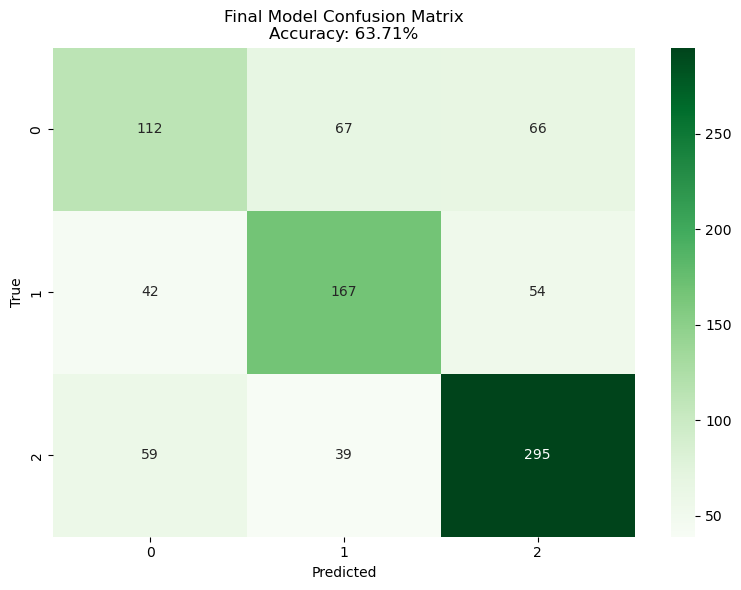

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annto=True, fmt="d", cmap="Greens")
plt.title(f"Final Model Confusion Matrix\nAccuracy: {acc*100:.2f}%")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()